In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

2022-10-19 11:24:12.996002: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 11:24:13.314771: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv("data/1-min_2020-06-09_2022-09-02.csv")

In [4]:
df.describe().T

count         mean          std     min     25%  \
kessel                1168600.0    30.606007    13.771841    15.7    22.8   
ruecklauf             1168600.0    26.294181    12.141199    12.4    19.8   
abgas                 1168600.0    25.255986    39.455655     0.0    10.0   
co2_soll              1168600.0    12.000000     0.000000    12.0    12.0   
co2_ist               1168600.0     5.634163     5.497446     0.0     0.0   
saugzug_ist           1168600.0  8689.199917  1226.684038  1000.0  9000.0   
puffer_oben           1168600.0    50.634010    14.909075    22.4    39.6   
puffer_unten          1168600.0    36.289248     9.563931    15.6    29.1   
platine               1168600.0    25.243898     4.810775    17.5    22.1   
betriebsphase_kessel  1168600.0     0.139158     0.575015     0.0     0.0   
aussen                1168600.0    13.765366     8.595091    -5.4     6.4   
vorlauf_hk1_ist       1168600.0    28.587803     6.214198    16.3    24.2   
vorlauf_hk1_soll      1168600.0    34.518930     7.008388    10.0    32.3   
betriebsphase_hk1     1168600.0     0.558369     1.235416     0.0     0.0   
vorlauf_hk2_ist       1168600.0    26.980220     6.093502    15.1    23.0   
vorlauf_hk2_soll      1168600.0    31.936057     5.925857    10.0    28.1   
betriebsphase_hk2     1168600.0     0.653625     1.105321     0.0     0.0   
boiler_1              1168600.0    45.441944     8.409723    16.8    39.7   
di_0                  1168600.0     0.000000     0.000000     0.0     0.0   
di_1                  1168600.0     1.000000     0.000000     1.0     1.0   
di_2                  1168600.0     0.999217     0.027971     0.0     1.0   
di_3                  1168600.0     1.000000     0.000000     1.0     1.0   
a_w_0                 1168600.0     0.015477     0.123442     0.0     0.0   
a_w_1                 1168600.0     0.052548     0.223130     0.0     0.0   
a_w_2                 1168600.0     0.044776     0.206811     0.0     0.0   
a_w_3                 1168600.0     1.000000     0.000000     1.0     1.0   
a_ea_0                1168600.0     0.976326     0.152033     0.0     1.0   
a_ea_1                1168600.0     0.990855     0.095192     0.0     1.0   
a_ea_2                1168600.0     0.954991     0.207323     0.0     1.0   
a_ea_3                1168600.0     0.062103     0.241343     0.0     0.0   
a_ea_4                1168600.0     0.000000     0.000000     0.0     0.0   
a_phase_0             1168600.0     0.062715     0.242450     0.0     0.0   
a_phase_1             1168600.0     0.072635     0.259536     0.0     0.0   
a_phase_2             1168600.0     0.085590     0.279758     0.0     0.0   
a_phase_3             1168600.0     0.000000     0.000000     0.0     0.0   
a_phase_4             1168600.0     0.000015     0.003814     0.0     0.0   

                         50%     75%     max  
kessel                  25.4    31.5    89.5  
ruecklauf               22.1    25.8    85.7  
abgas                   13.0    20.0   245.0  
co2_soll                12.0    12.0    12.0  
co2_ist                  6.0     9.3    17.5  
saugzug_ist           9000.0  9000.0  9000.0  
puffer_oben             49.5    62.4    89.3  
puffer_unten            34.8    42.3    86.3  
platine                 24.6    26.8    59.0  
betriebsphase_kessel     0.0     0.0     8.0  
aussen                  13.6    20.6    35.8  
vorlauf_hk1_ist         27.2    31.9    60.0  
vorlauf_hk1_soll        34.9    40.0    40.0  
betriebsphase_hk1        0.0     1.0     7.0  
vorlauf_hk2_ist         24.9    30.0    60.7  
vorlauf_hk2_soll        31.3    36.4    43.6  
betriebsphase_hk2        0.0     1.0     7.0  
boiler_1                47.0    52.1    58.6  
di_0                     0.0     0.0     0.0  
di_1                     1.0     1.0     1.0  
di_2                     1.0     1.0     1.0  
di_3                     1.0     1.0     1.0  
a_w_0                    0.0     0.0     1.0  
a_w_1                    0.0     0.0     1.0  
a

In [53]:
# high_res = pd.read_csv("data/6-sec_2022-09-02_2022-09-23.csv")
high_res = pd.read_csv("data/2022-10-14T03_00_01+0200.csv")

In [54]:
high_res.describe().T

count         mean          std     min     25%  \
kessel                1829729.0    30.340532    13.143871    15.7    22.8   
ruecklauf             1829729.0    26.416108    11.547040    12.4    20.6   
abgas                 1829729.0    24.122992    36.702704     0.0    10.0   
co2_soll              1829729.0    12.000000     0.000000    12.0    12.0   
co2_ist               1829729.0     5.612915     5.511620     0.0     0.0   
saugzug_ist           1829729.0  8730.290978  1151.828450  1000.0  9000.0   
puffer_oben           1829729.0    51.277082    14.051926    22.4    41.0   
puffer_unten          1829729.0    36.917228     9.349917    15.6    29.7   
platine               1829729.0    25.630990     4.513241    17.5    23.2   
betriebsphase_kessel  1829729.0     0.120346     0.539434     0.0     0.0   
aussen                1829729.0    14.595031     7.474740    -5.4     9.4   
vorlauf_hk1_ist       1829729.0    28.419188     5.932955    16.3    24.0   
vorlauf_hk1_soll      1829729.0    34.850101     5.940001    10.0    32.3   
betriebsphase_hk1     1829729.0     0.433427     1.043867     0.0     0.0   
vorlauf_hk2_ist       1829729.0    26.651012     5.534280    15.1    23.0   
vorlauf_hk2_soll      1829729.0    31.571043     5.025717    10.0    28.1   
betriebsphase_hk2     1829729.0     0.589064     0.947622     0.0     0.0   
boiler_1              1829729.0    45.533288     8.267750    16.8    39.9   

                         50%     75%     max  
kessel                  25.2    31.3    89.5  
ruecklauf               22.2    25.8    85.7  
abgas                   13.0    20.0   245.0  
co2_soll                12.0    12.0    12.0  
co2_ist                  5.9     9.2    17.5  
saugzug_ist           9000.0  9000.0  9000.0  
puffer_oben             51.1    62.4    89.3  
puffer_unten            35.7    43.1    86.3  
platine                 25.1    26.8    59.0  
betriebsphase_kessel     0.0     0.0     8.0  
aussen                  15.0    19.6    37.3  
vorlauf_hk1_ist         27.2    31.8    60.0  
vorlauf_hk1_soll        35.3    39.8    40.0  
betriebsphase_hk1        0.0     1.0     7.0  
vorlauf_hk2_ist         24.9    29.0    60.7  
vorlauf_hk2_soll        31.0    34.7    43.6  
betriebsphase_hk2        0.0     1.0     7.0  
boiler_1                47.1    52.0    58.6

In [55]:
# Correct data types
def print_df_dtypes(df):
    print("data types:")
    for column, dtype in zip(df.columns, df.dtypes):
        print("\t", column, ":", dtype)

def update_type(df, col, type):
    df[col] = df[col].astype(type)

In [56]:
def correct_types(df, bool_as_string):
    print("Original", end =" ")
    print_df_dtypes(df)

    update_type(df, 'betriebsphase_kessel', pd.CategoricalDtype())
    update_type(df, 'betriebsphase_hk1', pd.CategoricalDtype())
    update_type(df, 'betriebsphase_hk2', pd.CategoricalDtype())
    update_type(df, 'abgas', 'float64')
    update_type(df, 'co2_soll', 'float64')
    update_type(df, 'saugzug_ist', 'float64')
    
    bool_cols = ["di_0", "di_1", "di_2", "di_3", "a_w_0","a_w_1", "a_w_2","a_w_3","a_ea_0","a_ea_1", "a_ea_2","a_ea_3","a_ea_4","a_phase_0","a_phase_1","a_phase_2","a_phase_3","a_phase_4"]
    if bool_as_string:
        for c in bool_cols:
            df[c] = df[c] == 't'
    else:
        for c in bool_cols:
            update_type(df, c, 'bool')

    print()
    print("Updated", end =" ")
    print_df_dtypes(df)

In [57]:
correct_types(df, bool_as_string=False)

Original data types:
	 kessel : float64
	 ruecklauf : float64
	 abgas : float64
	 co2_soll : float64
	 co2_ist : float64
	 saugzug_ist : float64
	 puffer_oben : float64
	 puffer_unten : float64
	 platine : float64
	 betriebsphase_kessel : category
	 aussen : float64
	 vorlauf_hk1_ist : float64
	 vorlauf_hk1_soll : float64
	 betriebsphase_hk1 : category
	 vorlauf_hk2_ist : float64
	 vorlauf_hk2_soll : float64
	 betriebsphase_hk2 : category
	 boiler_1 : float64
	 di_0 : bool
	 di_1 : bool
	 di_2 : bool
	 di_3 : bool
	 a_w_0 : bool
	 a_w_1 : bool
	 a_w_2 : bool
	 a_w_3 : bool
	 a_ea_0 : bool
	 a_ea_1 : bool
	 a_ea_2 : bool
	 a_ea_3 : bool
	 a_ea_4 : bool
	 a_phase_0 : bool
	 a_phase_1 : bool
	 a_phase_2 : bool
	 a_phase_3 : bool
	 a_phase_4 : bool

Updated data types:
	 kessel : float64
	 ruecklauf : float64
	 abgas : float64
	 co2_soll : float64
	 co2_ist : float64
	 saugzug_ist : float64
	 puffer_oben : float64
	 puffer_unten : float64
	 platine : float64
	 betriebsphase_kessel : catego

In [58]:
correct_types(high_res, bool_as_string=True)

Original data types:
	 sps_zeit : object
	 received_time : object
	 kessel : float64
	 ruecklauf : float64
	 abgas : int64
	 co2_soll : int64
	 co2_ist : float64
	 saugzug_ist : int64
	 puffer_oben : float64
	 puffer_unten : float64
	 platine : float64
	 betriebsphase_kessel : int64
	 aussen : float64
	 vorlauf_hk1_ist : float64
	 vorlauf_hk1_soll : float64
	 betriebsphase_hk1 : int64
	 vorlauf_hk2_ist : float64
	 vorlauf_hk2_soll : float64
	 betriebsphase_hk2 : int64
	 boiler_1 : float64
	 di_0 : object
	 di_1 : object
	 di_2 : object
	 di_3 : object
	 a_w_0 : object
	 a_w_1 : object
	 a_w_2 : object
	 a_w_3 : object
	 a_ea_0 : object
	 a_ea_1 : object
	 a_ea_2 : object
	 a_ea_3 : object
	 a_ea_4 : object
	 a_phase_0 : object
	 a_phase_1 : object
	 a_phase_2 : object
	 a_phase_3 : object
	 a_phase_4 : object

Updated data types:
	 sps_zeit : object
	 received_time : object
	 kessel : float64
	 ruecklauf : float64
	 abgas : float64
	 co2_soll : float64
	 co2_ist : float64
	 saugzug_ist

In [59]:
df.drop(["sps_zeit"], axis=1, inplace=True)
#df.drop(["sps_zeit", "betriebsphase_kessel", "betriebsphase_hk1", "betriebsphase_hk2", "di_0", "di_1", "di_2", "di_3", "a_w_0","a_w_1", "a_w_2","a_w_3","a_ea_0","a_ea_1", "a_ea_2","a_ea_3","a_ea_4","a_phase_0","a_phase_1","a_phase_2","a_phase_3","a_phase_4"], axis=1, inplace=True)
#df

KeyError: "['sps_zeit'] not found in axis"

In [61]:
high_res.drop(["sps_zeit"], axis=1, inplace=True)

In [ ]:
df.describe(include='all').T

In [ ]:
high_res.describe(include='all').T

In [ ]:
timestamps = pd.to_datetime(df.pop("received_time"))
df.index = timestamps
timestamps

In [62]:
timestamps_high_res = pd.to_datetime(high_res.pop("received_time"))
high_res.index = timestamps_high_res
timestamps_high_res

0                2019-05-12 16:54:41+00:00
1                2019-05-12 16:55:46+00:00
2                2019-05-12 16:56:45+00:00
3                2019-05-12 16:57:44+00:00
4                2019-05-12 16:58:43+00:00
                        ...               
1829724   2022-10-14 00:59:35.342542+00:00
1829725   2022-10-14 00:59:41.193660+00:00
1829726   2022-10-14 00:59:47.098606+00:00
1829727   2022-10-14 00:59:52.998964+00:00
1829728   2022-10-14 00:59:58.944163+00:00
Name: received_time, Length: 1829729, dtype: datetime64[ns, UTC]

In [ ]:
df

2 Week timespan with 2 times heating up in summer: `2021-08-19T15:00:00` - `2021-09-02T15:00:00` \
2 Week timespan with 7 times heating up in winter: `2022-01-02T15:00:00` - `2022-01-16T15:00:00` \
12 hour timespan with 1 time heating up in winter: `2022-01-02T18:00:00` - `2022-01-03T06:00:00`

In [18]:
#two_summer_weeks = (df.index >= '2021-08-19T15:00:00') & (df.index < '2021-09-02T15:00:00')
#two_winter_weeks = (df.index >= '2022-01-02T15:00:00') & (df.index < '2022-01-16T15:00:00')
#twelve_winter_hours = (df.index >= '2022-01-02T18:00:00') & (df.index < '2022-01-03T06:00:00')

two_summer_weeks = lambda table: (table.index >= '2021-08-19T15:00:00') & (table.index < '2021-09-02T15:00:00')
two_winter_weeks = lambda table: (table.index >= '2022-01-02T15:00:00') & (table.index < '2022-01-16T15:00:00')
twelve_winter_hours = lambda table: (table.index >= '2022-01-02T18:00:00') & (table.index < '2022-01-03T06:00:00')

In [19]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (16, 20)
mpl.rcParams['axes.grid'] = False

### Trying to figure out what the phases mean

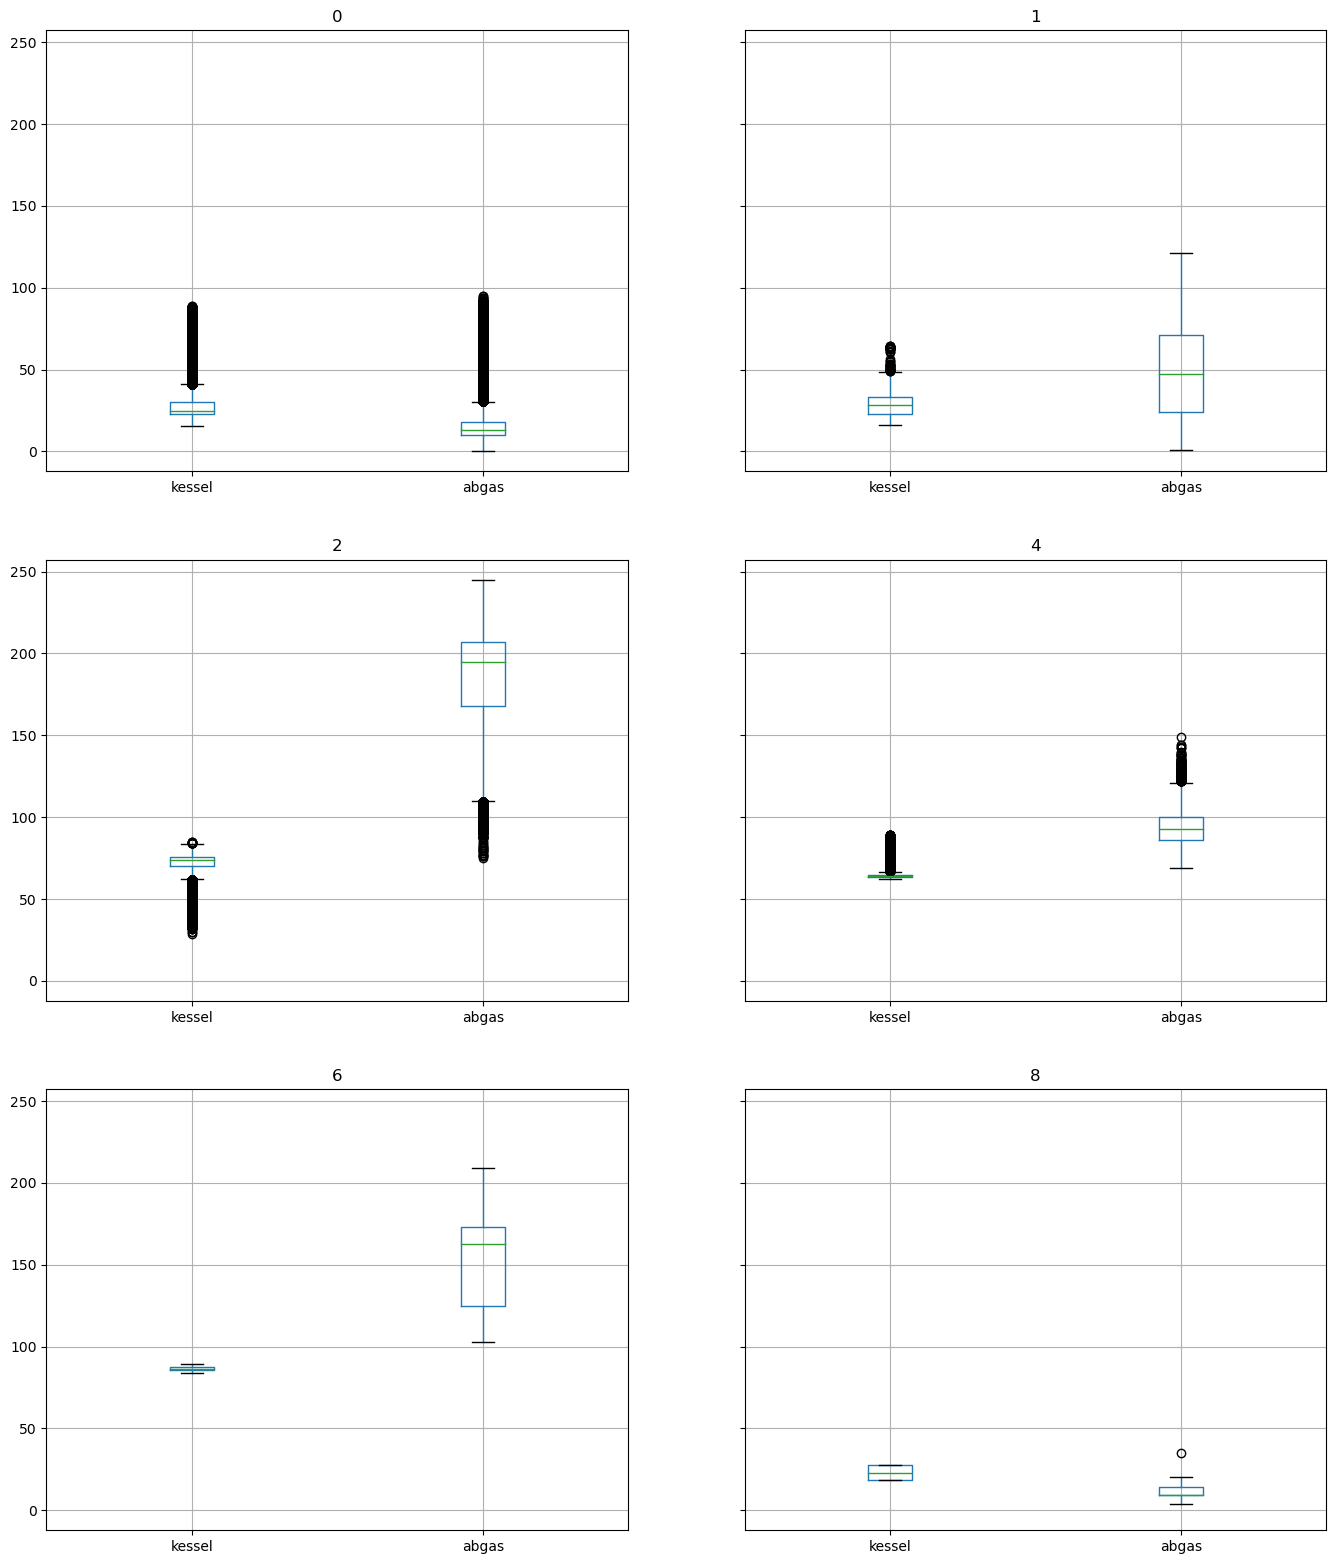

In [20]:
_ = df[['kessel', 'abgas', 'betriebsphase_kessel']].groupby(df.betriebsphase_kessel).boxplot()

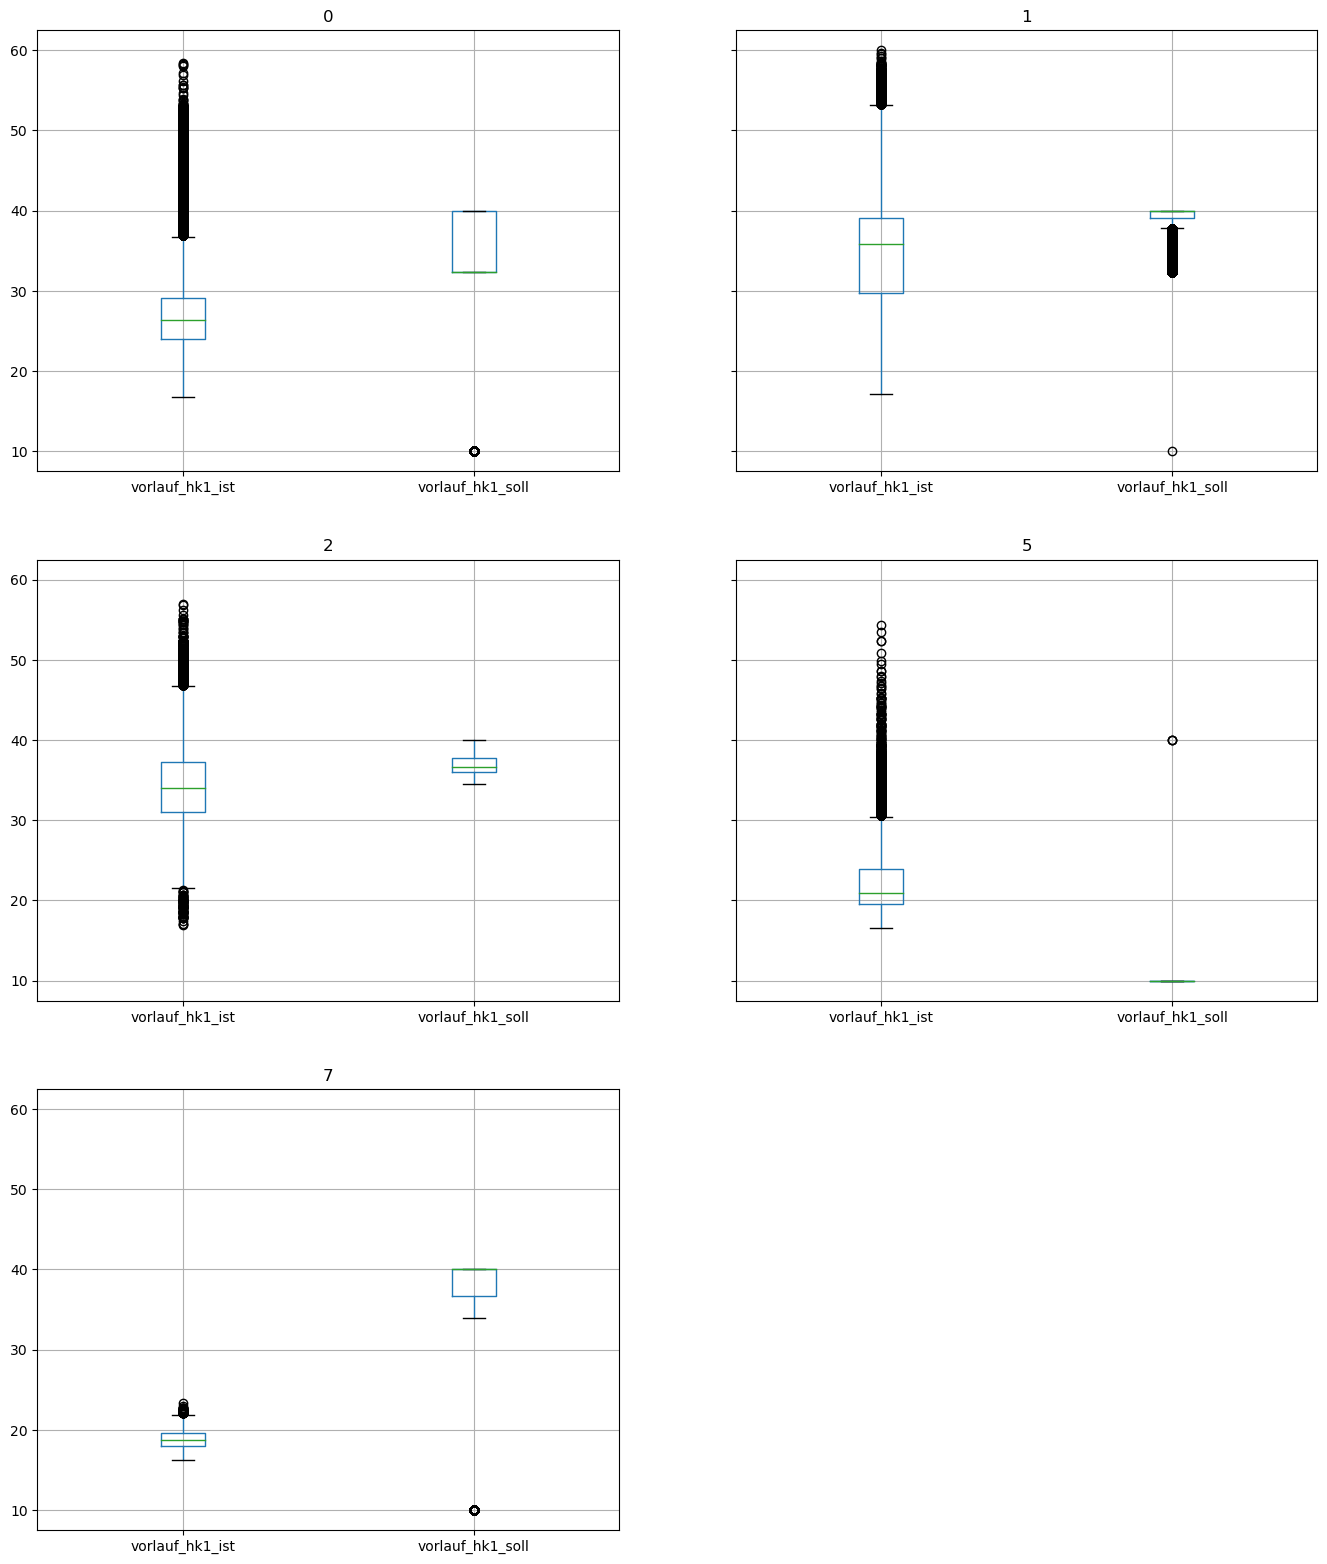

In [21]:
_ = df[['vorlauf_hk1_ist', 'vorlauf_hk1_soll', 'betriebsphase_hk1']].groupby(df['betriebsphase_hk1']).boxplot()

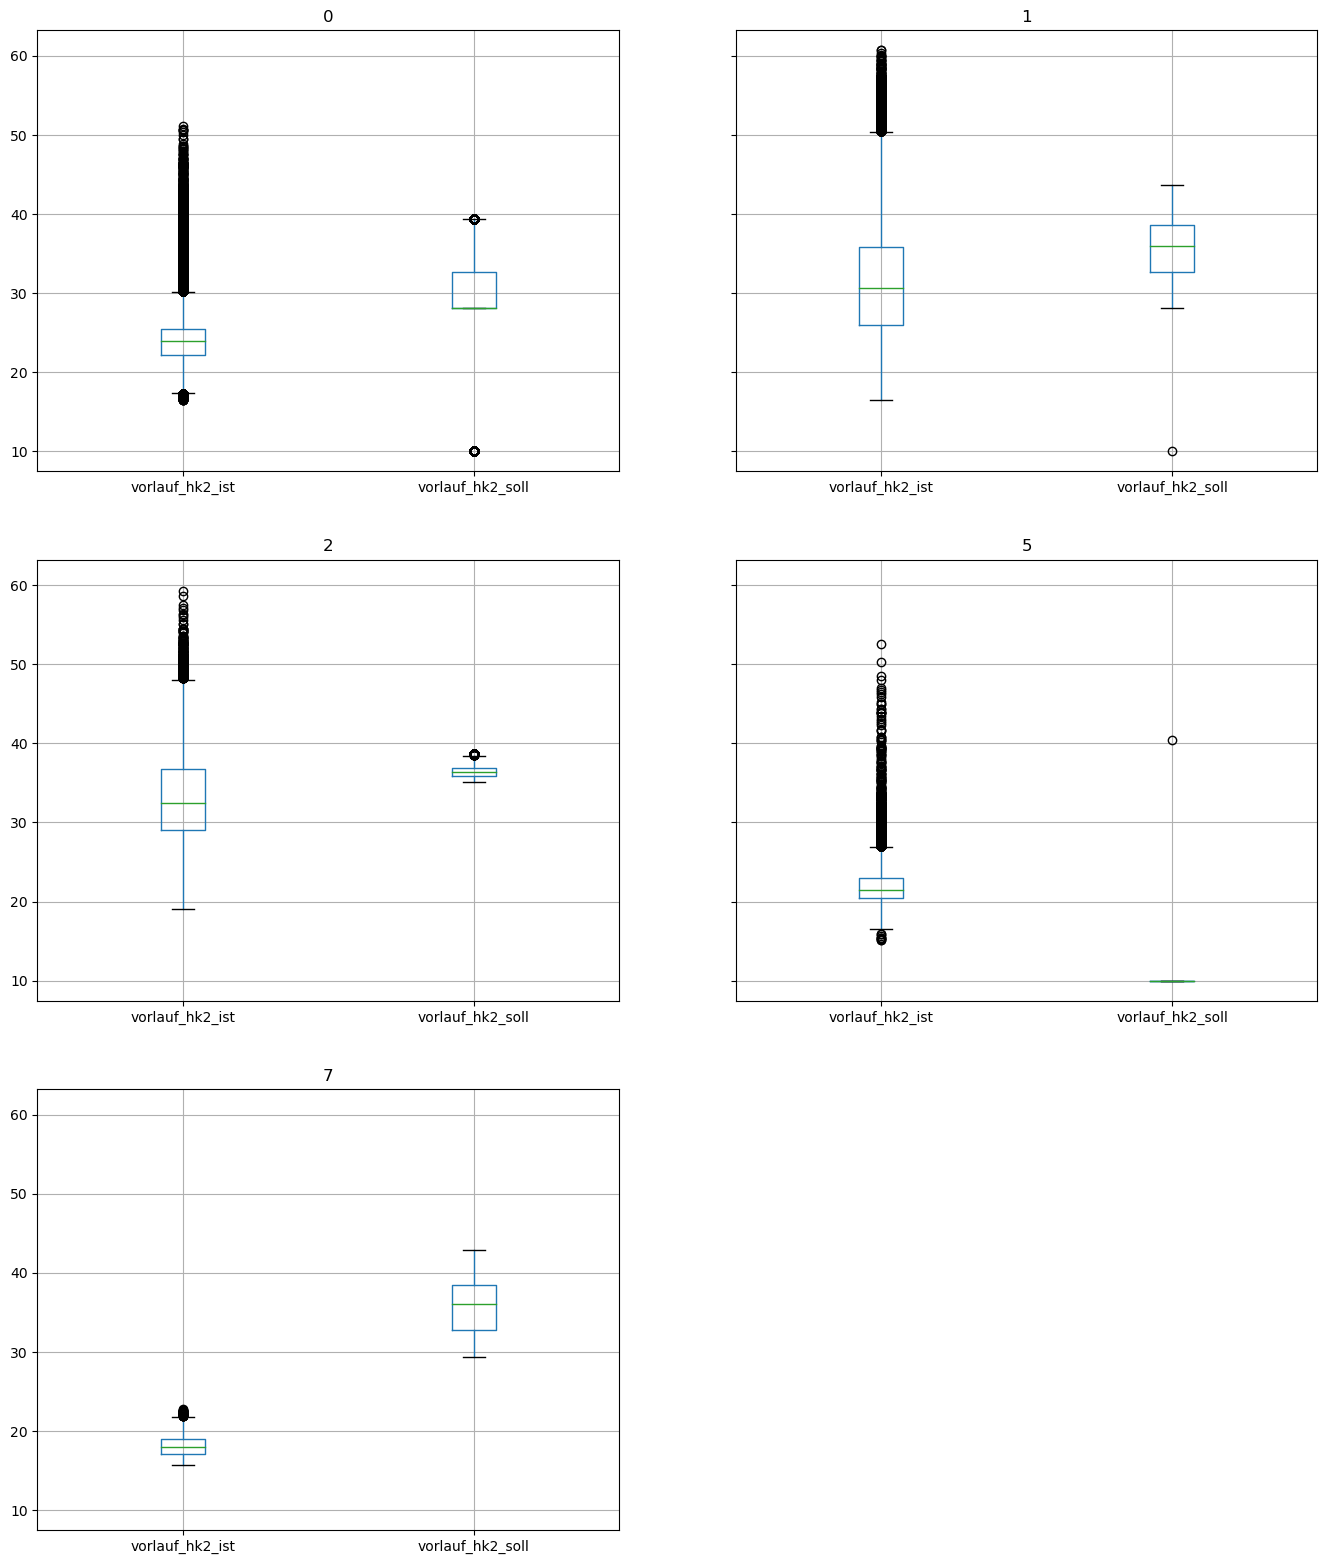

In [22]:
_ = df[['vorlauf_hk2_ist', 'vorlauf_hk2_soll', 'betriebsphase_hk2']].groupby(df['betriebsphase_hk2']).boxplot()

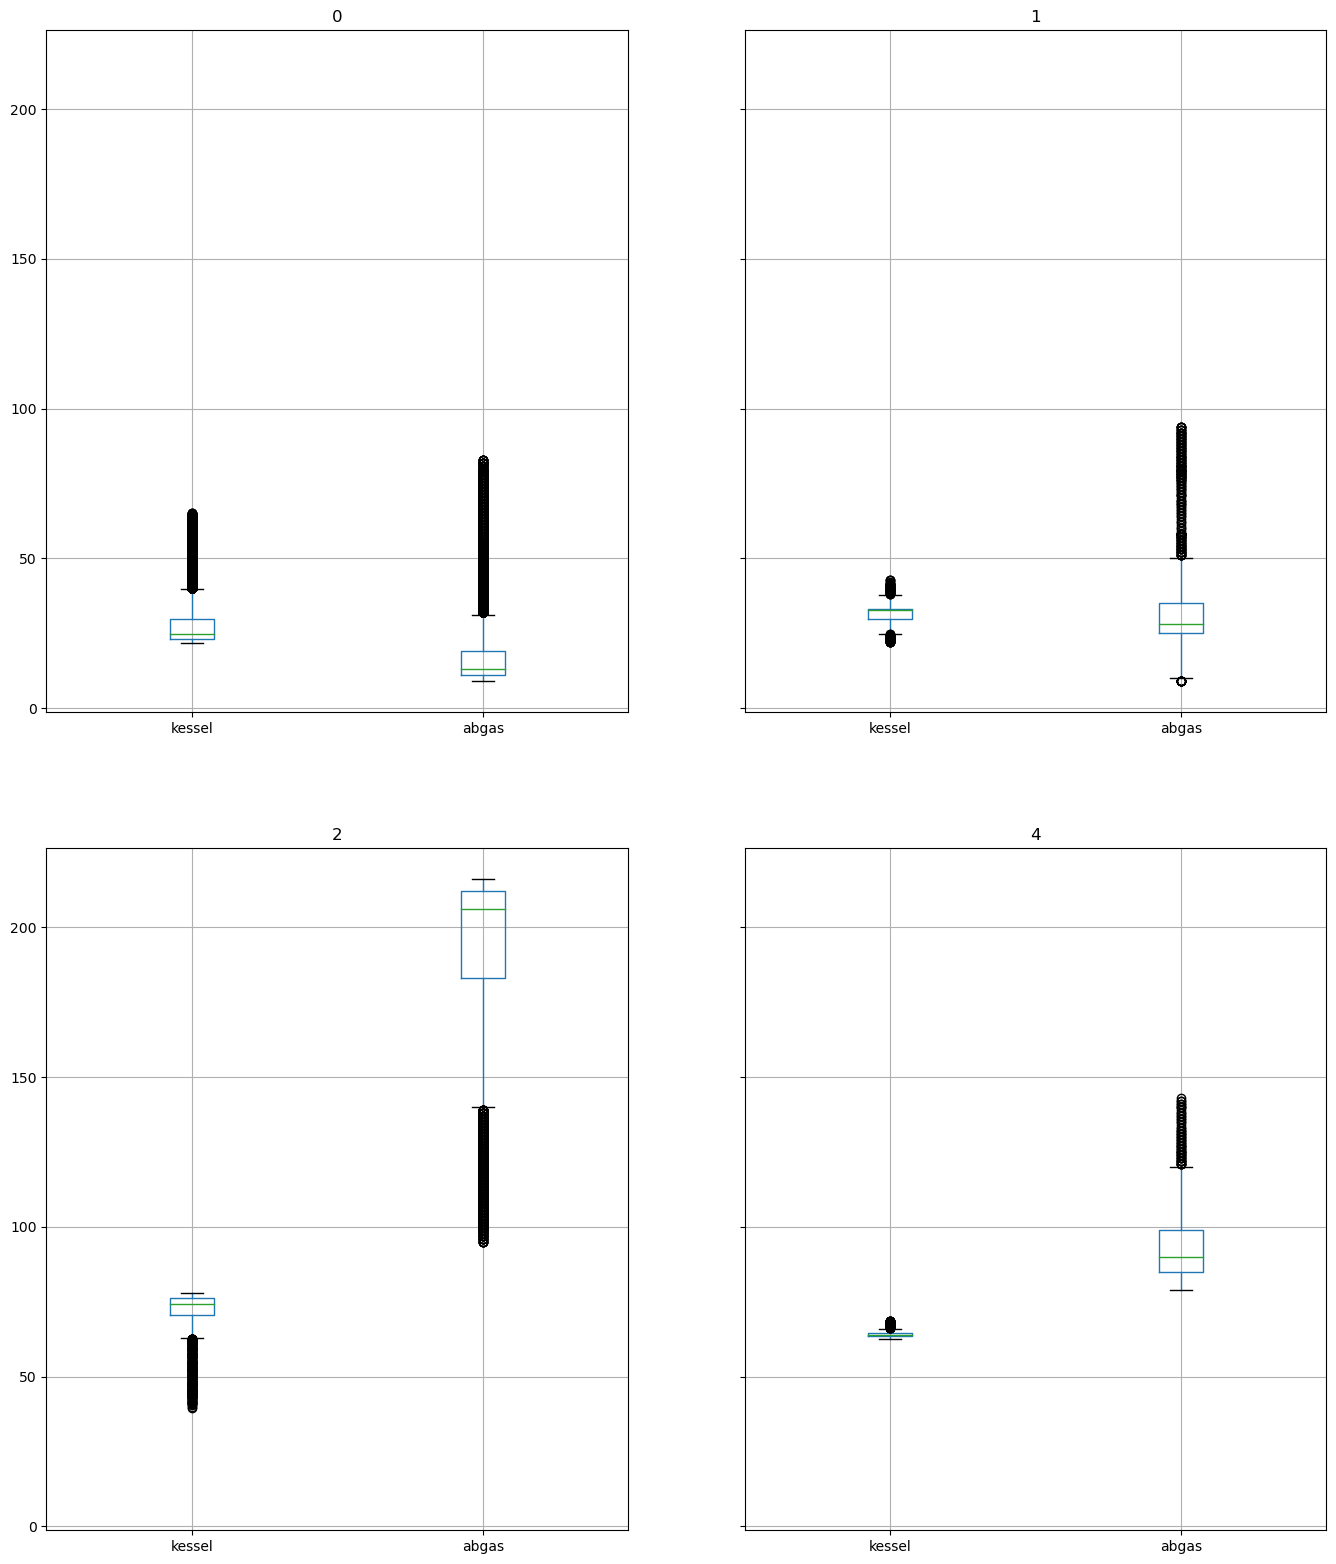

In [23]:
_ = high_res[['kessel', 'abgas', 'betriebsphase_kessel']].groupby(high_res.betriebsphase_kessel).boxplot()

In [24]:
def plot_phase_analysis(df, start, end, subplots=False):
    df[(df.index > start) & (df.index < end)].plot(kind='area', stacked=False, subplots=subplots, include_bool=True, y=["kessel", "abgas", "a_phase_0", "a_w_1", "betriebsphase_kessel", "di_2"], secondary_y=["a_phase_0", "a_w_1", "betriebsphase_kessel", "di_2"])

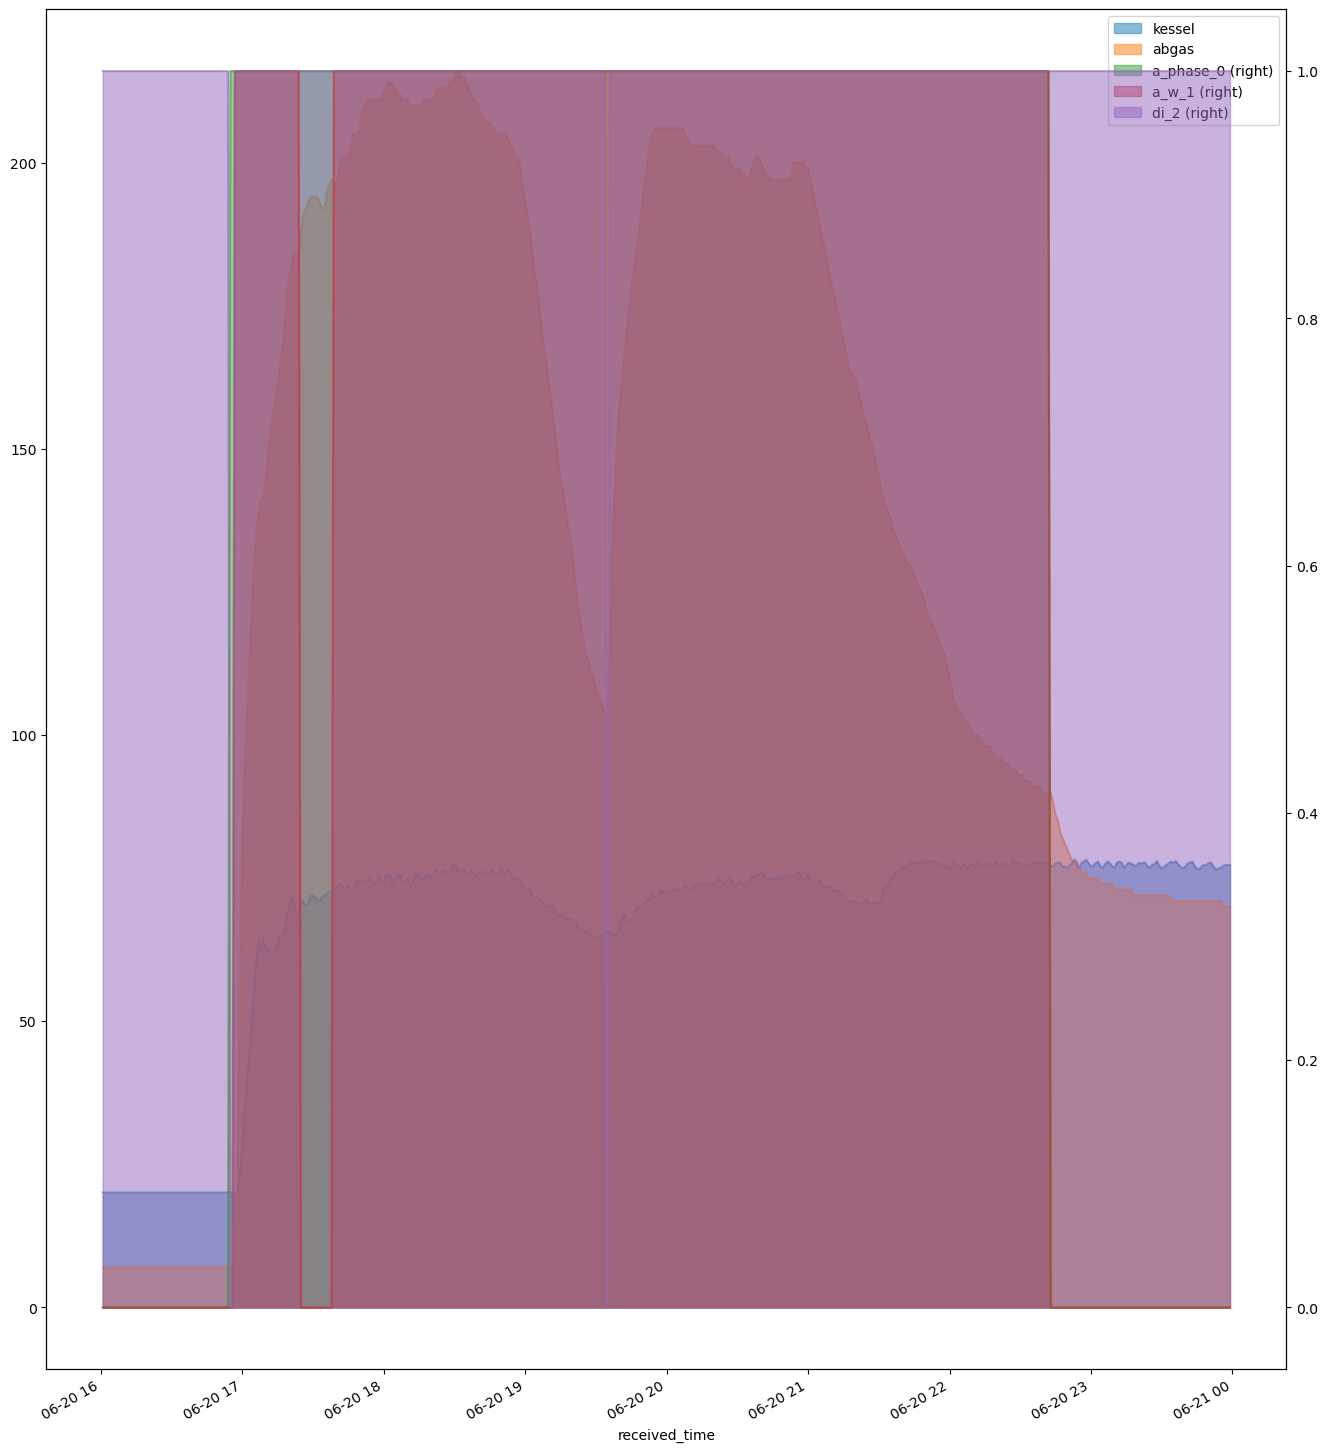

In [25]:
plot_phase_analysis(df, '2020-06-20T16:00:00', '2020-06-20T23:59:00')

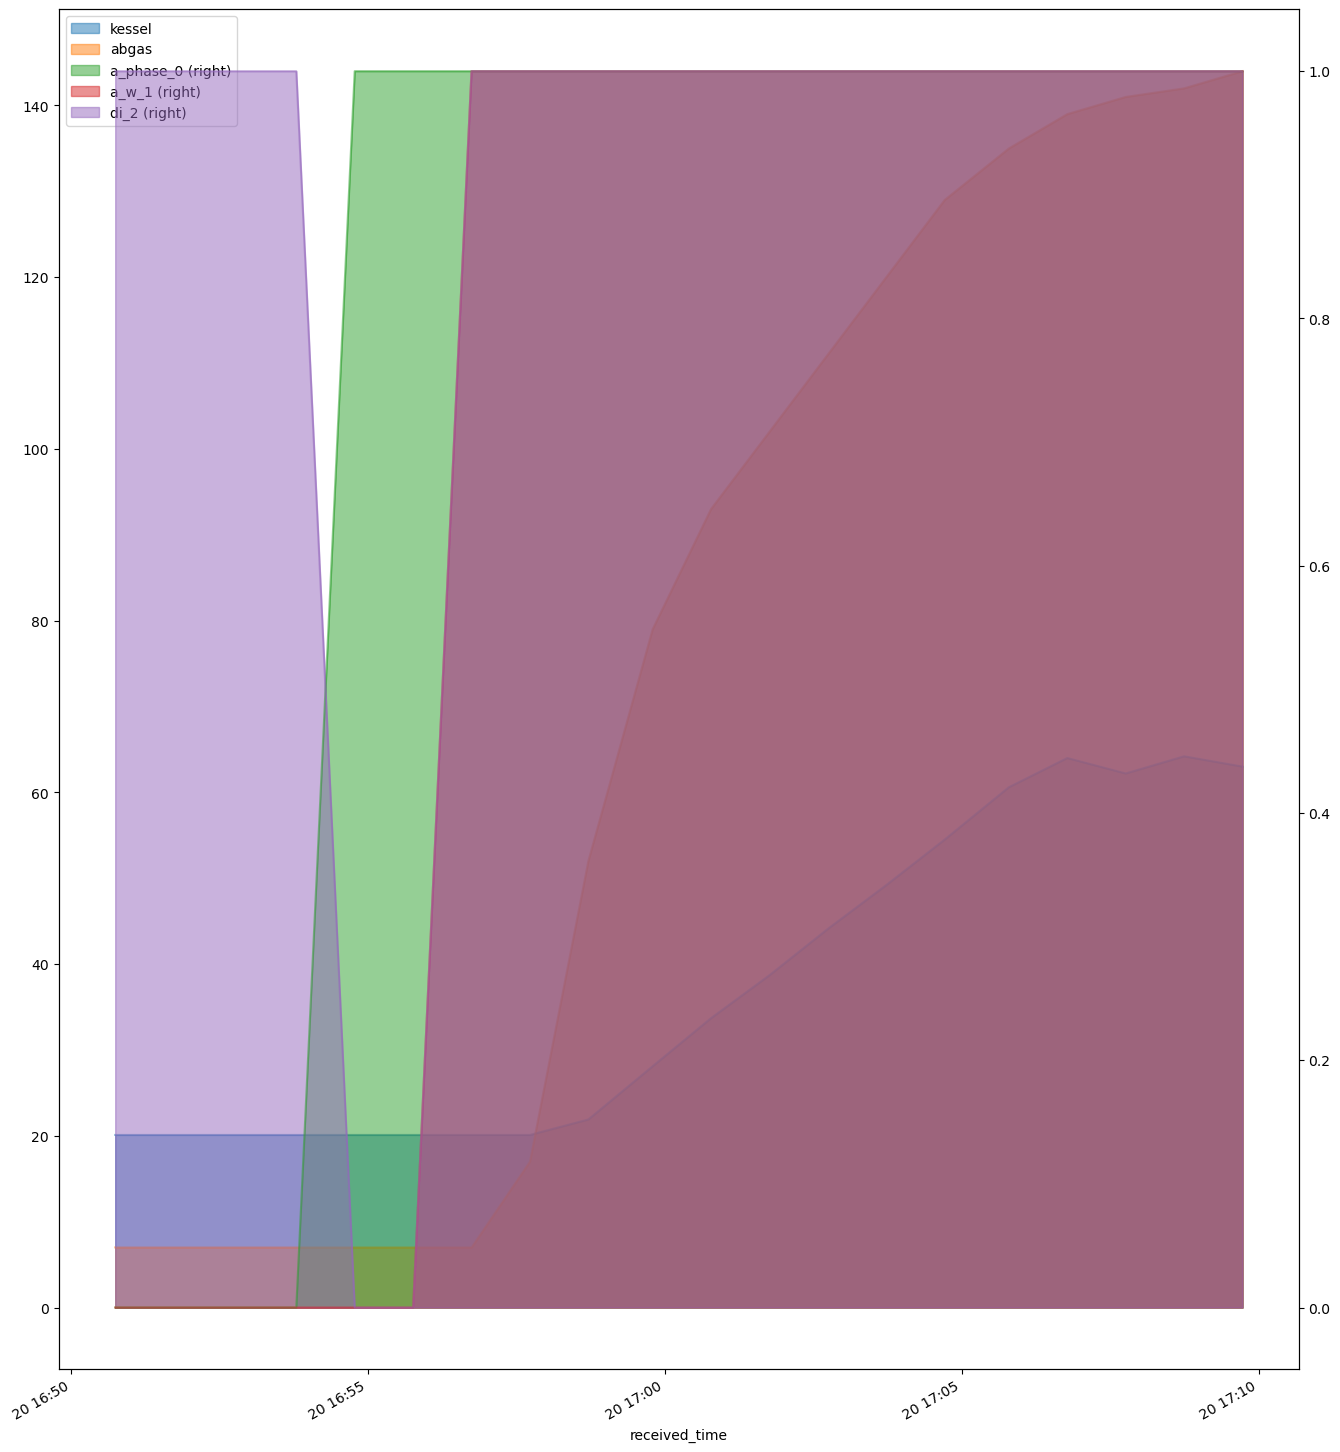

In [26]:
plot_phase_analysis(df, '2020-06-20T16:50:00', '2020-06-20T17:10:00')

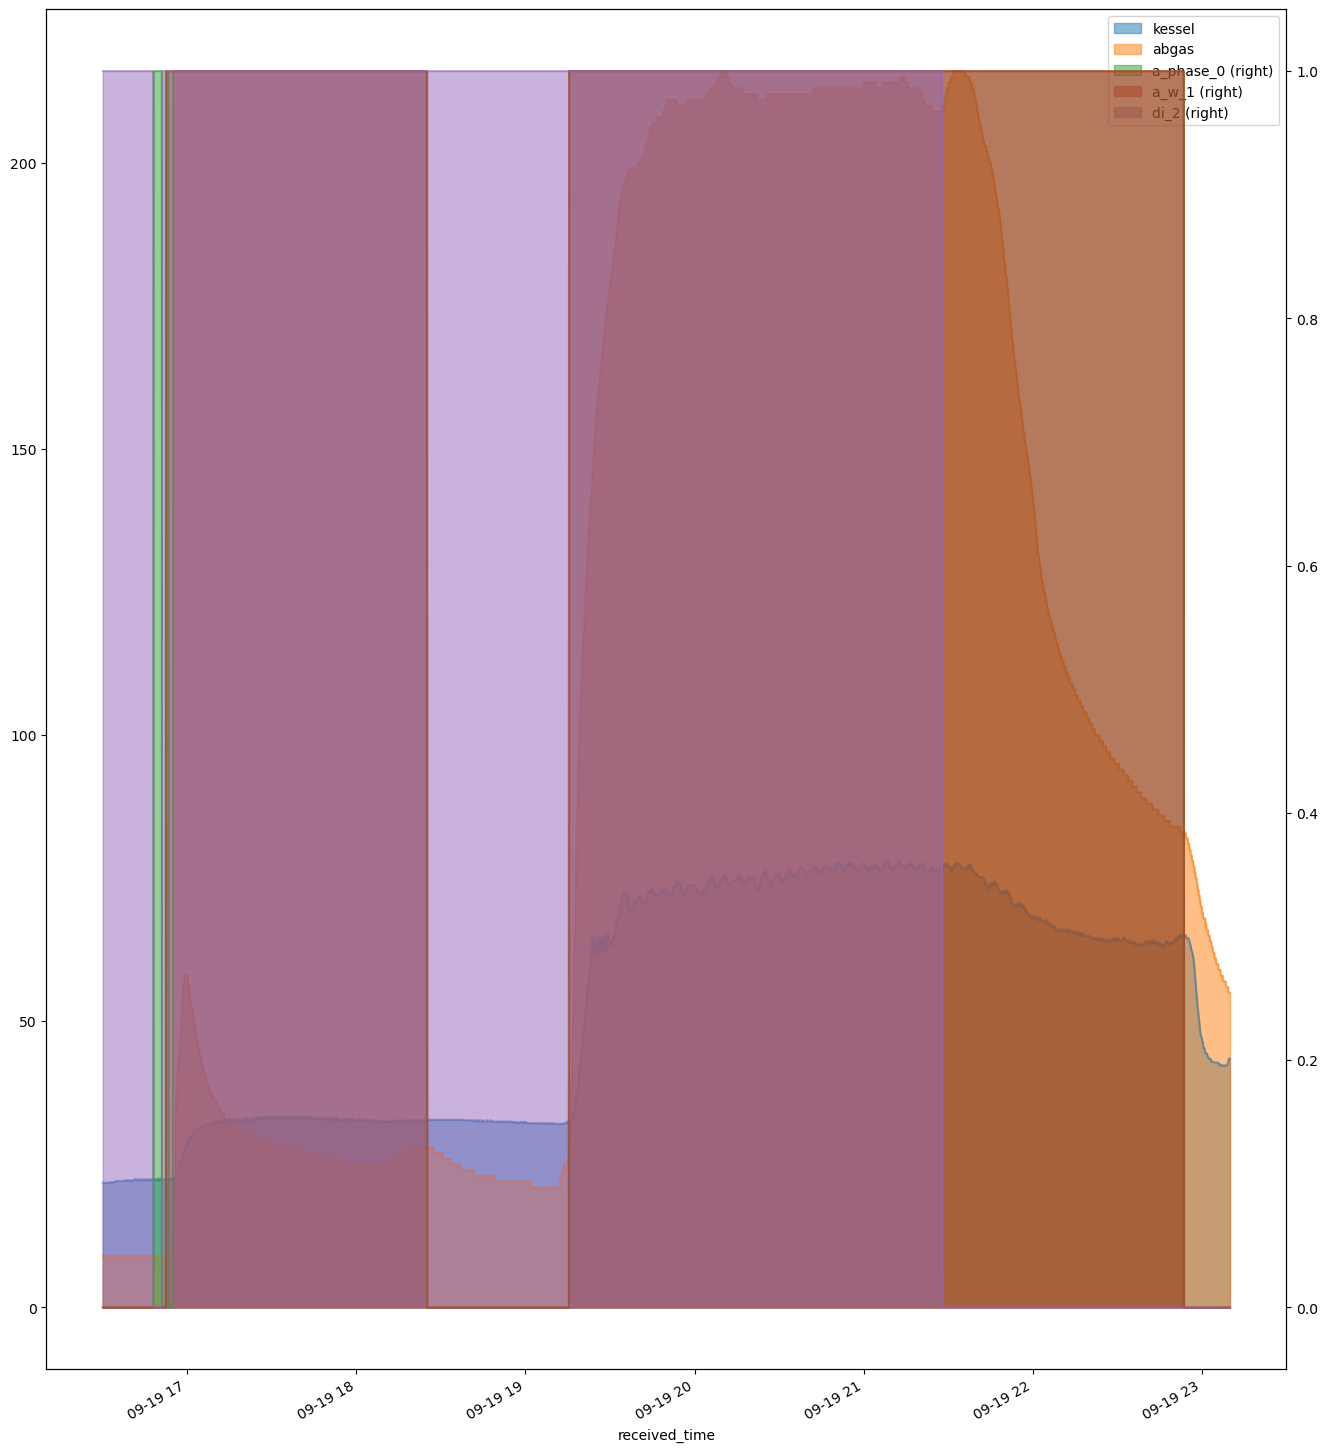

In [27]:
plot_phase_analysis(high_res, '2022-09-19T16:30:00', '2022-09-19T23:10:00')

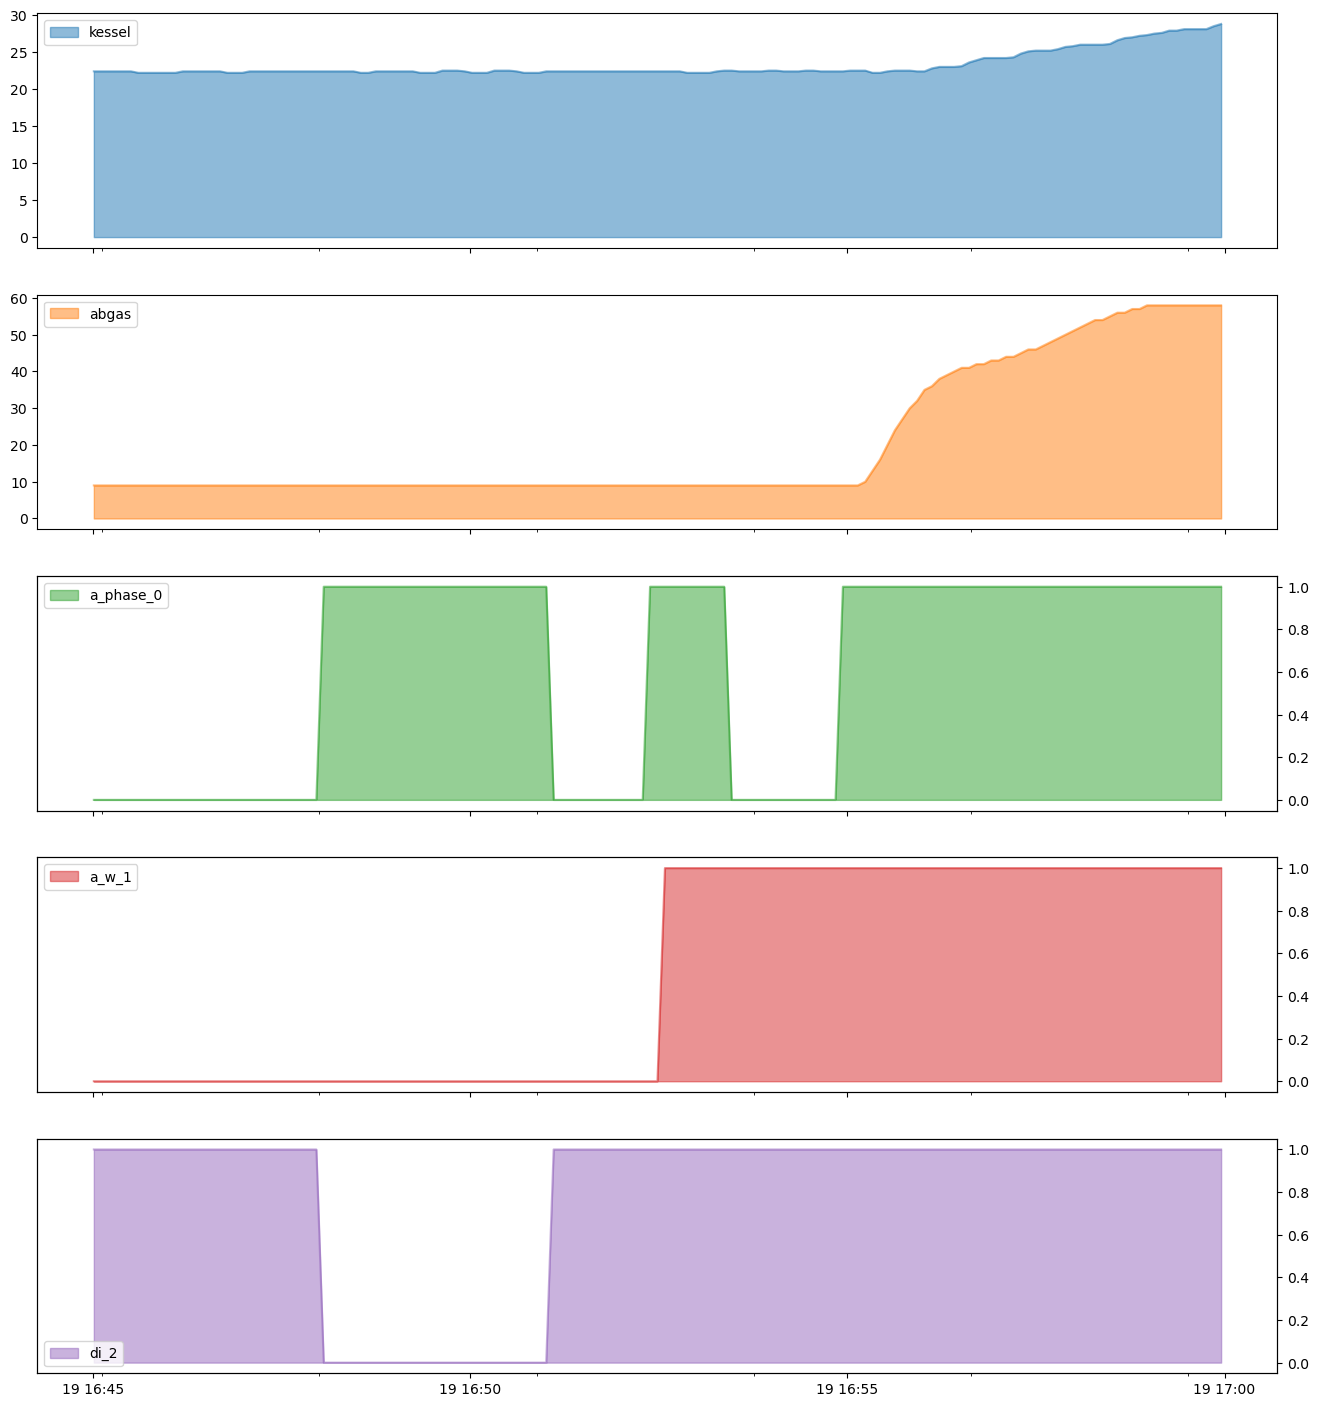

In [28]:
plot_phase_analysis(high_res, '2022-09-19T16:45:00', '2022-09-19T17:00:00', subplots=True)

Possible values:

- Aus: 0
- Anheizen: probably 1, maybe switched with Anheizen erkannt but probably not. The reason I think it's Anheizen and not Anheizen erkannt is because the manual says (P.13) that the default behaviour is to start phase "Anheizen erkannt" as soon as the Door opens but that would be as soon as the brown line goes low (or the green goes up, because that's coupled as well) and in the chart it's clearly visible that the phase only goes to 1 when the door is closed (brown goes high again). This would match with the fact that we don't use the automatic starting system and instead manually tell the system we started the fire. Another inidicator is that the default behaviour is to transition from Anheizen erkannt to Anheizen and only then to Automatik but we can clearly see that it goes from 0 to 1 to 2 which would match Aus -> Anheizen -> Automatik, and is one less than with the automatic system/default behaviour.
- Ausbrennen: maybe 4
- Automatik: probably 2

Ones that probably aren't in this snippet

- Anheizen erkannt (probably 8, see below)
- Abregeln (probably 6, see below)
- Gluterhaltung (maybe 3, 5 or 7 because we never use that and those aren't anywhere in the data)
- übertemperatur
- ~Tür geöffnet~ Confirmed that this never happens and is probably a bug in the logger. On the display it does show this phase but in the data it does not change so we can fully replace this with DI_2

In [29]:
potentially_abregeln = df[df.betriebsphase_kessel == 6]

In [30]:
potentially_abregeln

kessel  ruecklauf  abgas  co2_soll  co2_ist  \
received_time                                                             
2020-07-20 22:36:30.093869    85.3       74.0  196.0      12.0      7.2   
2020-07-20 22:37:35.041132    85.9       74.7  191.0      12.0      7.0   
2020-07-20 22:38:34.040640    85.9       74.7  186.0      12.0      6.8   
2020-07-20 22:39:33.039471    86.2       75.2  182.0      12.0      8.1   
2020-07-20 22:40:32.041745    86.8       75.5  180.0      12.0      8.7   
...                            ...        ...    ...       ...      ...   
2022-08-03 18:56:35.630462    88.6       84.8  104.0      12.0      0.9   
2022-08-03 18:57:34.629363    88.3       84.4  104.0      12.0      1.2   
2022-08-03 18:58:33.628310    89.3       83.9  104.0      12.0      0.9   
2022-08-03 18:59:32.627419    88.6       84.8  104.0      12.0      1.4   
2022-08-03 19:00:31.626508    88.4       83.9  103.0      12.0      0.7   

                            saugzug_ist  puffer_oben  puffer_unten  platine  \
received_time                                                                 
2020-07-20 22:36:30.093869       4719.0         81.4          77.4     50.9   
2020-07-20 22:37:35.041132       4911.0         82.3          77.9     50.9   
2020-07-20 22:38:34.040640       4981.0         83.2          78.0     50.9   
2020-07-20 22:39:33.039471       5062.0         83.9          78.3     50.9   
2020-07-20 22:40:32.041745       5106.0         84.8          78.3     50.9   
...                                 ...          ...           ...      ...   
2022-08-03 18:56:35.630462       4653.0         88.7          86.3     48.5   
2022-08-03 18:57:34.629363       4620.0         88.7          86.3     48.4   
2022-08-03 18:58:33.628310       4586.0         88.7          86.3     48.3   
2022-08-03 18:59:32.627419       4586.0         88.7          86.3     48.2   
2022-08-03 19:00:31.626508       4520.0         88.7          86.3     48.1   

                           betriebsphase_kessel  ...  a_ea_0  a_ea_1  a_ea_2  \
received_time                                    ...                           
2020-07-20 22:36:30.093869                    6  ...    True    True    True   
2020-07-20 22:37:35.041132                    6  ...   False   False    True   
2020-07-20 22:38:34.040640                    6  ...    True   False    True   
2020-07-20 22:39:33.039471                    6  ...    True   False    True   
2020-07-20 22:40:32.041745                    6  ...    True   False    True   
...                                         ...  ...     ...     ...     ...   
2022-08-03 18:56:35.630462                    6  ...    True   False    True   
2022-08-03 18:57:34.629363                    6  ...    True   False    True   
2022-08-03 18:58:33.628310                    6  ...    True   False    True   
2022-08-03 18:59:32.627419                    6  ...    True   False    True   
2022-08-03 19:00:31.626508                    6  ...    True   False    True   

                           a_ea_3  a_ea_4  a_phase_0 a_phase_1  a_phase_2  \
received_time                                                               
2020-07-20 22:36:30.093869   True   False       True      True      False   
2020-07-20 22:37:35.041132   True   False       True      True      False   
2020-07-20 22:38:34.040640   True   False       True      True      False   
2020-07-20 22:39:33.039471   True   False       True      True      False   
2020-07-20 22:40:32.041745   True   False       True      True      False   
...                           ...     ...        ...       ...        ...   
2022-08-03 18:56:35.630462   True   False       True      True      False   
2022-08-03 18:57:34.629363   True   False       True     False      False   
2022-08-03 18:58:33.628310   True   False       True      True      False   
2022-08-03 18:59:32.627419   True   False       True      True      False   
2022-08-03 19:00:31.626508   True   False       True     Fa

In [31]:
potentially_abregeln.groupby(potentially_abregeln.index.date).mean()

kessel  ruecklauf       abgas  co2_soll   co2_ist  saugzug_ist  \
2020-07-20  86.002632  76.121053  159.763158      12.0  5.807895  5014.894737   
2020-09-18  85.450000  75.339286  167.821429      12.0  6.017857  4888.857143   
2022-01-05  85.447368  73.610526  163.947368      12.0  7.205263  4901.789474   
2022-05-22  85.057143  71.485714  186.571429      12.0  9.200000  4780.142857   
2022-08-03  87.378070  78.893860  143.596491      12.0  5.592105  5152.456140   

            puffer_oben  puffer_unten    platine     aussen  ...    a_ea_0  \
2020-07-20    86.763158     78.578947  50.581579  22.450000  ...  0.947368   
2020-09-18    85.964286     77.775000  54.392857  20.539286  ...  1.000000   
2022-01-05    86.431579     76.626316  41.331579   1.900000  ...  1.000000   
2022-05-22    83.400000     74.000000  44.914286  23.314286  ...  1.000000   
2022-08-03    88.215789     81.134211  51.908772  32.607895  ...  0.842105   

              a_ea_1  a_ea_2  a_ea_3  a_ea_4  a_phase_0  a_phase_1  a_phase_2  \
2020-07-20  0.026316     1.0     1.0     0.0        1.0   1.000000        0.0   
2020-09-18  0.035714     1.0     1.0     0.0        1.0   1.000000        0.0   
2022-01-05  0.052632     1.0     1.0     0.0        1.0   1.000000        0.0   
2022-05-22  0.142857     1.0     1.0     0.0        1.0   1.000000        0.0   
2022-08-03  0.017544     1.0     1.0     0.0        1.0   0.789474        0.0   

            a_phase_3  a_phase_4  
2020-07-20        0.0        0.0  
2020-09-18        0.0        0.0  
2022-01-05        0.0        0.0  
2022-05-22        0.0        0.0  
2022-08-03        0.0        0.0  

[5 rows x 33 columns]

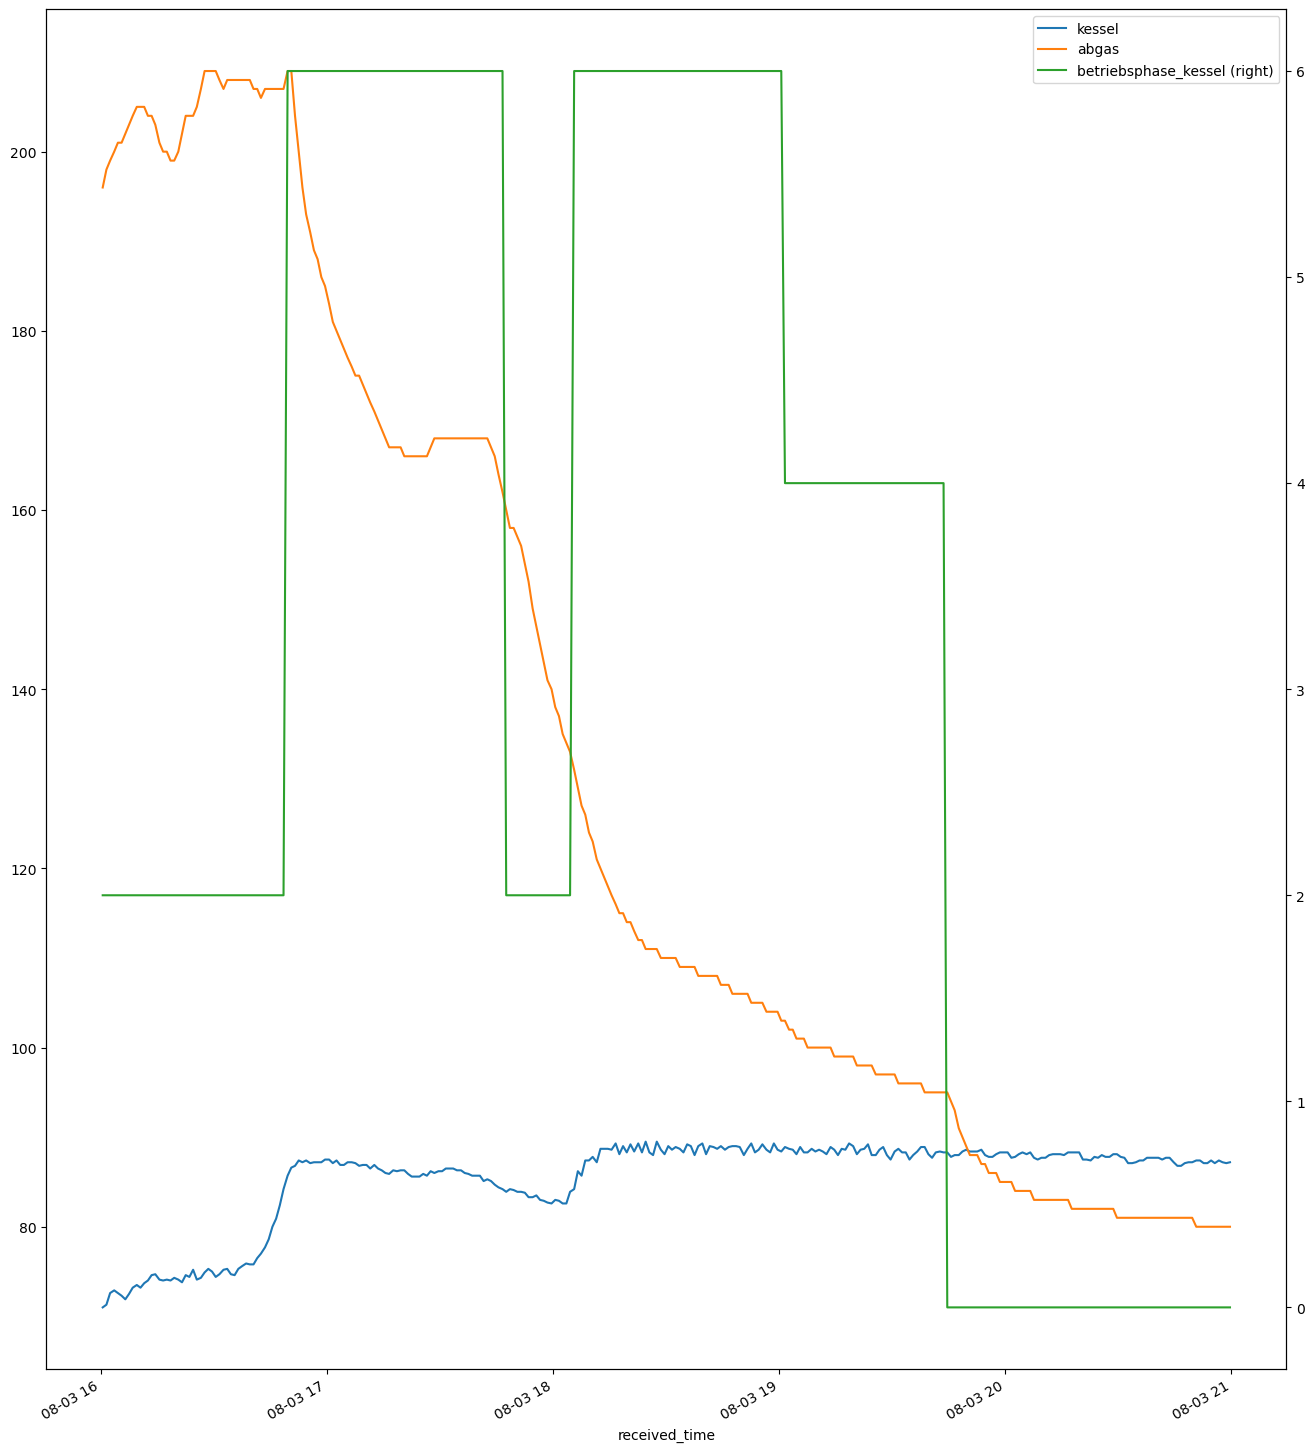

In [32]:
df["betriebsphase_kessel"] = df["betriebsphase_kessel"].astype(int)
_ = df[(df.index > '2022-08-03T16:00:00') & (df.index < '2022-08-03T21:00:00')].plot(y=["kessel", "abgas", "betriebsphase_kessel"], secondary_y=["betriebsphase_kessel"])
df["betriebsphase_kessel"] = df["betriebsphase_kessel"].astype('category')

There's a good chance 6 is Abregeln because that as we can see here as soon as it goes over 85°, which is the default Solltemperatur for the Kessel, it tries to decrease the temperature as stated on P.43 of the specs. We can see that happens twice both times coming from 2 (Automatic), once going back to 2 and once going directly to 4 (Ausbrennen) and then, as usual, to 0 (Aus).

8 only happened on three days, all in winter and when the Kessel was cold. Everytime shortly before firing up (or during but before any significant increase in temperature) (checked the history graph manually).  
Maybe, for whatever weird reason, this could be Anfeuern erkannt so the automatic firing up process.

In [33]:
df[df.betriebsphase_kessel == 8]

kessel  ruecklauf  abgas  co2_soll  co2_ist  \
received_time                                                             
2020-11-26 16:01:05.451416    18.4       15.1    4.0      12.0      5.4   
2020-11-26 16:02:04.450776    18.4       15.1    4.0      12.0      0.0   
2020-11-26 16:03:03.449032    18.4       15.1    4.0      12.0      0.0   
2020-11-26 16:04:02.448075    18.4       15.1    4.0      12.0      0.4   
2020-11-26 16:05:07.298773    18.6       15.1   18.0      12.0      7.6   
2021-12-11 17:28:22.447729    27.5       19.3   14.0      12.0      8.6   
2021-12-11 17:29:27.342010    27.6       19.5   14.0      12.0      0.0   
2021-12-11 17:30:26.342450    27.6       19.5   14.0      12.0      0.0   
2021-12-11 17:31:25.340792    27.3       19.3   14.0      12.0      0.0   
2021-12-11 17:32:24.340512    27.6       19.3   14.0      12.0      1.7   
2021-12-11 17:33:23.338943    27.6       19.3   35.0      12.0      6.1   
2021-12-15 05:49:17.248428    22.8       17.5    9.0      12.0      1.0   
2021-12-15 05:50:16.247098    23.0       17.5    9.0      12.0      0.0   
2021-12-15 05:51:15.245830    22.8       17.5    9.0      12.0      0.0   
2021-12-15 05:52:20.156243    23.0       17.4    9.0      12.0      0.1   
2021-12-15 05:53:19.154598    22.7       17.4    9.0      12.0      0.3   
2021-12-15 05:54:18.154719    22.8       17.4   20.0      12.0      4.7   

                            saugzug_ist  puffer_oben  puffer_unten  platine  \
received_time                                                                 
2020-11-26 16:01:05.451416       6000.0         24.2          22.7     19.9   
2020-11-26 16:02:04.450776       6000.0         24.2          22.7     19.9   
2020-11-26 16:03:03.449032       6000.0         24.2          22.7     19.9   
2020-11-26 16:04:02.448075       6000.0         24.2          22.7     19.9   
2020-11-26 16:05:07.298773       6000.0         24.2          22.8     19.9   
2021-12-11 17:28:22.447729       9000.0         47.3          33.1     21.0   
2021-12-11 17:29:27.342010       6000.0         47.3          33.6     21.0   
2021-12-11 17:30:26.342450       6000.0         47.3          33.6     21.0   
2021-12-11 17:31:25.340792       6000.0         47.1          33.3     21.0   
2021-12-11 17:32:24.340512       1750.0         47.1          33.3     21.0   
2021-12-11 17:33:23.338943       2750.0         47.1          33.3     21.0   
2021-12-15 05:49:17.248428       6000.0         36.4          30.0     20.8   
2021-12-15 05:50:16.247098       6000.0         36.4          30.0     20.7   
2021-12-15 05:51:15.245830       6000.0         36.4          30.0     20.7   
2021-12-15 05:52:20.156243       6000.0         36.4          30.0     20.6   
2021-12-15 05:53:19.154598       2350.0         36.4          29.9     20.6   
2021-12-15 05:54:18.154719       6000.0         36.4          30.0     20.6   

                           betriebsphase_kessel  ...  a_ea_0  a_ea_1  a_ea_2  \
received_time                                    ...                           
2020-11-26 16:01:05.451416                    8  ...   False    True    True   
2020-11-26 16:02:04.450776                    8  ...    True    True    True   
2020-11-26 16:03:03.449032                    8  ...    True    True    True   
2020-11-26 16:04:02.448075                    8  ...    True    True    True   
2020-11-26 16:05:07.298773                    8  ...   False    True    True   
2021-12-11 17:28:22.447729                    8  ...    True    True    True   
2021-12-11 17:29:27.342010                    8  ...    True    True    True   
2021-12-11 17:30:26.342450                    8  ...    True    True    True   
2021-12-11 17:31:25.340792                    8  ...    True    True    True   
2021-12-11 17:32:24.340512                    8  ...    True    True    True   
2021-12-11 17:33:23.338943                    8  ...    True    True    True   
2021-12-15 05:49:17.248428                    8  ...   False

Plotting a graph almost certainly confirms my intuition that 8 = anfeuern erkannt because it goes Anfeuern erkannt -> Anfeuern -> Automatik -> Ausbrennen -> Aus, just like described in the specs. It would also make sense for that to be 8 since it's describe as something "new" in the specs meaning a later addition to the system and thus a higher enum value.

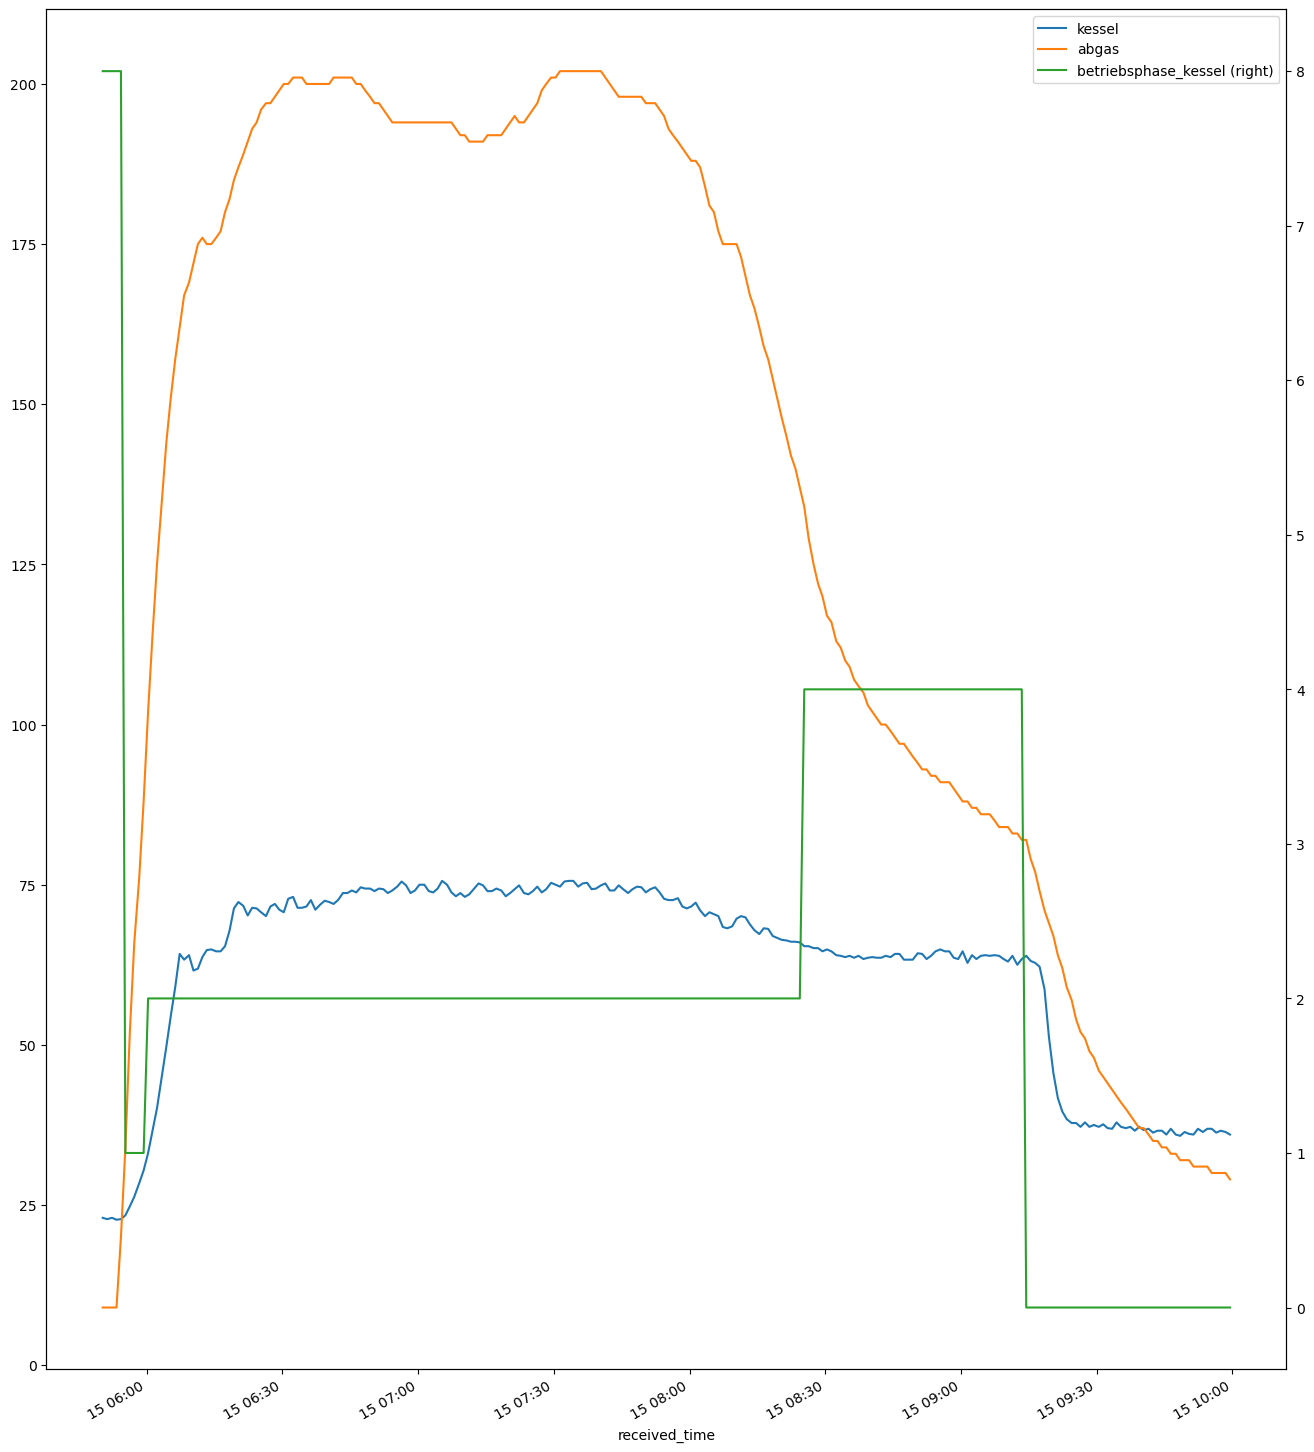

In [34]:
df["betriebsphase_kessel"] = df["betriebsphase_kessel"].astype(int)
_ = df[(df.index > '2021-12-15T05:50:00') & (df.index < '2021-12-15T10:00:00')].plot(y=["kessel", "abgas", "betriebsphase_kessel"], secondary_y=["betriebsphase_kessel"])
df["betriebsphase_kessel"] = df["betriebsphase_kessel"].astype('category')

### Confirming that di_2 means lid is closed (so di_2=low means lid is open)

In [35]:
lid_open = df[df.di_2 == False]
lid_open.head(20)

kessel  ruecklauf  abgas  co2_soll  co2_ist  \
received_time                                                             
2020-06-13 19:35:32.177326    20.4       18.9    8.0      12.0     15.8   
2020-06-13 19:36:31.175139    20.4       18.9    8.0      12.0      6.8   
2020-06-13 19:37:30.174910    20.3       18.9    8.0      12.0      6.3   
2020-06-13 19:38:35.120136    20.4       18.9    7.0      12.0     15.1   
2020-06-13 19:39:34.122155    20.3       18.9    7.0      12.0      6.4   
2020-06-13 19:40:33.118309    20.3       18.9    7.0      12.0      2.8   
2020-06-20 16:54:46.646196    20.1       18.9    7.0      12.0      6.8   
2020-06-20 16:55:45.646645    20.1       18.9    7.0      12.0      6.7   
2020-06-20 19:34:47.027809    65.5       59.6  103.0      12.0      2.0   
2020-06-28 14:16:43.061116    22.7       21.2   10.0      12.0      0.8   
2020-06-28 14:17:42.059568    22.8       21.2   10.0      12.0      0.0   
2020-06-28 14:19:45.977491    22.7       21.2   10.0      12.0      0.0   
2020-06-28 16:25:50.052101    71.4       61.8  160.0      12.0      5.1   
2020-07-10 16:33:00.521117    21.5       20.6    9.0      12.0     17.5   
2020-07-10 16:33:59.519124    21.6       20.6    9.0      12.0     16.3   
2020-07-10 17:51:02.723330    63.0       57.2  111.0      12.0      6.3   
2020-07-10 17:52:01.721300    63.3       57.7  126.0      12.0     11.5   
2020-07-20 18:00:21.974136    22.1       21.0   10.0      12.0      6.5   
2020-07-20 18:01:20.973188    22.1       21.0   10.0      12.0      6.4   
2020-07-20 18:02:25.863482    22.1       21.0   10.0      12.0      5.2   

                            saugzug_ist  puffer_oben  puffer_unten  platine  \
received_time                                                                 
2020-06-13 19:35:32.177326       1000.0         37.2          34.0     23.2   
2020-06-13 19:36:31.175139       1000.0         37.2          34.3     23.3   
2020-06-13 19:37:30.174910       1000.0         37.2          34.3     23.4   
2020-06-13 19:38:35.120136       1000.0         37.2          34.5     23.4   
2020-06-13 19:39:34.122155       1000.0         37.2          34.6     23.4   
2020-06-13 19:40:33.118309       1000.0         37.2          34.6     23.5   
2020-06-20 16:54:46.646196       1000.0         38.4          34.0     23.0   
2020-06-20 16:55:45.646645       1000.0         38.4          34.0     23.1   
2020-06-20 19:34:47.027809       1000.0         75.6          36.0     44.3   
2020-06-28 14:16:43.061116       9000.0         42.5          37.8     25.4   
2020-06-28 14:17:42.059568       1000.0         42.5          37.8     25.6   
2020-06-28 14:19:45.977491       1000.0         42.5          37.8     25.5   
2020-06-28 16:25:50.052101       1000.0         77.4          39.3     43.5   
2020-07-10 16:33:00.521117       1000.0         35.2          31.3     24.9   
2020-07-10 16:33:59.519124       1000.0         35.2          31.3     25.0   
2020-07-10 17:51:02.723330       4000.0         34.9          31.2     25.4   
2020-07-10 17:52:01.721300       1000.0         34.9          31.2     25.7   
2020-07-20 18:00:21.974136       1000.0         39.1          35.7     25.1   
2020-07-20 18:01:20.973188       1000.0         39.1          36.0     25.2   
2020-07-20 18:02:25.863482       1000.0         39.0          36.1     25.4   

                           betriebsphase_kessel  ...  a_ea_0  a_ea_1  a_ea_2  \
received_time                                    ...                           
2020-06-13 19:35:32.177326                    0  ...    True    True    True   
2020-06-13 19:36:31.175139                    0  ...    True    True    True   
2020-06-13 19:37:30.174910                    0  ...    True    True    True   
2020-06-13 19:38:35.120136                    0  ...    True    True    True   
2020-06-13 19:39:34.122155                    0  ...    True    True    True   
2020-06-13 19:40:33.118309                    0  ...    True    True    True  

In [36]:
lid_open.groupby([lid_open.index.date]).median()

kessel  ruecklauf  abgas  co2_soll  co2_ist  saugzug_ist  \
2020-06-13   20.35       18.9    7.5      12.0     6.60       1000.0   
2020-06-20   20.10       18.9    7.0      12.0     6.70       1000.0   
2020-06-28   22.75       21.2   10.0      12.0     0.40       1000.0   
2020-07-10   42.30       38.9   60.0      12.0    13.90       1000.0   
2020-07-20   22.10       21.0   10.0      12.0     5.80       1000.0   
...            ...        ...    ...       ...      ...          ...   
2022-07-14   22.80       21.8   11.0      12.0     1.20       1000.0   
2022-07-24   23.65       22.5   12.0      12.0     7.15       1000.0   
2022-08-03   23.70       22.7   12.0      12.0     0.00       1000.0   
2022-08-14   24.10       23.0   12.0      12.0     3.00       1000.0   
2022-08-26   22.70       21.9   11.0      12.0    17.40       1000.0   

            puffer_oben  puffer_unten  platine  aussen  ...  a_ea_0  a_ea_1  \
2020-06-13        37.20         34.40    23.40    16.8  ...     1.0     1.0   
2020-06-20        38.40         34.00    23.10    23.0  ...     1.0     1.0   
2020-06-28        42.50         37.80    25.55    25.7  ...     1.0     1.0   
2020-07-10        35.05         31.25    25.20    28.9  ...     1.0     1.0   
2020-07-20        39.05         36.05    25.30    29.6  ...     1.0     1.0   
...                 ...           ...      ...     ...  ...     ...     ...   
2022-07-14        35.20         32.20    26.10    34.2  ...     1.0     1.0   
2022-07-24        33.30         30.00    27.85    30.4  ...     1.0     1.0   
2022-08-03        36.90         33.60    26.90    31.9  ...     1.0     1.0   
2022-08-14        37.80         34.90    26.85    24.2  ...     1.0     1.0   
2022-08-26        34.20         29.60    26.20    21.6  ...     1.0     1.0   

            a_ea_2  a_ea_3  a_ea_4  a_phase_0  a_phase_1  a_phase_2  \
2020-06-13     1.0     0.0     0.0        1.0        0.0        0.0   
2020-06-20     1.0     0.0     0.0        1.0        0.0        0.0   
2020-06-28     1.0     0.0     0.0        1.0        0.0        0.0   
2020-07-10     1.0     0.5     0.0        1.0        0.0        0.0   
2020-07-20     1.0     0.0     0.0        1.0        0.0        0.0   
...            ...     ...     ...        ...        ...        ...   
2022-07-14     1.0     0.0     0.0        1.0        0.0        0.0   
2022-07-24     1.0     0.0     0.0        1.0        0.0        0.0   
2022-08-03     1.0     0.0     0.0        1.0        0.0        0.0   
2022-08-14     1.0     0.0     0.0        1.0        0.0        0.0   
2022-08-26     1.0     0.0     0.0        1.0        0.0        0.0   

            a_phase_3  a_phase_4  
2020-06-13        0.0        0.0  
2020-06-20        0.0        0.0  
2020-06-28        0.0        0.0  
2020-07-10        0.0        0.0  
2020-07-20        0.0        0.0  
...               ...        ...  
2022-07-14        0.0        0.0  
2022-07-24        0.0        0.0  
2022-08-03        0.0        0.0  
2022-08-14        0.0        0.0  
2022-08-26        0.0        0.0  

[239 rows x 33 columns]

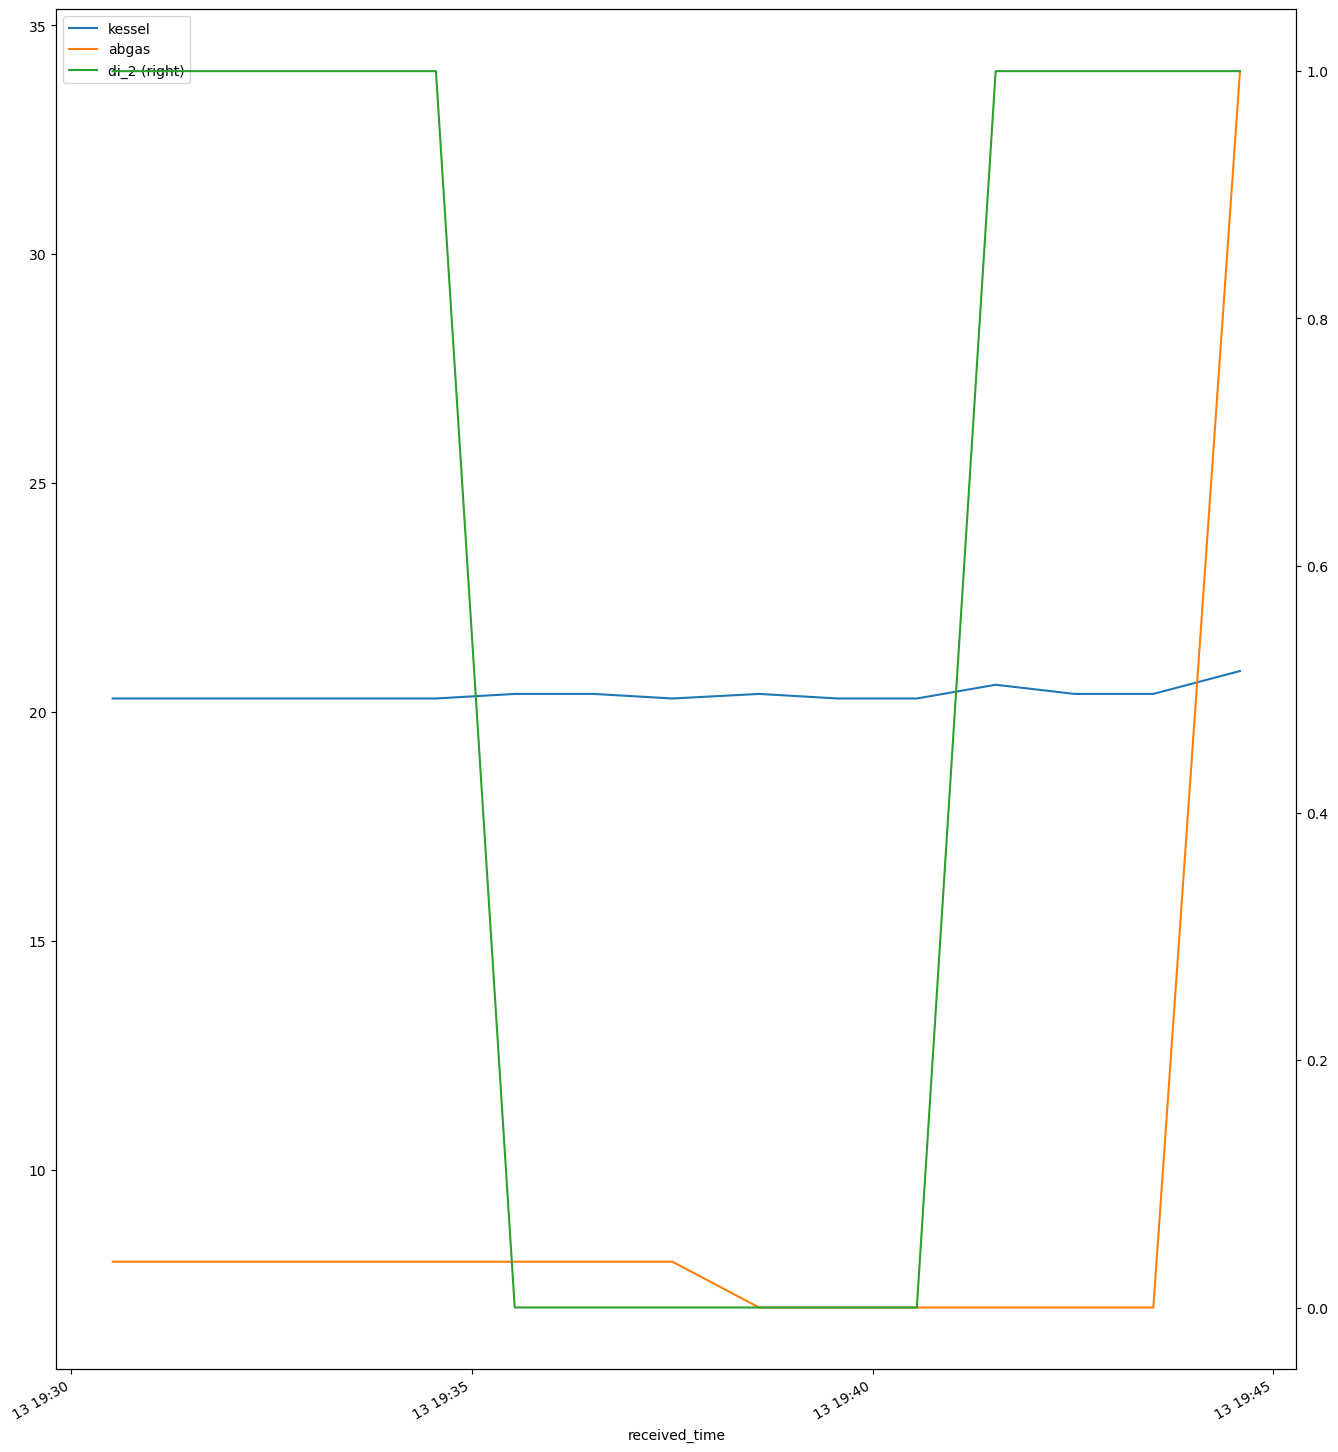

In [37]:
_ = df[(df.index > '2020-06-13T19:30:00') & (df.index < '2020-06-13T19:45:00')].plot(y=["kessel", "abgas", "di_2"], include_bool=True, secondary_y=["di_2"])

### Confirming that A_W_1 means Primärluftklappe opens

In [38]:
air_lid_open = df[df.a_w_1 == True]
air_lid_open

kessel  ruecklauf  abgas  co2_soll  co2_ist  \
received_time                                                             
2020-06-13 19:44:34.970616    20.9       18.9   34.0      12.0      2.0   
2020-06-13 19:45:34.361380    22.1       18.9   44.0      12.0      4.0   
2020-06-13 19:46:33.360358    24.0       18.9   54.0      12.0      3.5   
2020-06-13 19:47:32.358839    26.6       19.3   59.0      12.0      3.6   
2020-06-13 19:48:31.358664    28.1       19.8   65.0      12.0      4.0   
...                            ...        ...    ...       ...      ...   
2022-08-26 21:14:15.312862    64.8       56.9   85.0      12.0      1.5   
2022-08-26 21:15:14.312360    64.5       58.0   85.0      12.0      1.6   
2022-08-26 21:16:13.310504    63.1       58.7   84.0      12.0      1.0   
2022-08-26 21:17:12.310542    64.3       60.0   83.0      12.0      0.0   
2022-08-26 21:18:17.257551    62.8       60.7   83.0      12.0      1.5   

                            saugzug_ist  puffer_oben  puffer_unten  platine  \
received_time                                                                 
2020-06-13 19:44:34.970616       1100.0         37.2          34.9     23.2   
2020-06-13 19:45:34.361380       1100.0         37.2          35.1     23.2   
2020-06-13 19:46:33.360358       1100.0         37.2          34.3     23.2   
2020-06-13 19:47:32.358839       1100.0         37.2          34.2     23.2   
2020-06-13 19:48:31.358664       1100.0         37.2          34.0     23.2   
...                                 ...          ...           ...      ...   
2022-08-26 21:14:15.312862       5700.0         76.2          32.2     46.4   
2022-08-26 21:15:14.312360       5700.0         76.2          32.4     46.2   
2022-08-26 21:16:13.310504       5700.0         76.2          32.4     46.1   
2022-08-26 21:17:12.310542       5700.0         76.1          32.4     46.0   
2022-08-26 21:18:17.257551       5700.0         75.9          32.4     45.8   

                           betriebsphase_kessel  ...  a_ea_0  a_ea_1  a_ea_2  \
received_time                                    ...                           
2020-06-13 19:44:34.970616                    1  ...    True    True    True   
2020-06-13 19:45:34.361380                    1  ...    True    True    True   
2020-06-13 19:46:33.360358                    1  ...    True    True    True   
2020-06-13 19:47:32.358839                    1  ...    True    True    True   
2020-06-13 19:48:31.358664                    1  ...    True    True    True   
...                                         ...  ...     ...     ...     ...   
2022-08-26 21:14:15.312862                    4  ...    True    True    True   
2022-08-26 21:15:14.312360                    4  ...    True    True   False   
2022-08-26 21:16:13.310504                    4  ...    True    True    True   
2022-08-26 21:17:12.310542                    4  ...    True    True   False   
2022-08-26 21:18:17.257551                    4  ...    True    True    True   

                           a_ea_3  a_ea_4  a_phase_0 a_phase_1  a_phase_2  \
received_time                                                               
2020-06-13 19:44:34.970616   True   False       True     False      False   
2020-06-13 19:45:34.361380   True   False       True     False      False   
2020-06-13 19:46:33.360358   True   False       True     False      False   
2020-06-13 19:47:32.358839   True   False       True     False      False   
2020-06-13 19:48:31.358664   True   False       True     False      False   
...                           ...     ...        ...       ...        ...   
2022-08-26 21:14:15.312862   True   False       True      True      False   
2022-08-26 21:15:14.312360   True   False       True      True      False   
2022-08-26 21:16:13.310504   True   False       True     False      False   
2022-08-26 21:17:12.310542   True   False       True      True      False   
2022-08-26 21:18:17.257551   True   False       True     Fa

In [39]:
air_lid_open.groupby(air_lid_open.index.date).first()

kessel  ruecklauf  abgas  co2_soll  co2_ist  saugzug_ist  \
2020-06-13    20.9       18.9   34.0      12.0      2.0       1100.0   
2020-06-20    20.1       18.9    7.0      12.0      0.0       1100.0   
2020-06-28    22.8       21.2   10.0      12.0      0.0       1100.0   
2020-07-10    21.5       20.6    9.0      12.0      6.8       1100.0   
2020-07-20    22.2       21.0   10.0      12.0      0.0       1100.0   
...            ...        ...    ...       ...      ...          ...   
2022-07-14    22.8       21.8   11.0      12.0      3.6       9000.0   
2022-07-24    23.9       22.5   12.0      12.0      0.0       1100.0   
2022-08-03    23.6       22.7   12.0      12.0      0.0       1100.0   
2022-08-14    24.0       23.0   12.0      12.0      0.0       1100.0   
2022-08-26    22.5       21.9   11.0      12.0      0.1       1100.0   

            puffer_oben  puffer_unten  platine betriebsphase_kessel  ...  \
2020-06-13         37.2          34.9     23.2                    1  ...   
2020-06-20         38.4          34.0     22.9                    1  ...   
2020-06-28         42.5          37.8     25.5                    1  ...   
2020-07-10         35.2          31.3     24.8                    1  ...   
2020-07-20         39.0          36.6     25.2                    1  ...   
...                 ...           ...      ...                  ...  ...   
2022-07-14         35.2          32.2     26.0                    0  ...   
2022-07-24         33.3          30.0     27.8                    1  ...   
2022-08-03         36.9          33.6     26.8                    1  ...   
2022-08-14         37.8          34.9     26.8                    1  ...   
2022-08-26         34.2          29.6     26.0                    1  ...   

            a_ea_0  a_ea_1  a_ea_2 a_ea_3  a_ea_4  a_phase_0 a_phase_1  \
2020-06-13    True    True    True   True   False       True     False   
2020-06-20   False    True    True   True   False       True     False   
2020-06-28    True    True    True   True   False       True     False   
2020-07-10    True    True    True   True   False       True     False   
2020-07-20    True    True    True   True   False       True     False   
...            ...     ...     ...    ...     ...        ...       ...   
2022-07-14    True    True    True  False   False      False     False   
2022-07-24    True    True    True   True   False       True     False   
2022-08-03    True    True    True   True   False       True     False   
2022-08-14    True    True    True   True   False       True     False   
2022-08-26    True    True    True   True   False       True     False   

            a_phase_2  a_phase_3  a_phase_4  
2020-06-13      False      False      False  
2020-06-20      False      False      False  
2020-06-28      False      False      False  
2020-07-10      False      False      False  
2020-07-20      False      False      False  
...               ...        ...        ...  
2022-07-14      False      False      False  
2022-07-24      False      False      False  
2022-08-03      False      False      False  
2022-08-14      False      False      False  
2022-08-26      False      False      False  

[254 rows x 36 columns]

<AxesSubplot:xlabel='received_time'>

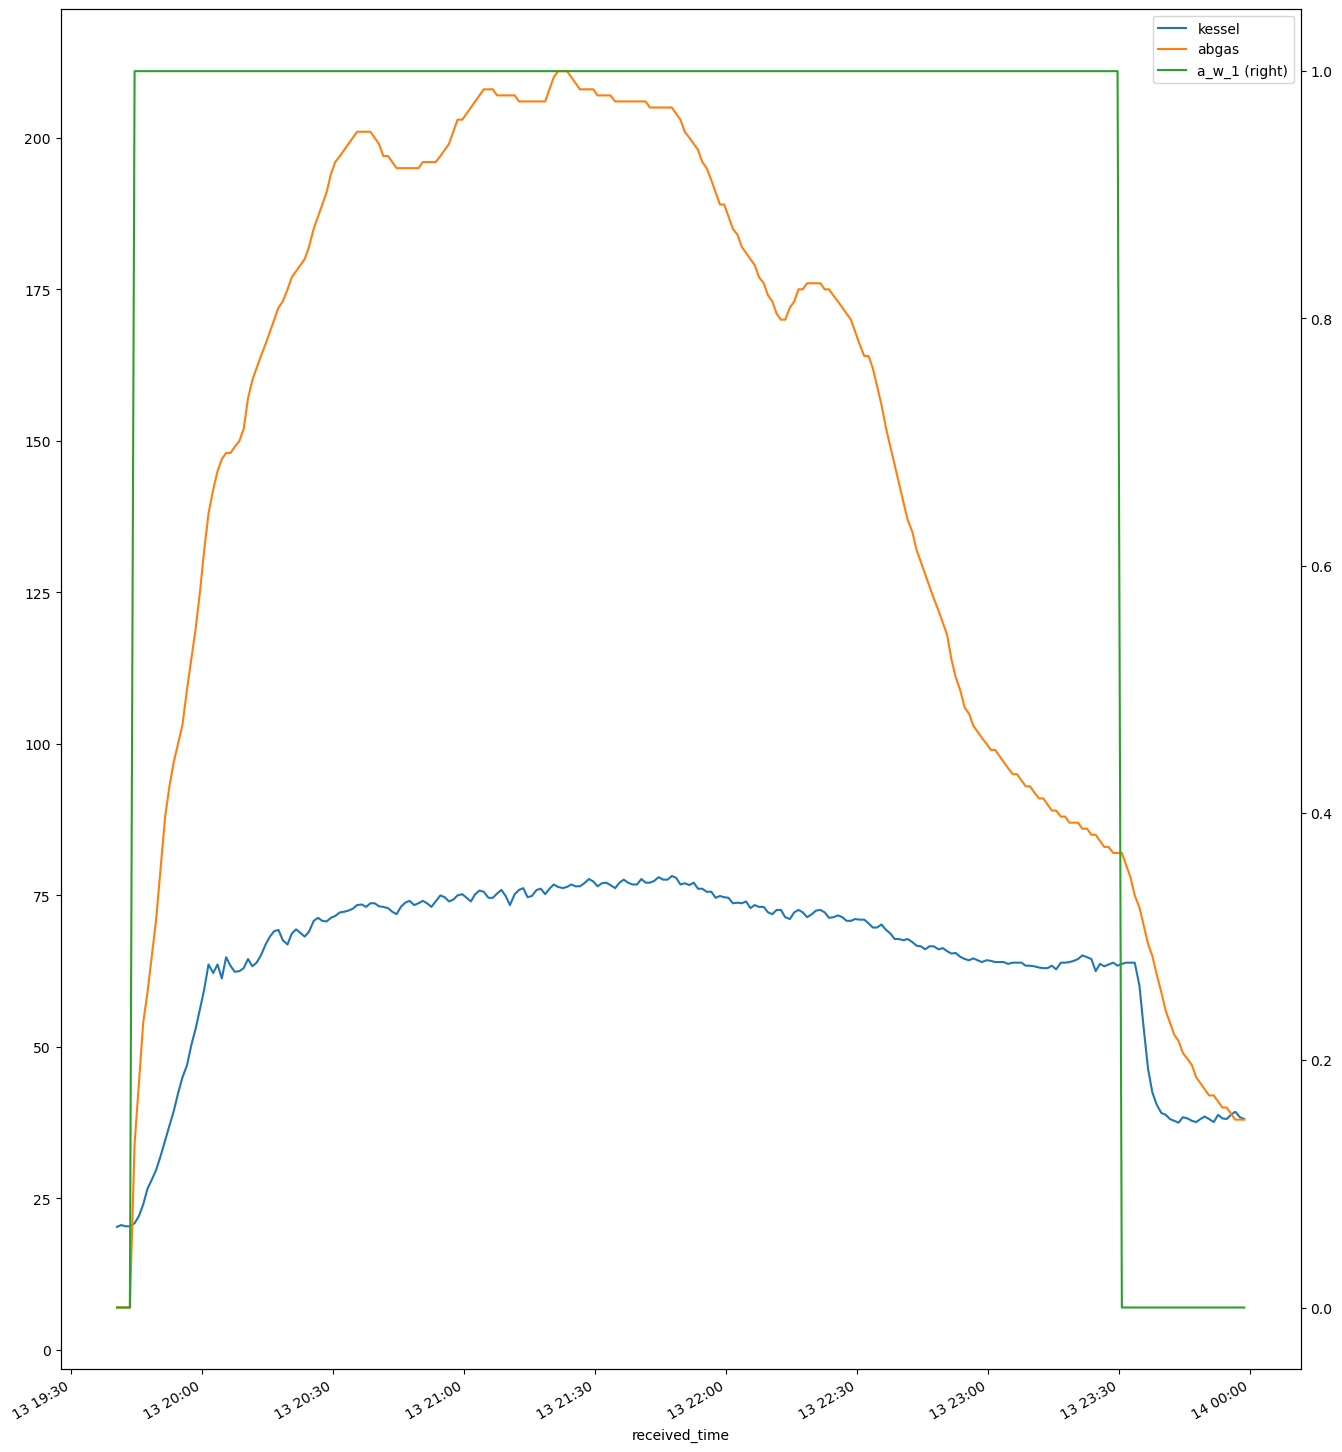

In [40]:
df[(df.index > '2020-06-13T19:40:00') & (df.index < '2020-06-13T23:59:00')].plot(y=["kessel", "abgas", "a_w_1"], secondary_y=["a_w_1"], include_bool=True)

<AxesSubplot:xlabel='received_time'>

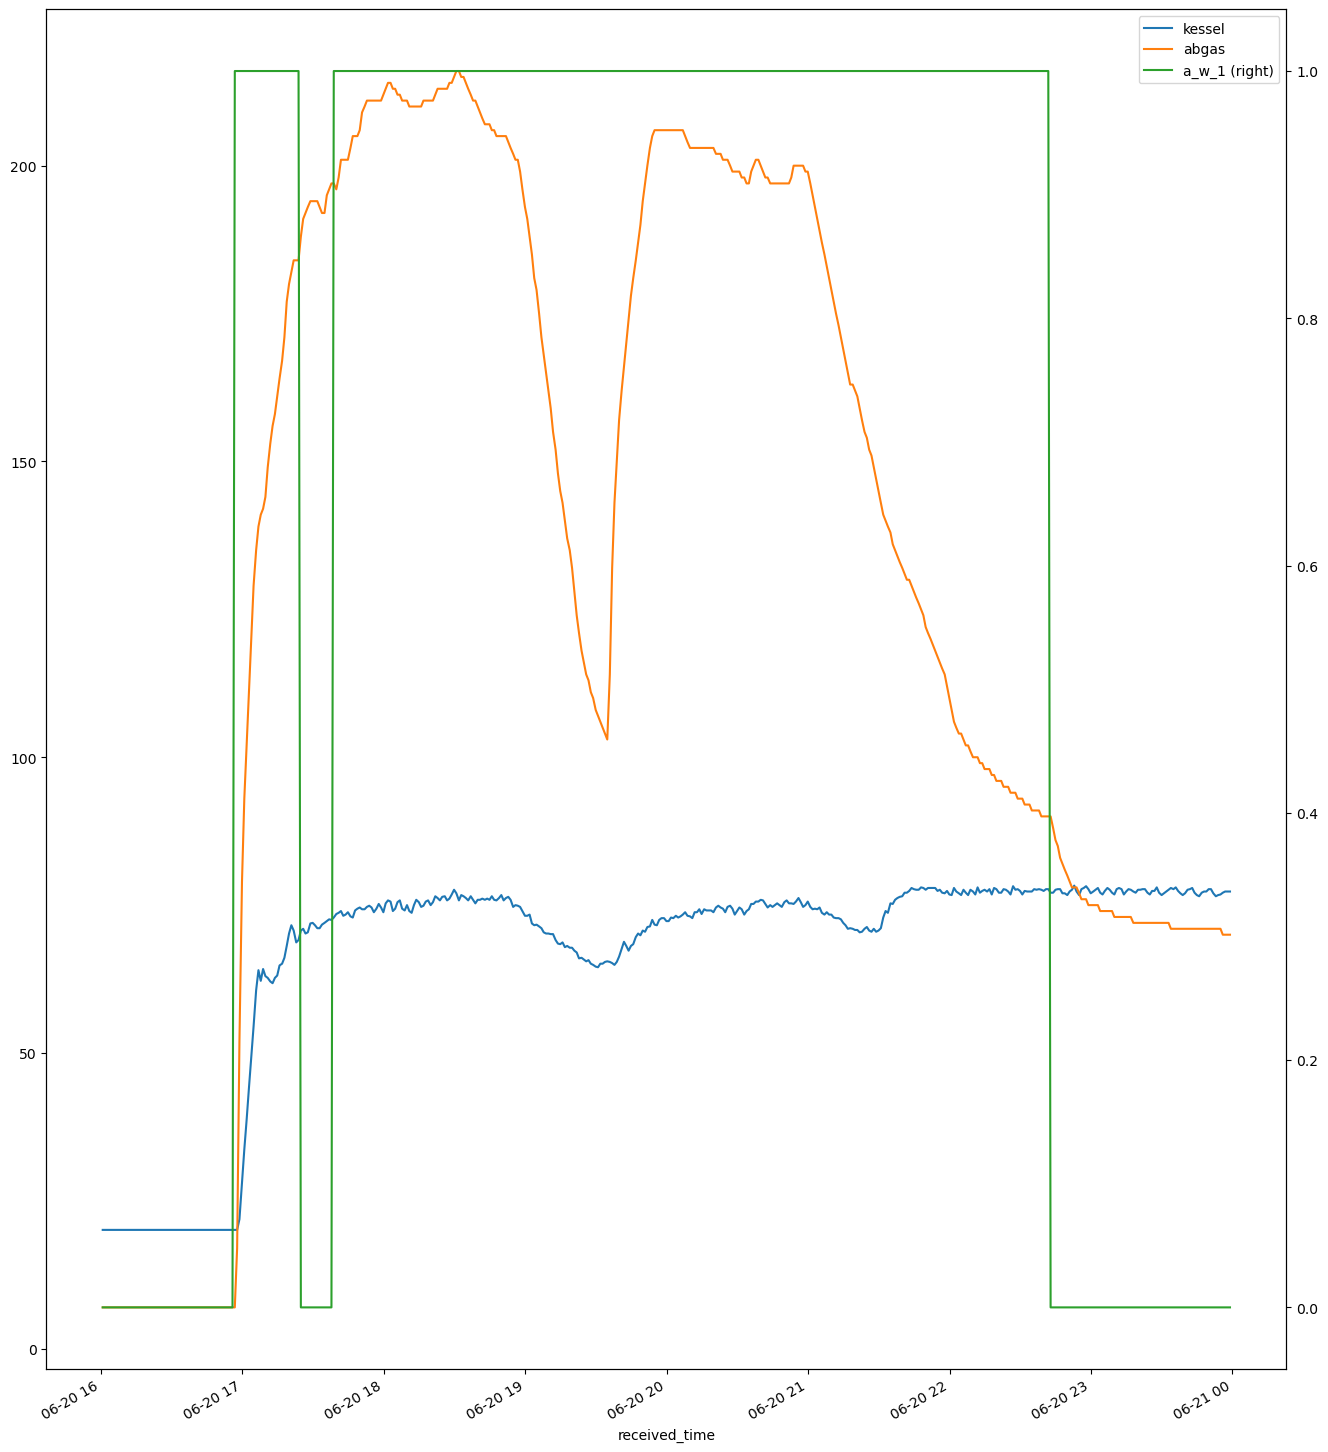

In [41]:
df[(df.index > '2020-06-20T16:00:00') & (df.index < '2020-06-20T23:59:00')].plot(y=["kessel", "abgas", "a_w_1"], secondary_y=["a_w_1"], include_bool=True)

Now the same timespan with A_W_0, the same for the secondary air lid, instead of the primary air lid

<AxesSubplot:xlabel='received_time'>

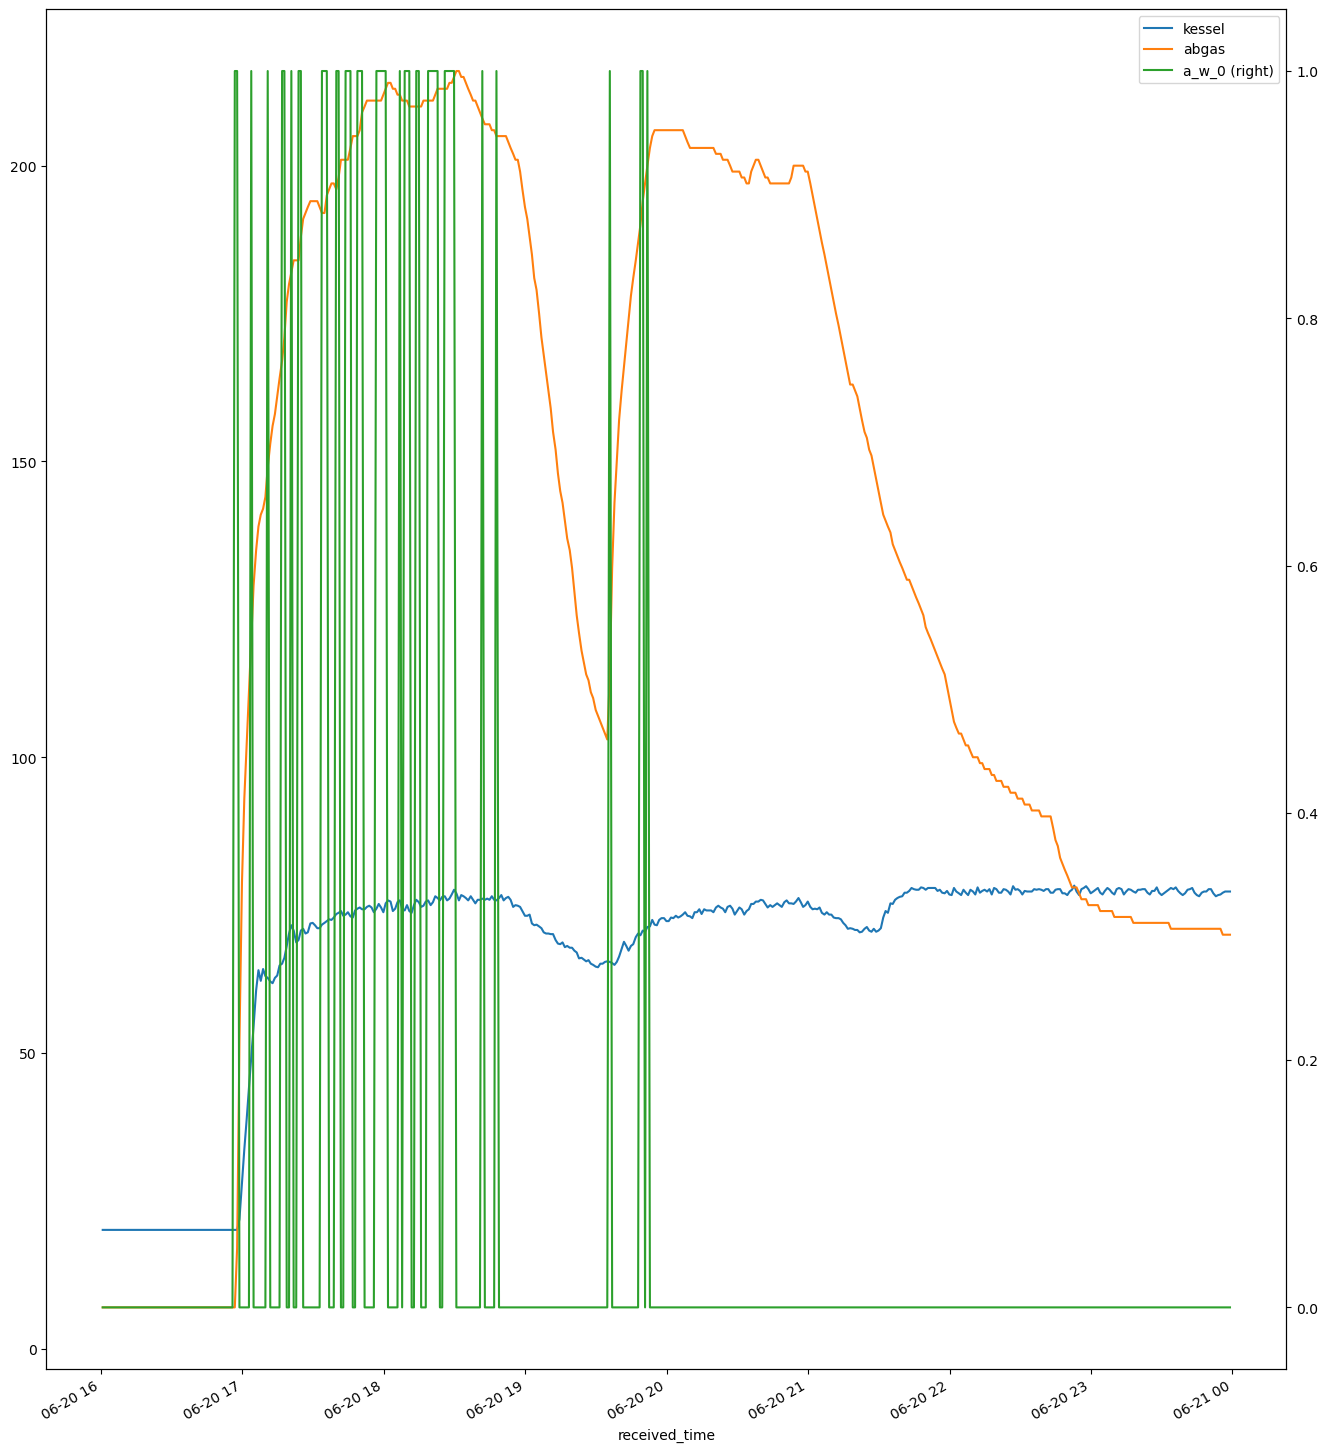

In [42]:
df[(df.index > '2020-06-20T16:00:00') & (df.index < '2020-06-20T23:59:00')].plot(y=["kessel", "abgas", "a_w_0"], secondary_y=["a_w_0"], include_bool=True)

Motor für Mischer für Rücklaufanhebung

<AxesSubplot:xlabel='received_time'>

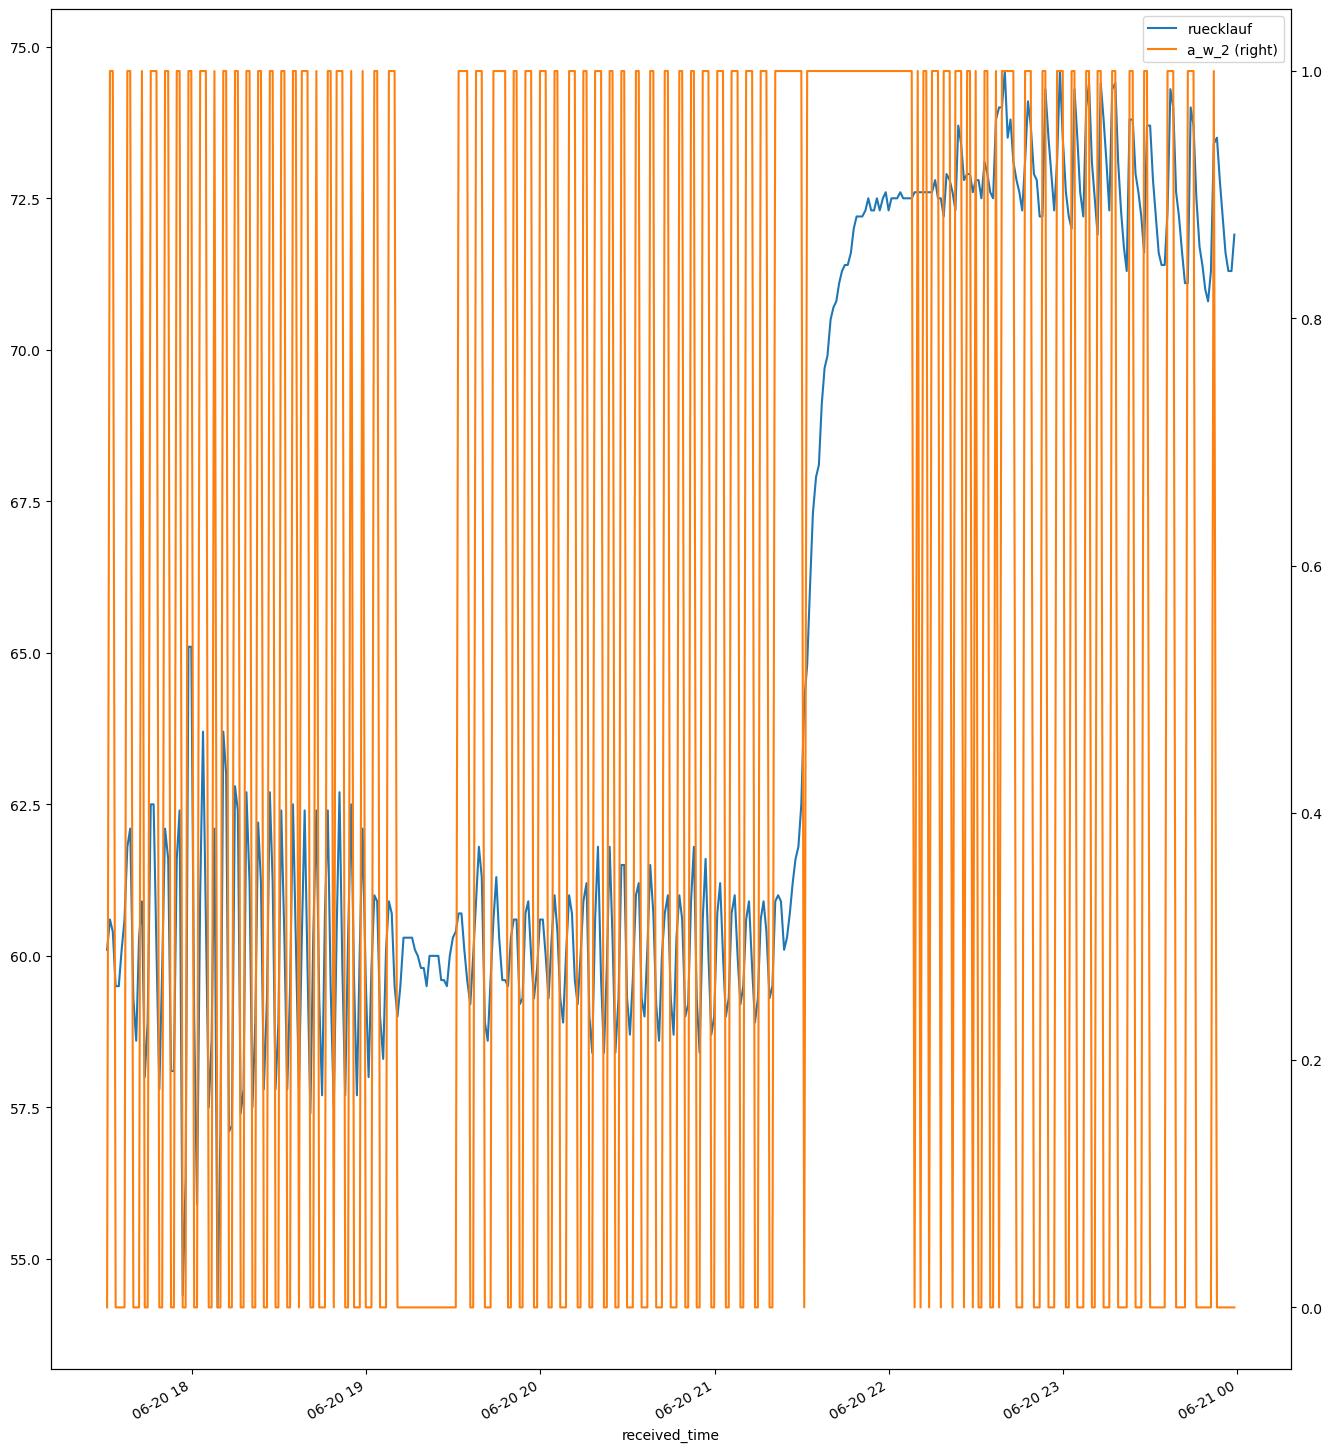

In [43]:
df[(df.index > '2020-06-20T17:30:00') & (df.index < '2020-06-20T23:59:00')].plot(y=["ruecklauf", "a_w_2"], secondary_y=["a_w_2"], include_bool=True)

### Saugzug-Gebläse

seems to start earlier than Primärluftklappe (e.g. when the lid is open already) and then as long as there's fire.

Also it's very interesting to see the relationship with the phase.  
It seems clear that 0 means off, then 1

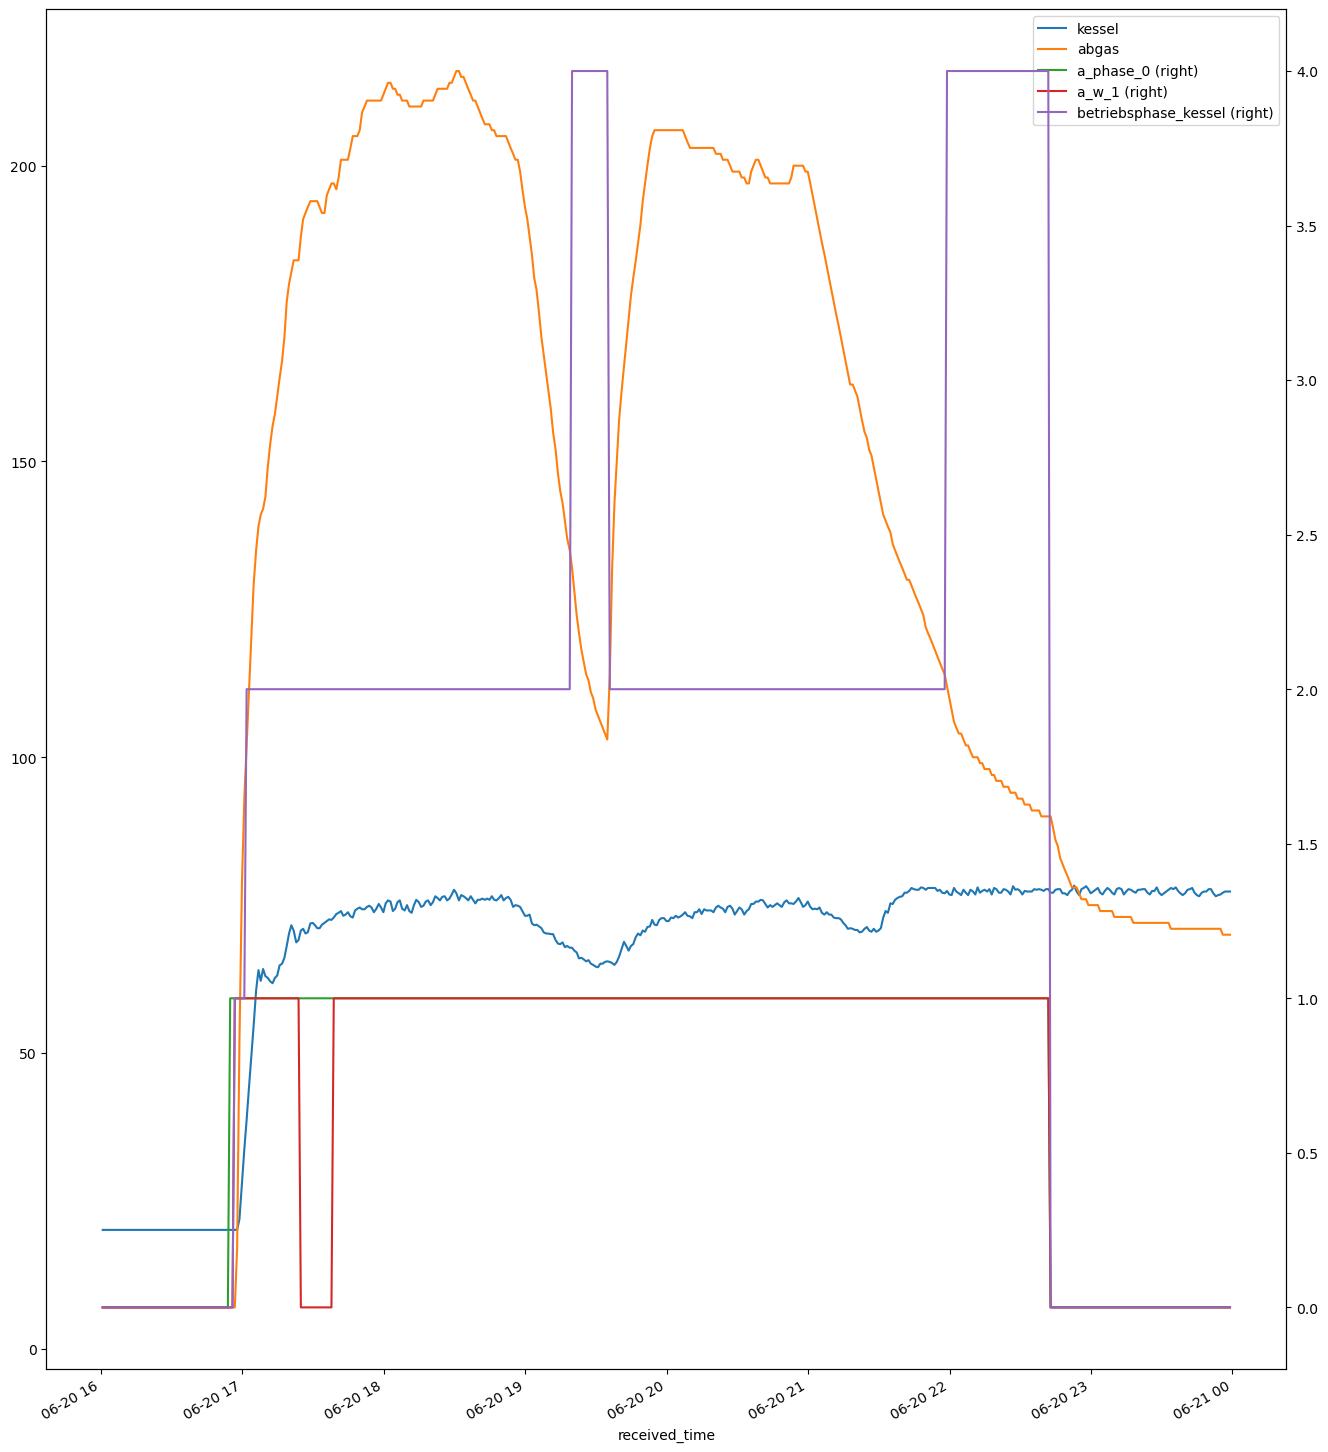

In [44]:
df.betriebsphase_kessel = df.betriebsphase_kessel.astype(int)
df[(df.index > '2020-06-20T16:00:00') & (df.index < '2020-06-20T23:59:00')].plot(y=["kessel", "abgas", "a_phase_0", "a_w_1", "betriebsphase_kessel"], secondary_y=["a_phase_0", "a_w_1", "betriebsphase_kessel"], include_bool=True)
df.betriebsphase_kessel = df.betriebsphase_kessel.astype('category')

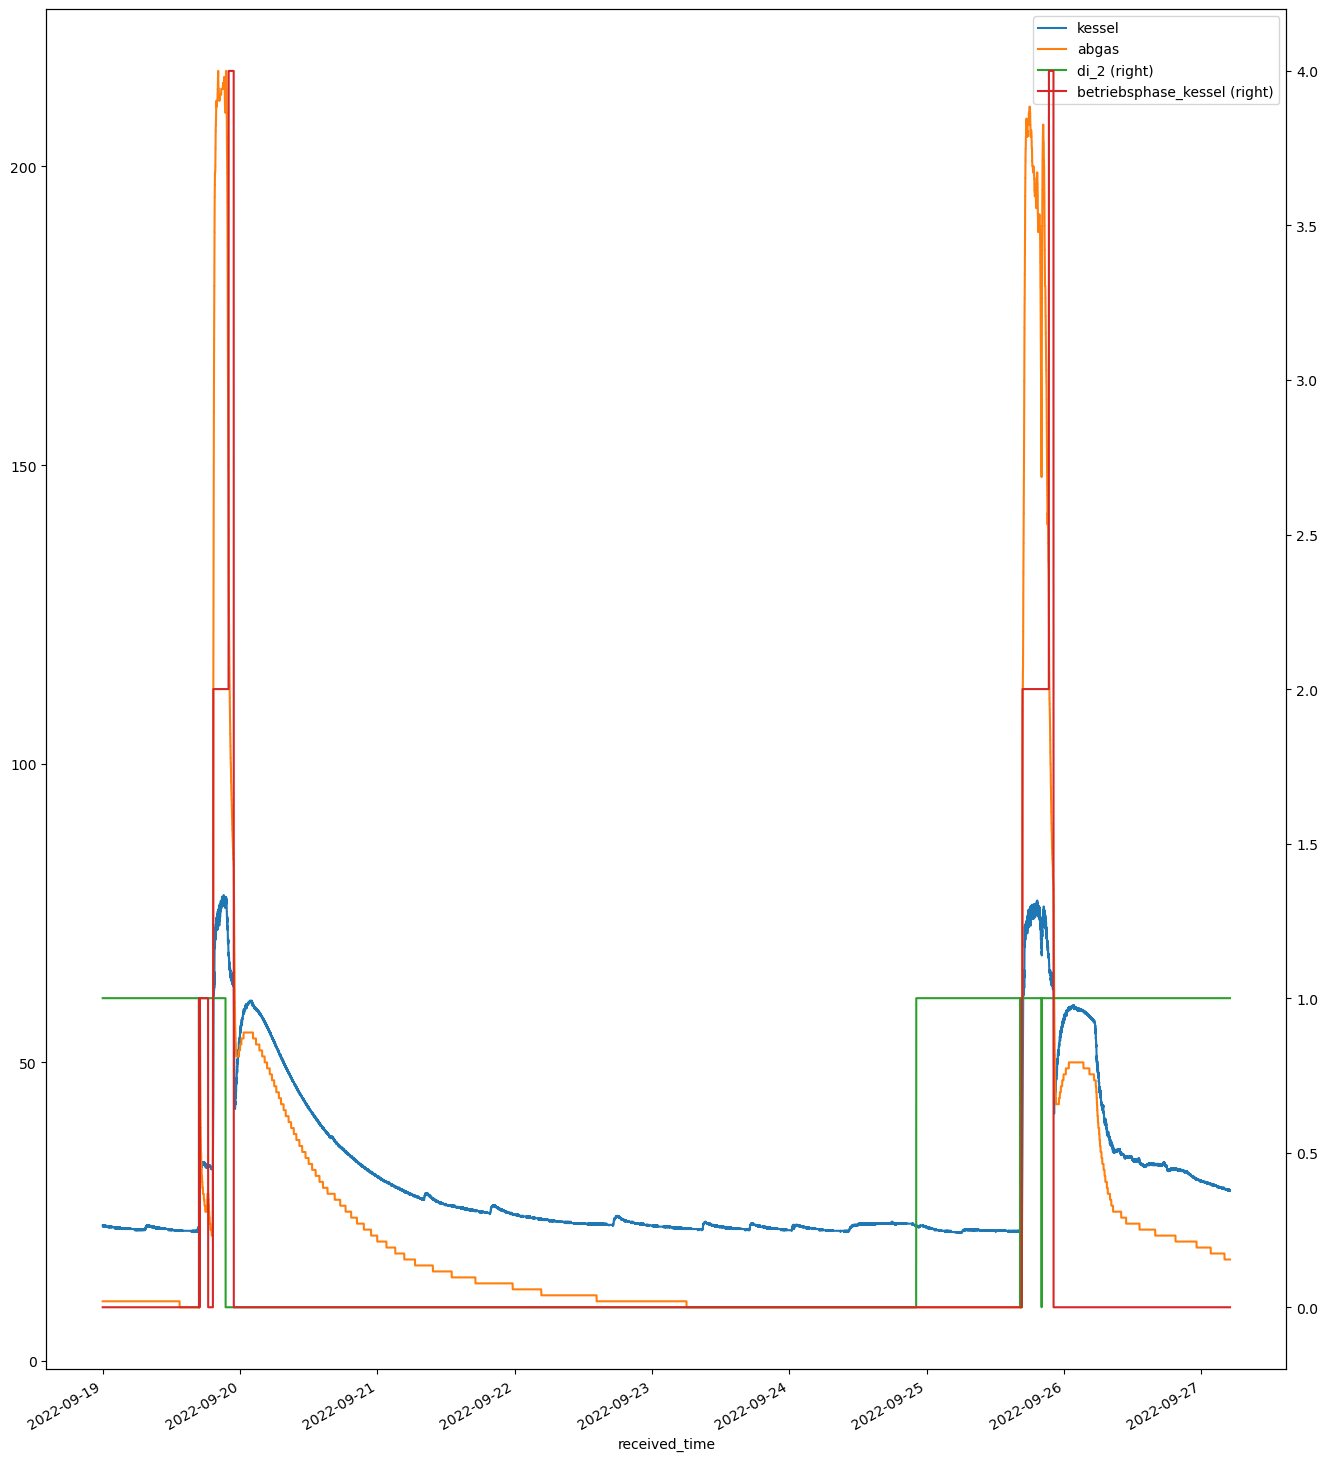

In [71]:
# lol someone forgot to close the lid fully for 5 days
high_res.betriebsphase_kessel = high_res.betriebsphase_kessel.astype(int)
high_res[(high_res.index > '2022-09-19T00:00:00') & (high_res.index < '2022-09-27T05:00:00')].plot(y=["kessel", "abgas", "di_2", "betriebsphase_kessel"], secondary_y=["di_2", "betriebsphase_kessel"], include_bool=True)
high_res.betriebsphase_kessel = high_res.betriebsphase_kessel.astype('category')

Confirmation that only DI_2 changes and not the phase when opening the lid

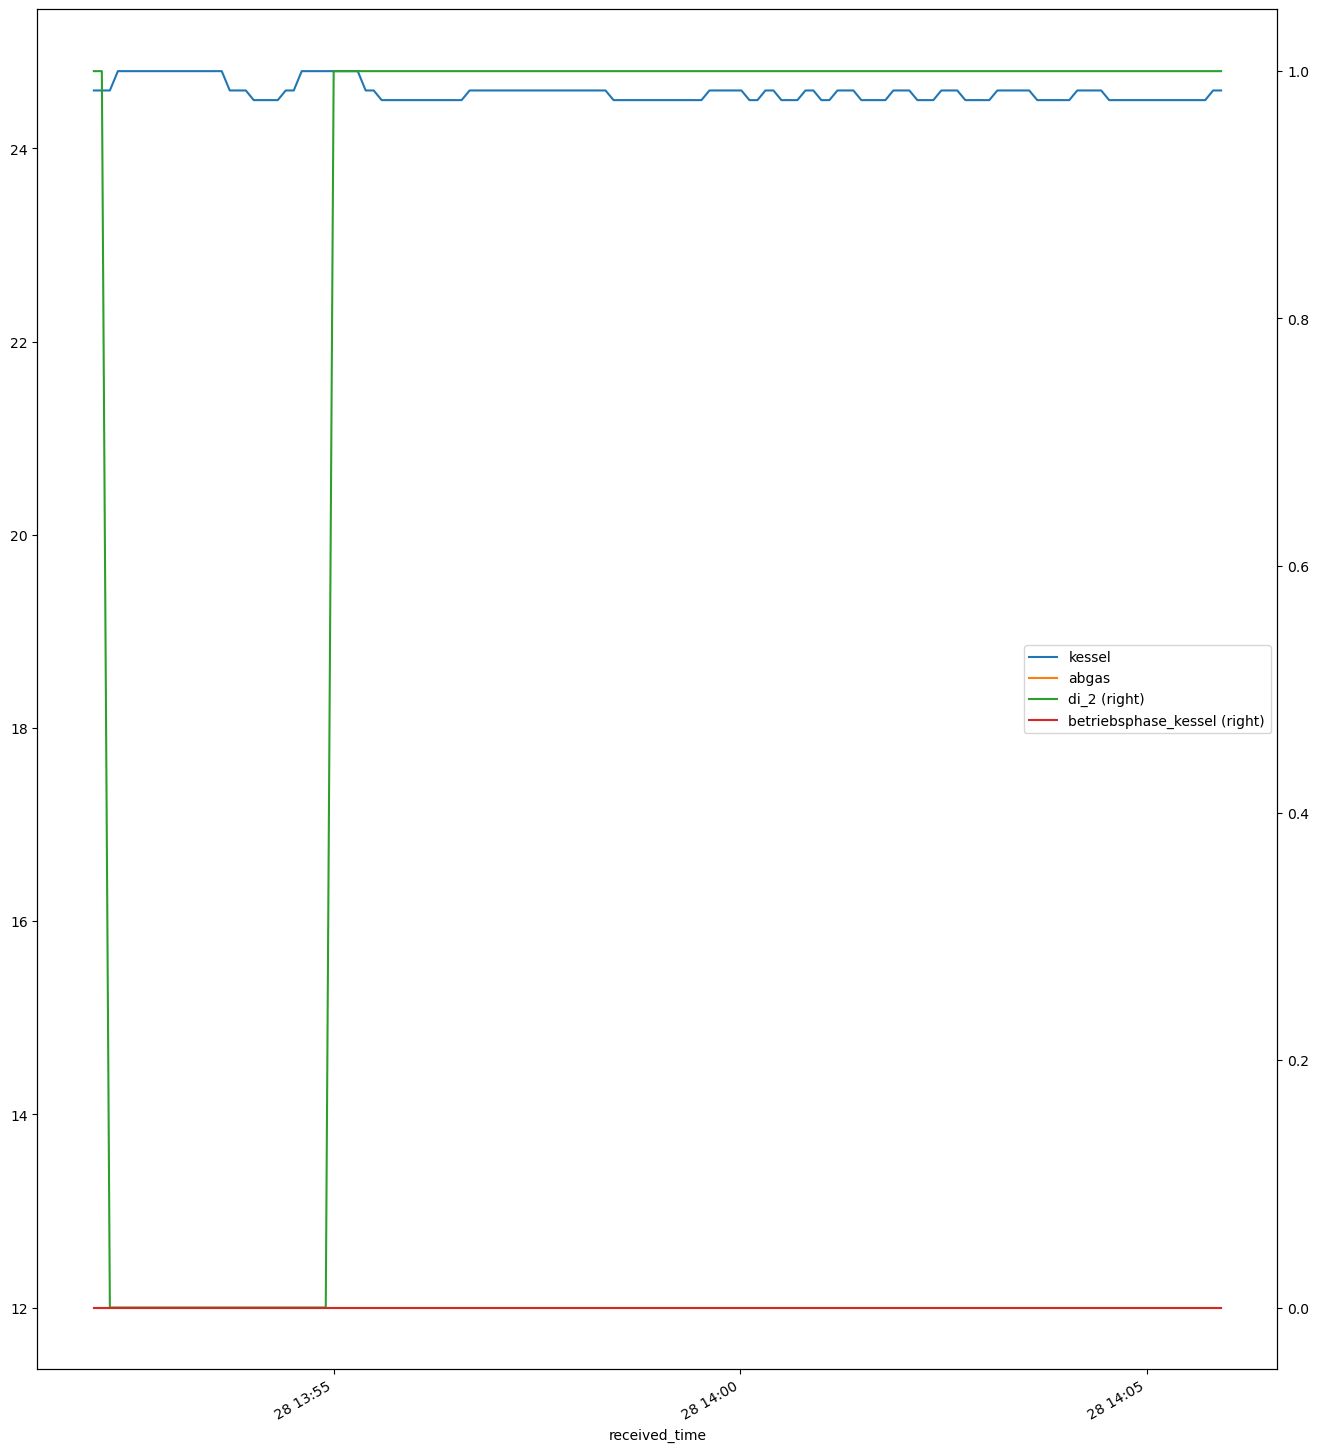

In [76]:
high_res.betriebsphase_kessel = high_res.betriebsphase_kessel.astype(int)
high_res[(high_res.index > '2022-09-28T13:52:00') & (high_res.index < '2022-09-28T14:06:00')].plot(y=["kessel", "abgas", "di_2", "betriebsphase_kessel"], secondary_y=["di_2", "betriebsphase_kessel"], include_bool=True)
high_res.betriebsphase_kessel = high_res.betriebsphase_kessel.astype('category')

Checking which of the temperatures match the real world displays (more than one sensor possible) on the buffers and boiler

More todo here. I know what those values kind of are but not exactly. Maybe talk to an expert once again.

<AxesSubplot:xlabel='received_time'>

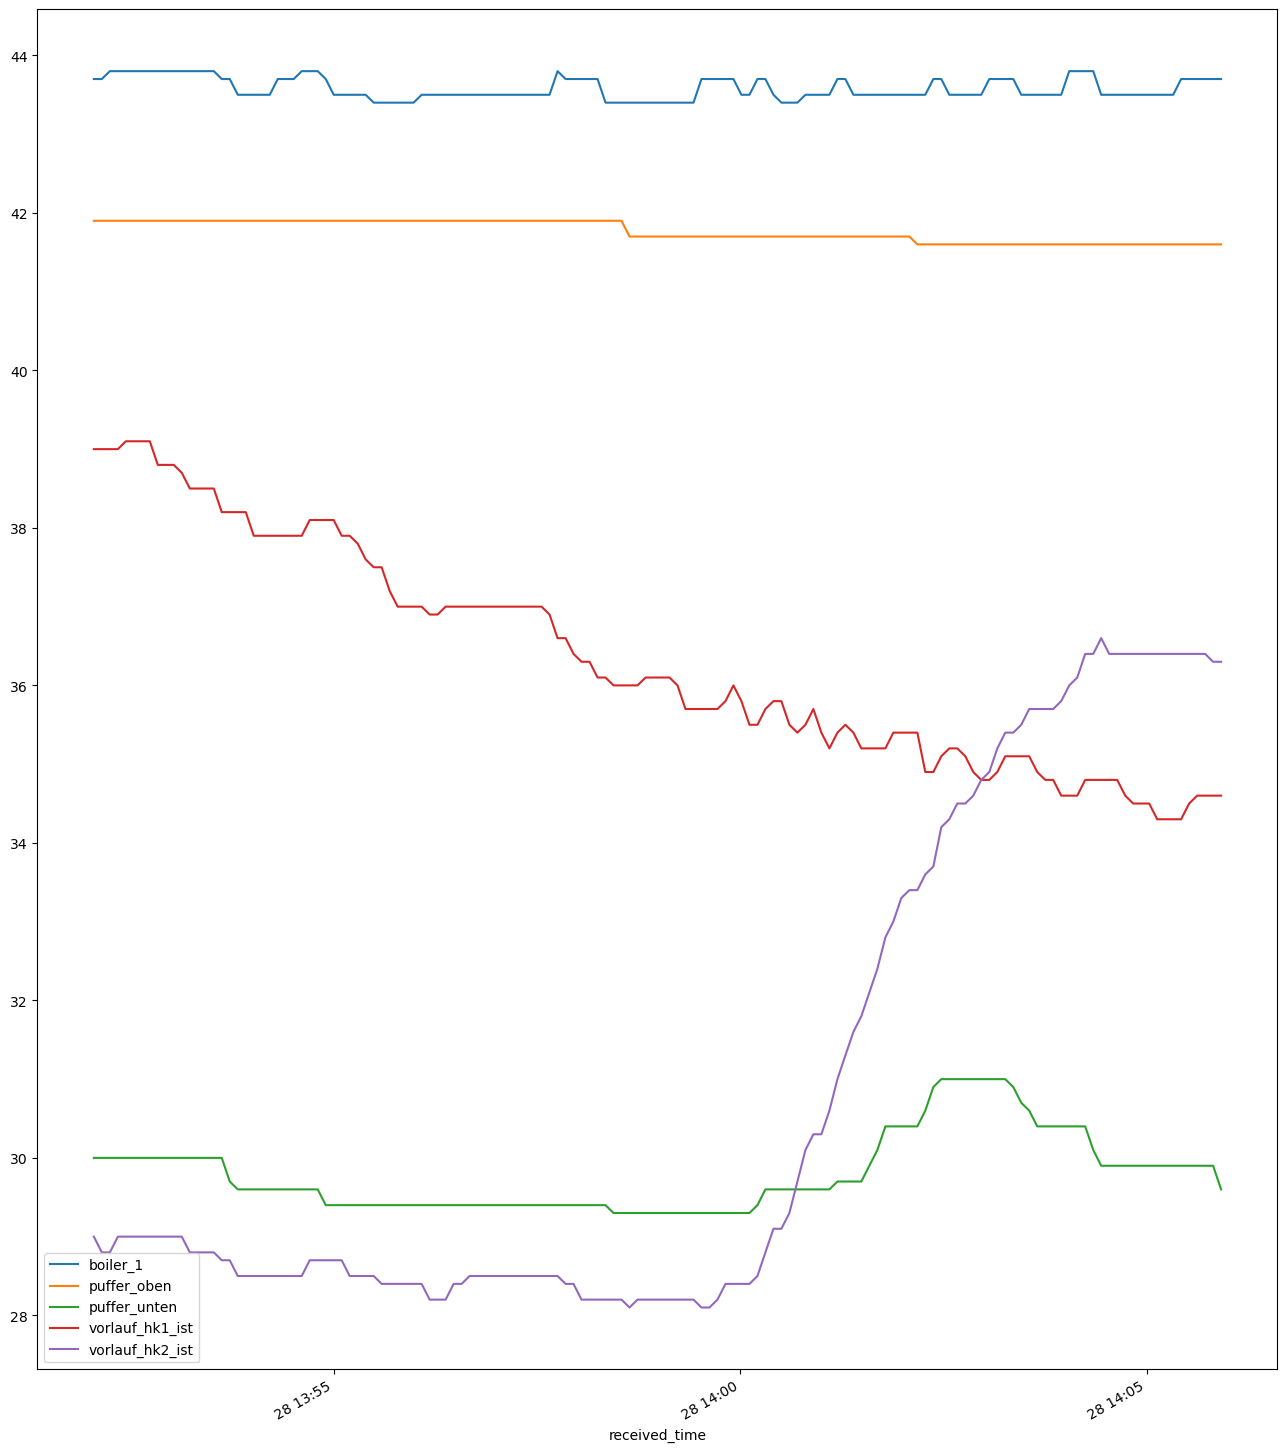

In [81]:
high_res[(high_res.index > '2022-09-28T13:52:00') & (high_res.index < '2022-09-28T14:06:00')].plot(y=["boiler_1", "puffer_oben", "puffer_unten", "vorlauf_hk1_ist", "vorlauf_hk2_ist"])

### Before resampling

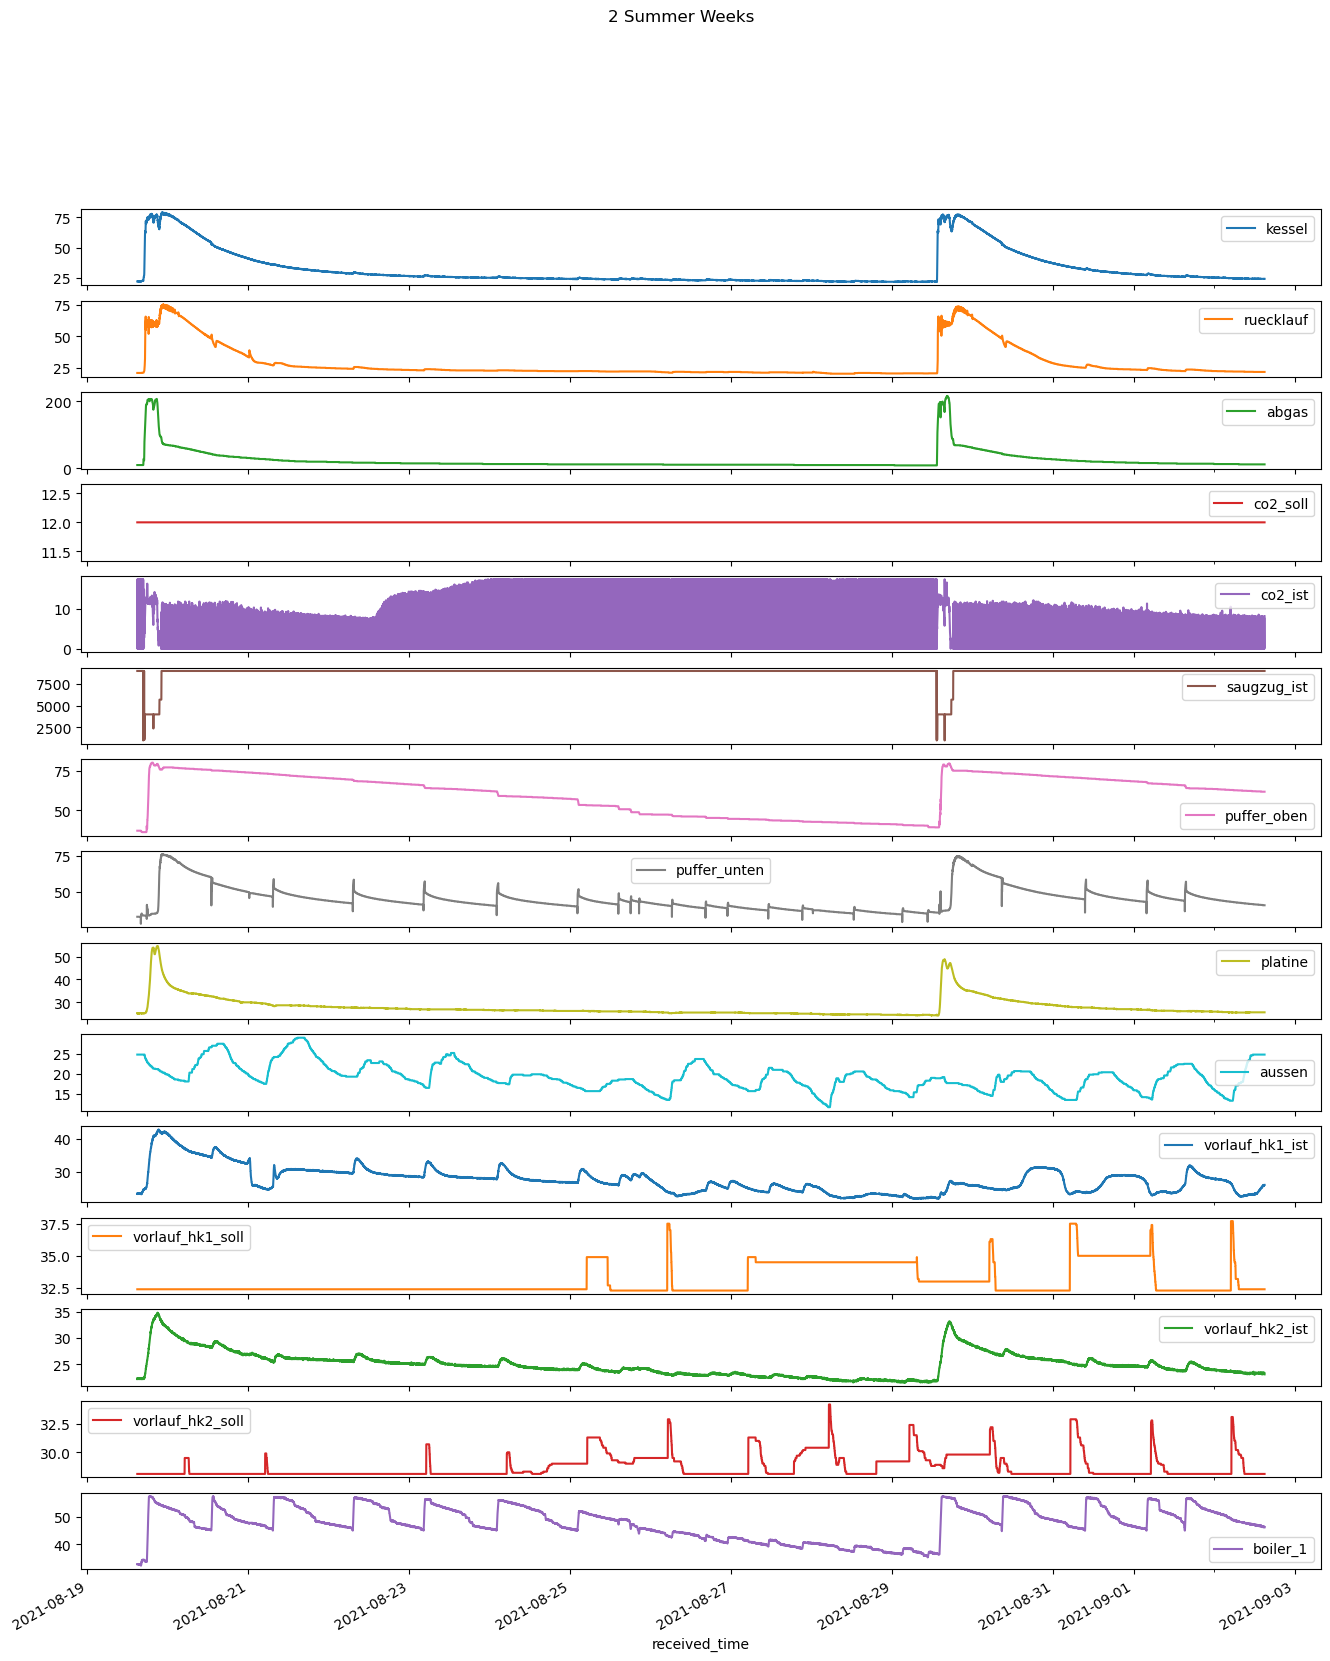

In [44]:
_ = df[two_summer_weeks(df)].plot(subplots=True, title="2 Summer Weeks")

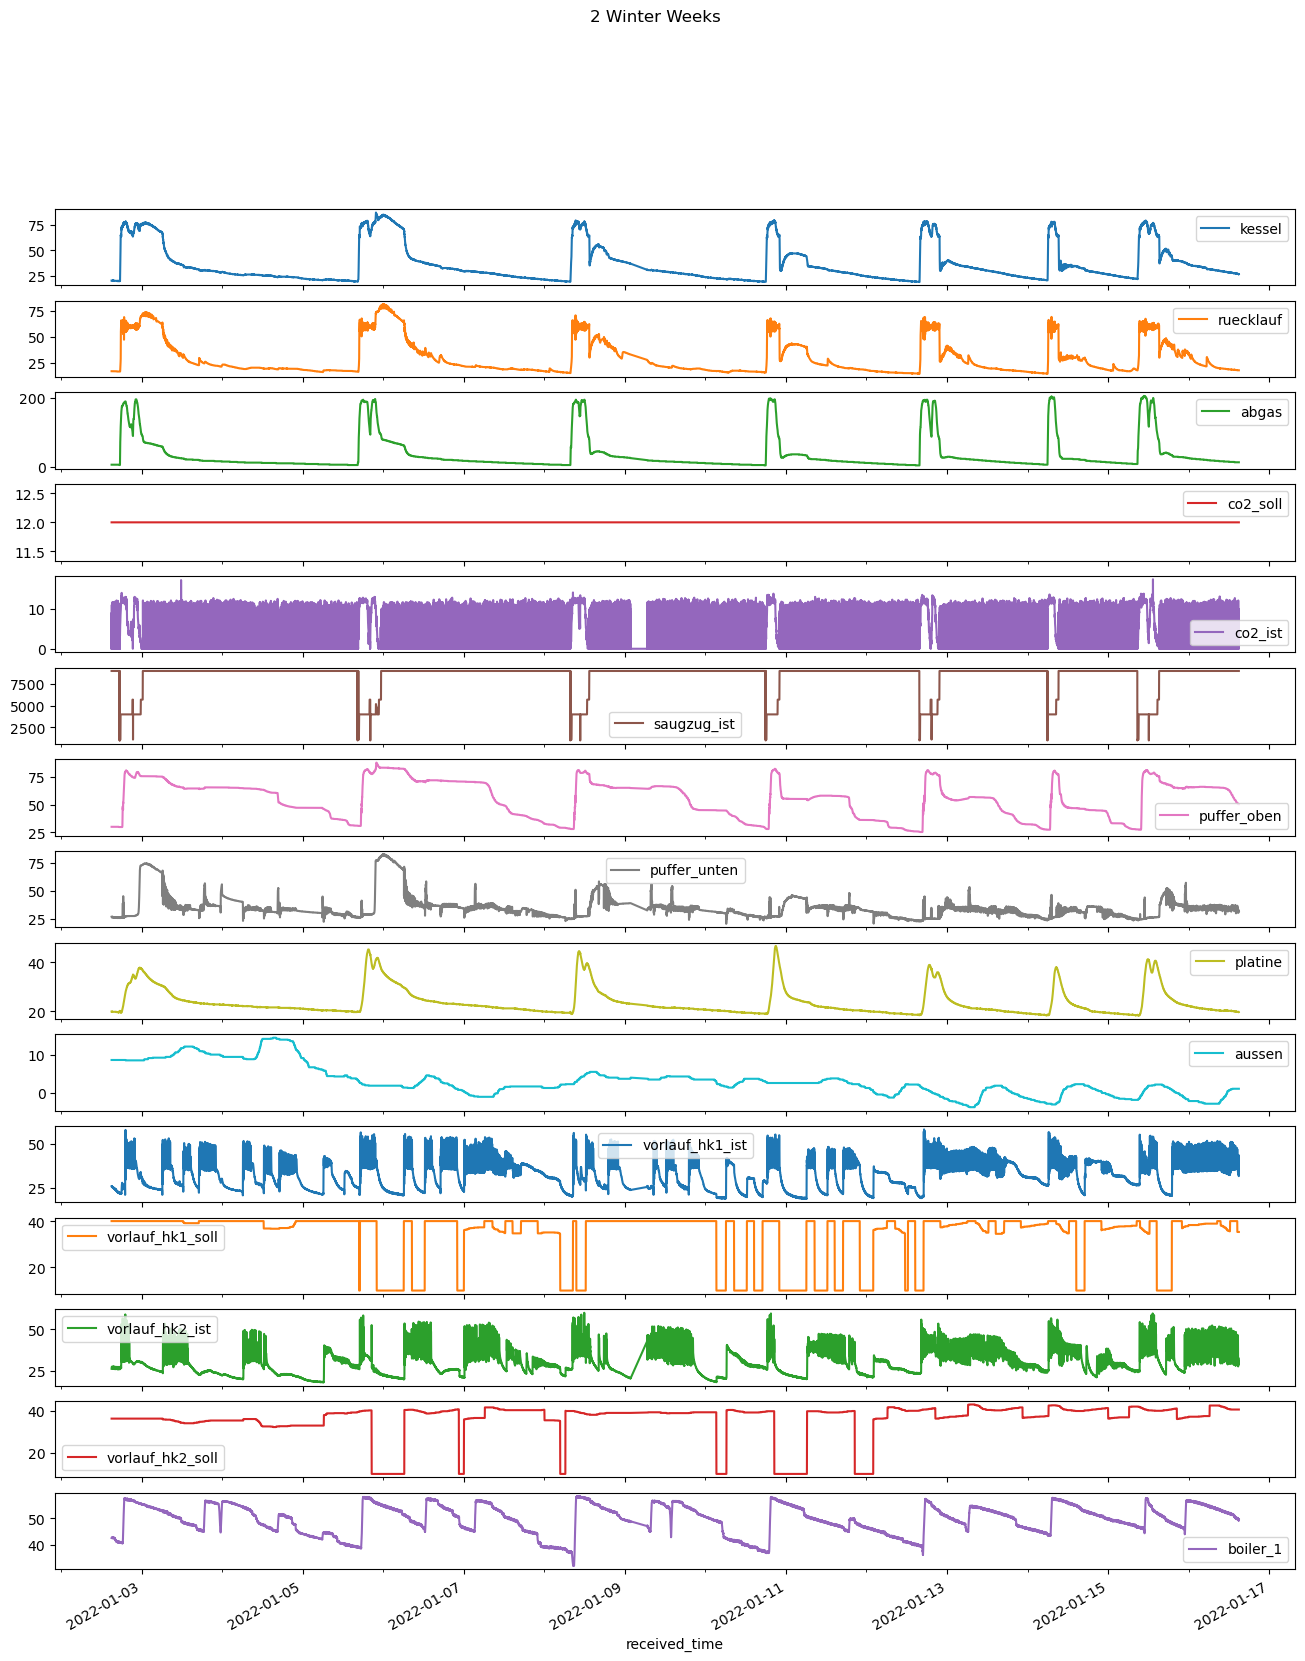

In [45]:
_ = df[two_winter_weeks(df)].plot(subplots=True, title="2 Winter Weeks")

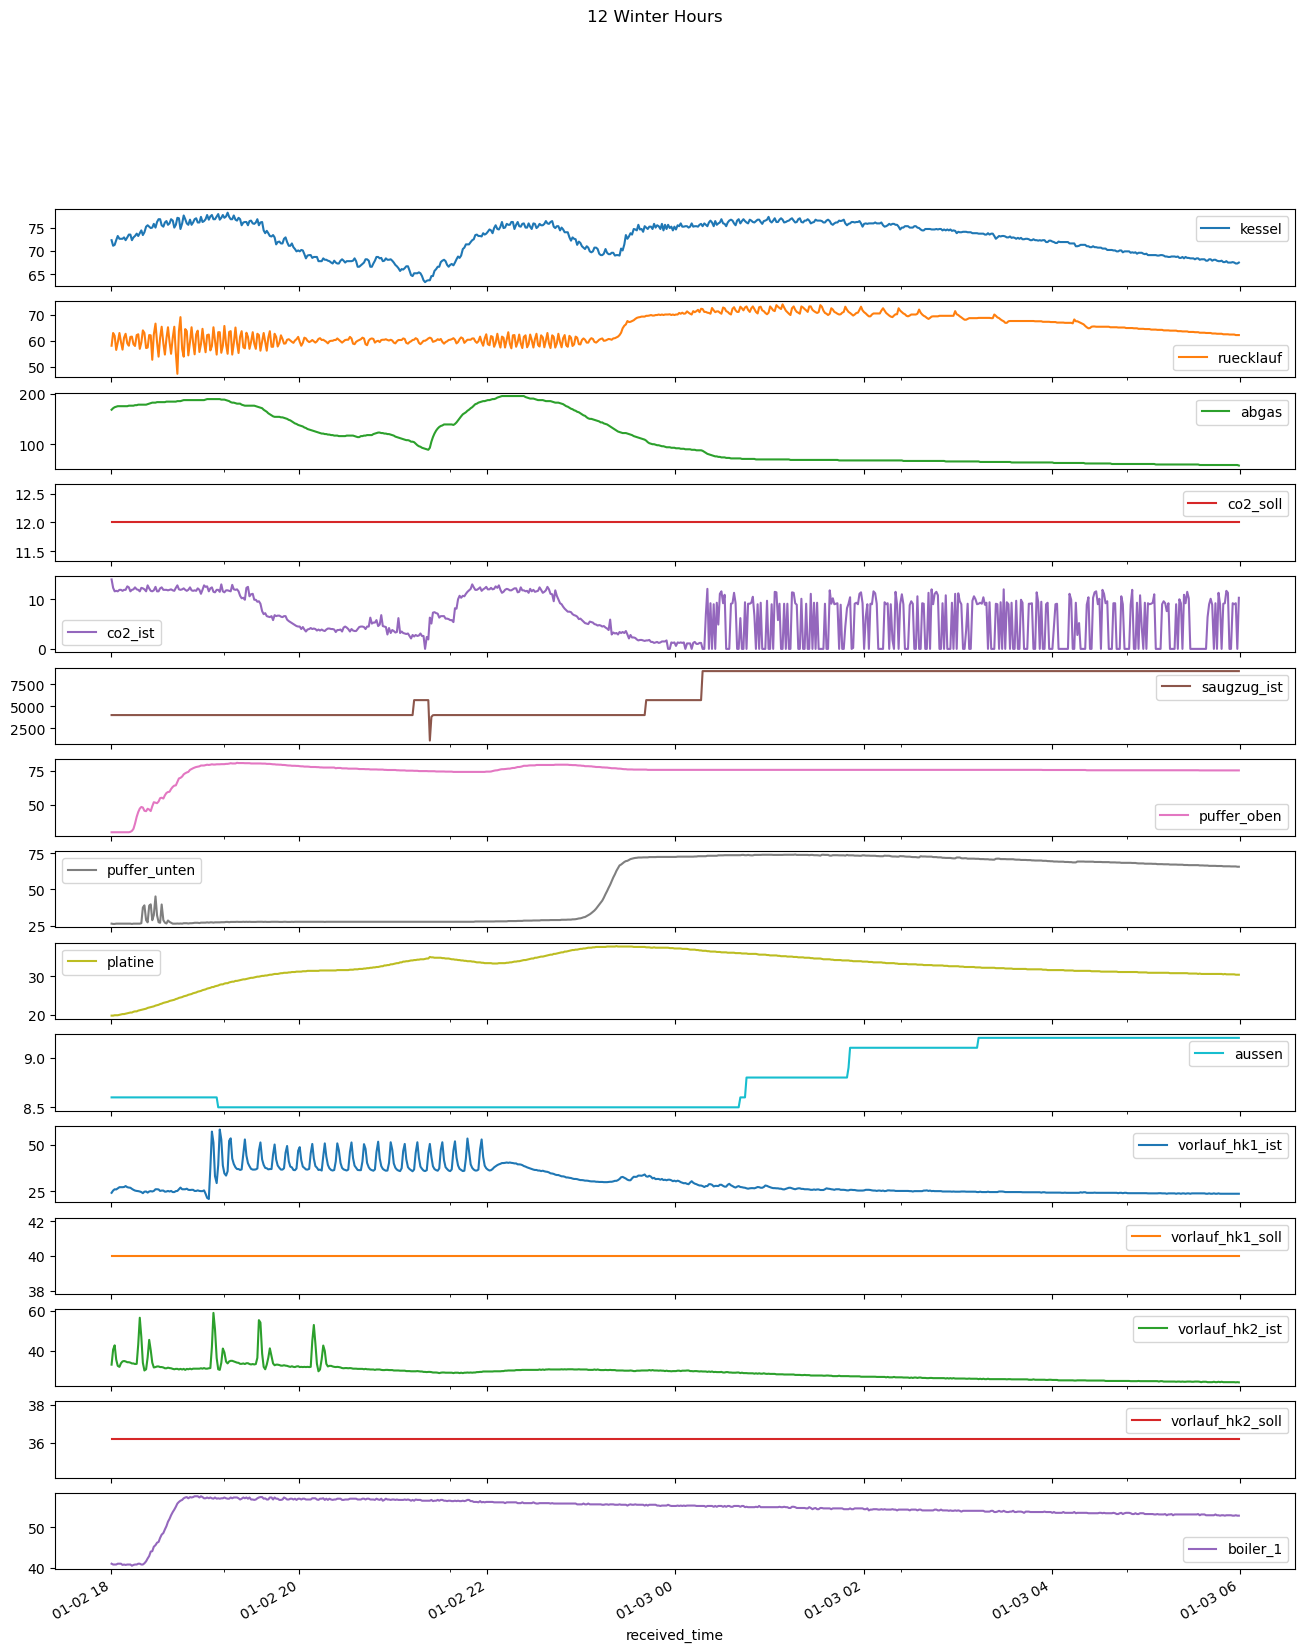

In [46]:
_ = df[twelve_winter_hours(df)].plot(subplots=True, title="12 Winter Hours")

I'm not sure I fully understand the implications of resampling. I want to smooth out the curve and reduce the noise as well as the number of data points. Using a rolling average would incorporate future values in the mean which I understand is bad. Still I'm not sure if what I'm doing here is correct.

Why exactly am I trying to reduce the number of data points? I think it's a good idea to remove noise (by smoothing out with some sort of rolling average (maybe only incorporating past values)) but that's only for certain columns that are noisy like some vorlauf ones. For categorical and boolean data it makes no sense to smooth or resample with some average, maybe with a mode but even then I don't see why reducing the number is even necessary. For inconsistent features like the CO2 which seems to jump and be noisy in unpredictable patterns, you might need another thing because smoothing would probably be very misleading. There might be an error in the sensor and as long as there's no fire, the CO2 should be stable instead of jumping around.

In [47]:
resampled = df.resample('3min').mean()
resampled

kessel  ruecklauf  abgas  co2_soll    co2_ist  \
received_time                                                           
2020-06-09 16:42:00  26.900000  22.400000   13.0      12.0   0.000000   
2020-06-09 16:45:00  26.900000  22.433333   13.0      12.0   4.800000   
2020-06-09 16:48:00  26.933333  22.500000   13.0      12.0   3.233333   
2020-06-09 16:51:00  26.900000  22.400000   13.0      12.0   2.833333   
2020-06-09 16:54:00  26.833333  22.433333   13.0      12.0   2.933333   
...                        ...        ...    ...       ...        ...   
2022-09-02 07:06:00  23.100000  21.800000   11.0      12.0   7.200000   
2022-09-02 07:09:00  23.100000  21.800000   11.0      12.0   2.633333   
2022-09-02 07:12:00  23.100000  21.800000   11.0      12.0   6.666667   
2022-09-02 07:15:00  23.100000  21.800000   11.0      12.0   7.266667   
2022-09-02 07:18:00  23.100000  21.800000   11.0      12.0  17.400000   

                     saugzug_ist  puffer_oben  puffer_unten    platine  \
received_time                                                            
2020-06-09 16:42:00       9000.0         63.3     42.900000  24.900000   
2020-06-09 16:45:00       9000.0         63.3     42.866667  24.900000   
2020-06-09 16:48:00       9000.0         63.3     42.900000  24.900000   
2020-06-09 16:51:00       9000.0         63.3     42.733333  24.900000   
2020-06-09 16:54:00       9000.0         63.3     42.466667  24.900000   
...                          ...          ...           ...        ...   
2022-09-02 07:06:00       9000.0         41.4     36.100000  25.733333   
2022-09-02 07:09:00       9000.0         41.4     36.100000  25.700000   
2022-09-02 07:12:00       9000.0         41.4     33.966667  25.700000   
2022-09-02 07:15:00       9000.0         41.4     35.766667  25.700000   
2022-09-02 07:18:00       9000.0         41.4     37.300000  25.800000   

                     aussen  ...  a_ea_0  a_ea_1  a_ea_2  a_ea_3  a_ea_4  \
received_time                ...                                           
2020-06-09 16:42:00    14.2  ...     1.0     1.0     1.0     0.0     0.0   
2020-06-09 16:45:00    14.2  ...     1.0     1.0     1.0     0.0     0.0   
2020-06-09 16:48:00    14.2  ...     1.0     1.0     1.0     0.0     0.0   
2020-06-09 16:51:00    14.2  ...     1.0     1.0     1.0     0.0     0.0   
2020-06-09 16:54:00    14.2  ...     1.0     1.0     1.0     0.0     0.0   
...                     ...  ...     ...     ...     ...     ...     ...   
2022-09-02 07:06:00    18.7  ...     1.0     1.0     1.0     0.0     0.0   
2022-09-02 07:09:00    18.7  ...     1.0     1.0     1.0     0.0     0.0   
2022-09-02 07:12:00    18.7  ...     1.0     1.0     1.0     0.0     0.0   
2022-09-02 07:15:00    18.7  ...     1.0     1.0     1.0     0.0     0.0   
2022-09-02 07:18:00    18.7  ...     1.0     1.0     1.0     0.0     0.0   

                     a_phase_0  a_phase_1  a_phase_2  a_phase_3  a_phase_4  
received_time                                                               
2020-06-09 16:42:00        0.0        0.0        0.0        0.0        0.0  
2020-06-09 16:45:00        0.0        0.0        0.0        0.0        0.0  
2020-06-09 16:48:00        0.0        0.0        0.0        0.0        0.0  
2020-06-09 16:51:00        0.0        0.0        0.0        0.0        0.0  
2020-06-09 16:54:00        0.0        0.0        0.0        0.0        0.0  
...                        ...        ...        ...        ...        ...  
2022-09-02 07:06:00        0.0        0.0        0.0        0.0        0.0  
2022-09-02 07:09:00        0.0        0.0        0.0        0.0        0.0  
2022-09-02 07:12:00        0.0        0.0        0.0        0.0        0.0  
2022-09-02 07:15:00        0.0        0.0        0.0        0.0        0.0  
2022-09-02 07:18:00        0.0        0.0        0.0        0.0        0.0  

[391013 rows x 33 columns]

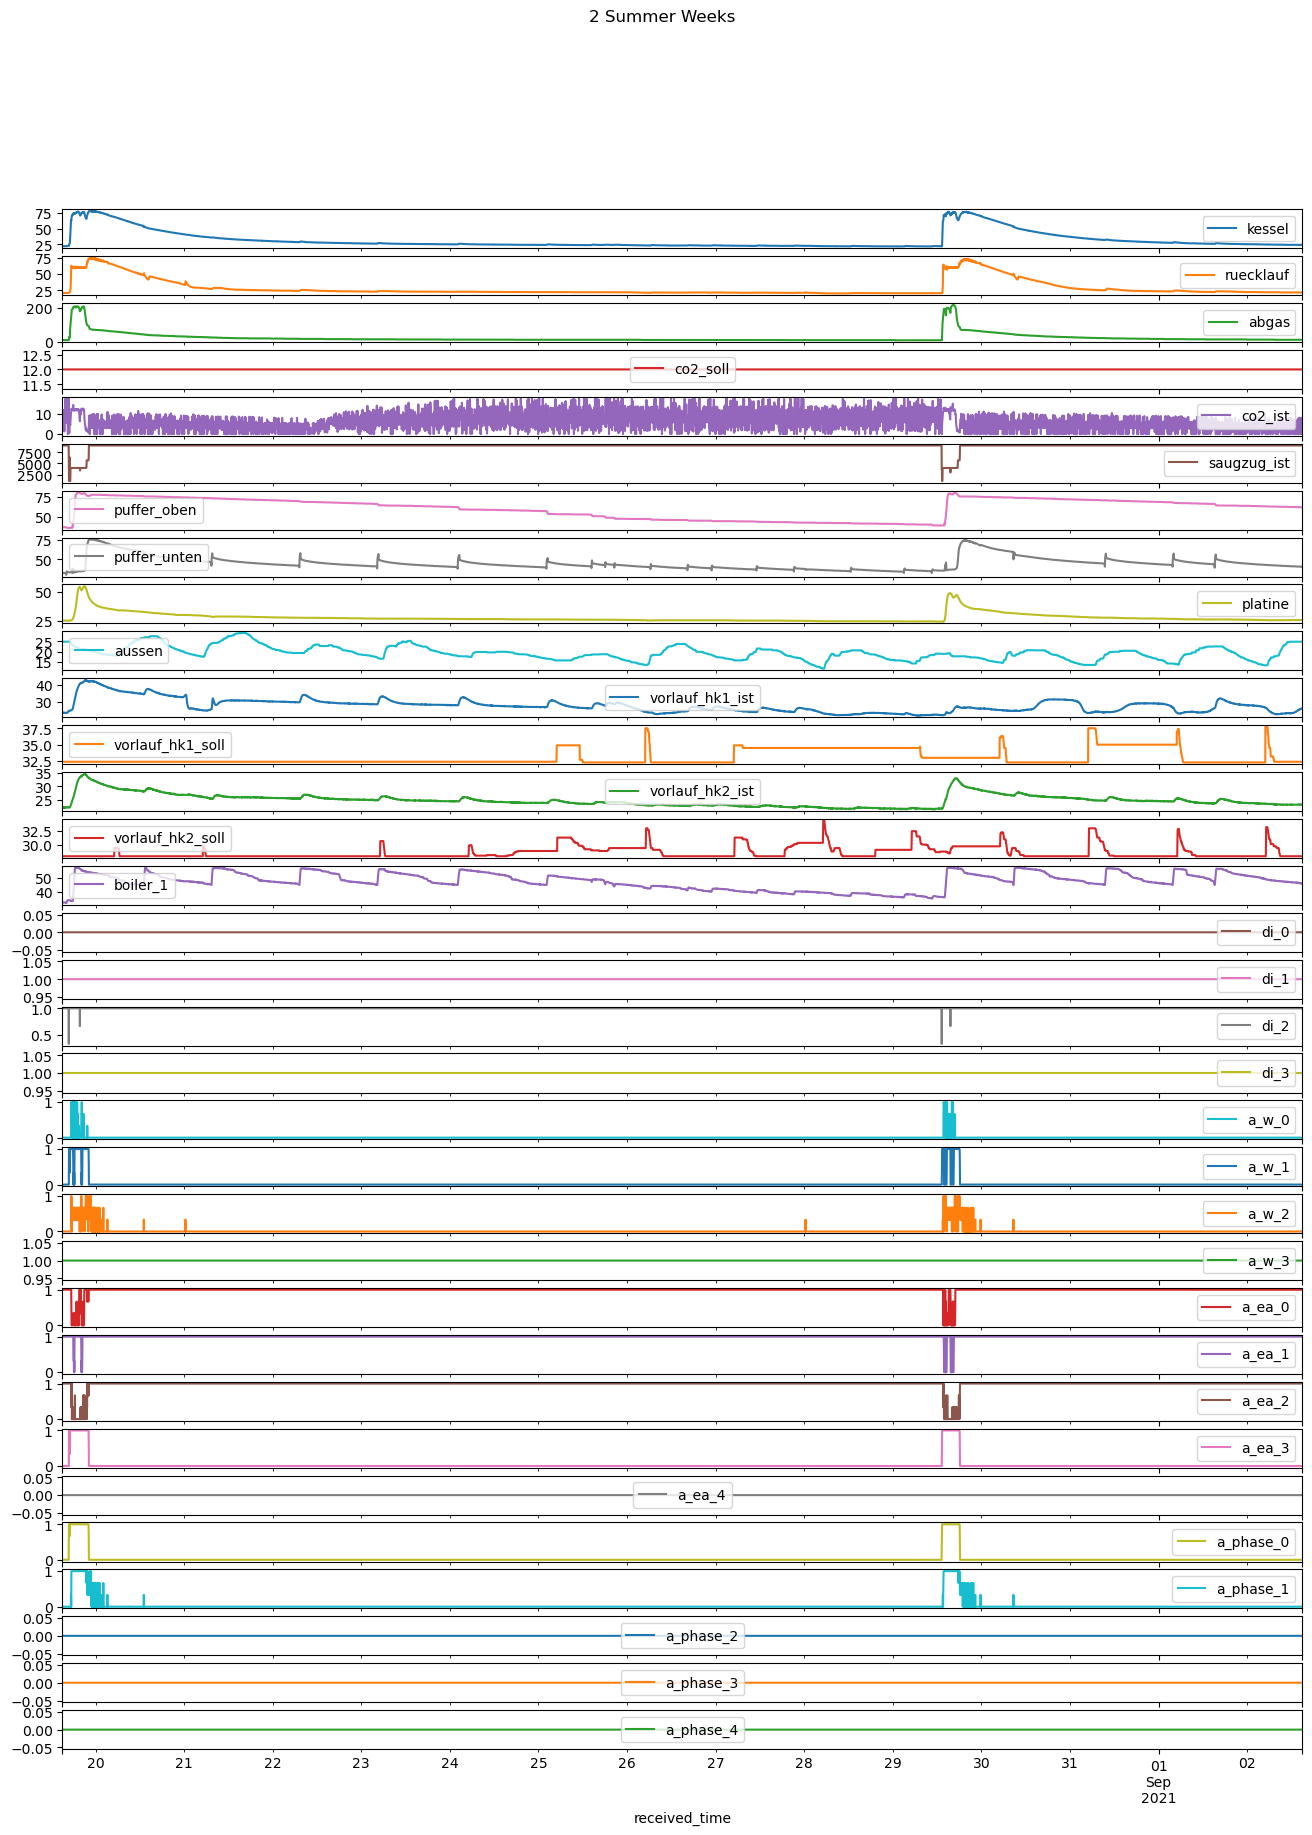

In [48]:
_ = resampled[two_summer_weeks(resampled)].plot(subplots=True, title="2 Summer Weeks")

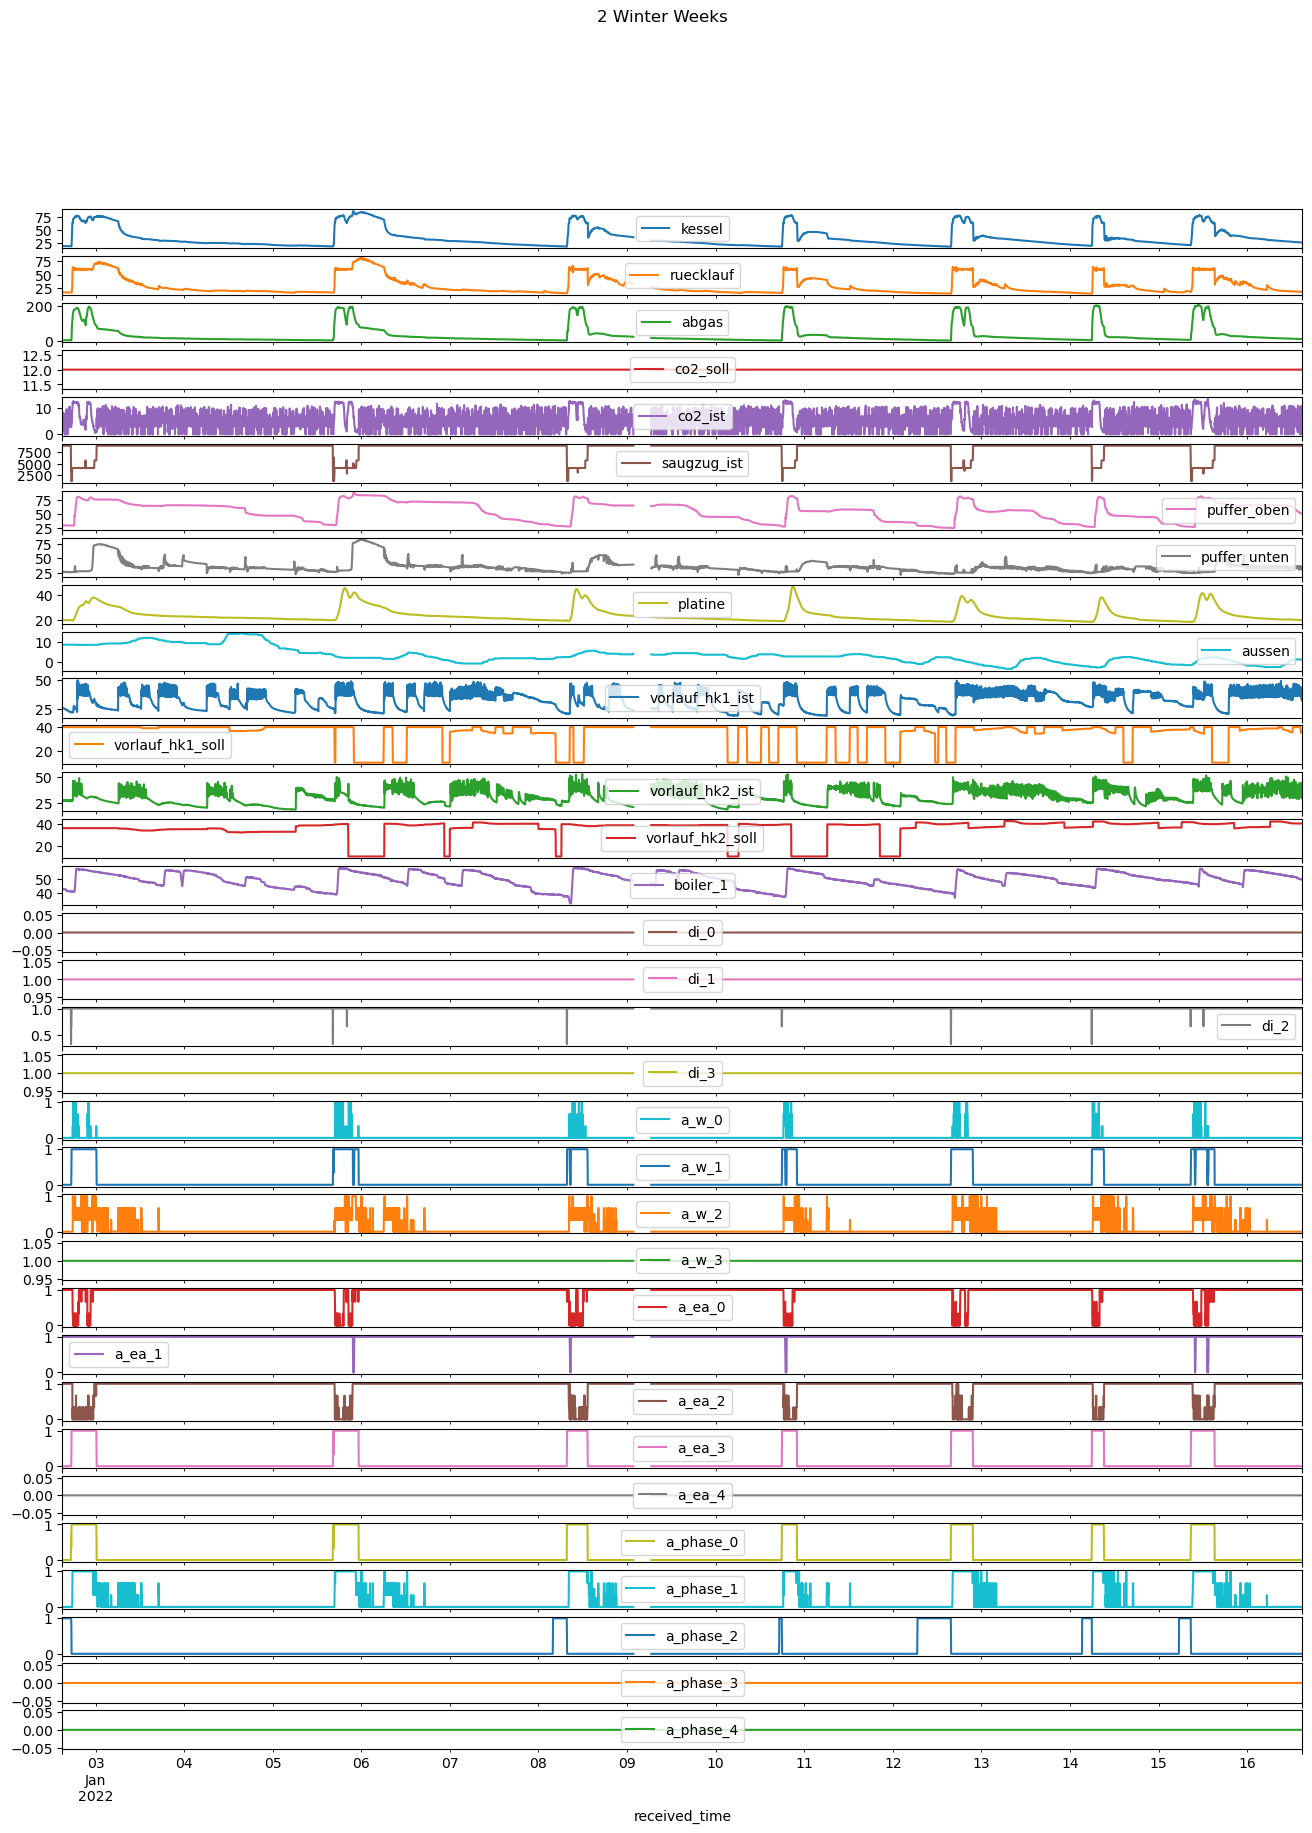

In [49]:
_ = resampled[two_winter_weeks(resampled)].plot(subplots=True, title="2 Winter Weeks")

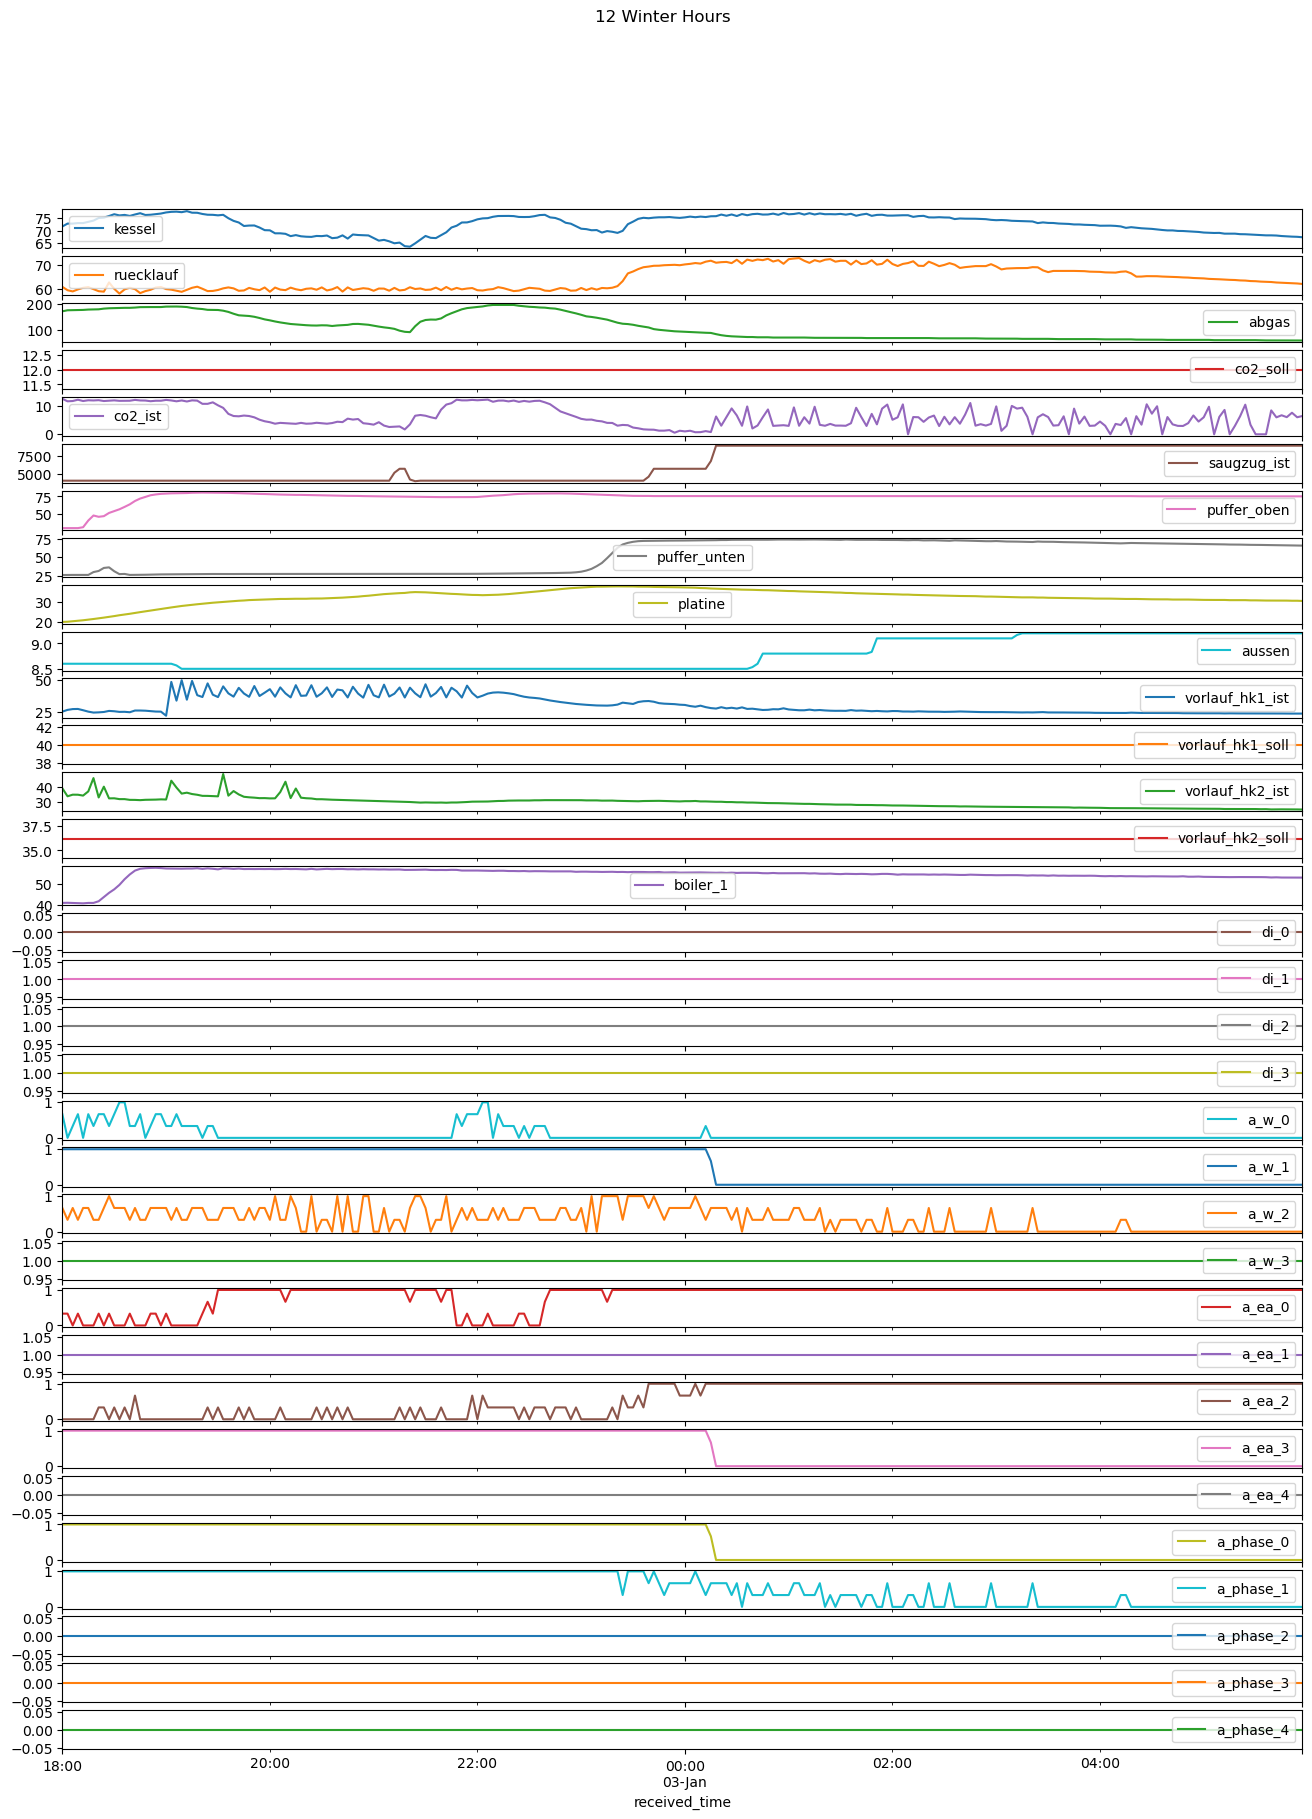

In [50]:
_ = resampled[twelve_winter_hours(resampled)].plot(subplots=True, title="12 Winter Hours")

The summary of the data frame looks plausible :)

In [51]:
resampled.describe().transpose()

count         mean          std          min  \
kessel            389745.0    30.606628    13.769996    15.766667   
ruecklauf         389745.0    26.294762    12.124216    12.400000   
abgas             389745.0    25.257273    39.453346     0.000000   
co2_soll          389745.0    12.000000     0.000000    12.000000   
co2_ist           389745.0     5.634204     3.549773     0.000000   
saugzug_ist       389745.0  8689.166533  1219.665855  1000.000000   
puffer_oben       389745.0    50.634820    14.908355    22.400000   
puffer_unten      389745.0    36.289670     9.539745    17.866667   
platine           389745.0    25.244146     4.810650    17.500000   
aussen            389745.0    13.765533     8.595203    -5.400000   
vorlauf_hk1_ist   389745.0    28.587991     6.106868    16.366667   
vorlauf_hk1_soll  389745.0    34.518694     6.995054    10.000000   
vorlauf_hk2_ist   389745.0    26.980779     5.959569    15.433333   
vorlauf_hk2_soll  389745.0    31.935901     5.919942    10.000000   
boiler_1          389745.0    45.442451     8.408559    16.866667   
di_0              389745.0     0.000000     0.000000     0.000000   
di_1              389745.0     1.000000     0.000000     1.000000   
di_2              389745.0     0.999215     0.023034     0.000000   
di_3              389745.0     1.000000     0.000000     1.000000   
a_w_0             389745.0     0.015485     0.108029     0.000000   
a_w_1             389745.0     0.052551     0.221630     0.000000   
a_w_2             389745.0     0.044788     0.163796     0.000000   
a_w_3             389745.0     1.000000     0.000000     1.000000   
a_ea_0            389745.0     0.976332     0.141292     0.000000   
a_ea_1            389745.0     0.990853     0.092279     0.000000   
a_ea_2            389745.0     0.954983     0.195815     0.000000   
a_ea_3            389745.0     0.062108     0.240930     0.000000   
a_ea_4            389745.0     0.000000     0.000000     0.000000   
a_phase_0         389745.0     0.062720     0.241797     0.000000   
a_phase_1         389745.0     0.072652     0.245095     0.000000   
a_phase_2         389745.0     0.085601     0.279520     0.000000   
a_phase_3         389745.0     0.000000     0.000000     0.000000   
a_phase_4         389745.0     0.000015     0.003419     0.000000   

                          25%          50%          75%          max  
kessel              22.800000    25.400000    31.500000    88.866667  
ruecklauf           19.800000    22.100000    25.800000    85.533333  
abgas               10.000000    13.000000    20.000000   244.666667  
co2_soll            12.000000    12.000000    12.000000    12.000000  
co2_ist              3.000000     5.800000     7.433333    17.500000  
saugzug_ist       9000.000000  9000.000000  9000.000000  9000.000000  
puffer_oben         39.600000    49.500000    62.400000    89.300000  
puffer_unten        29.266667    34.733333    42.300000    86.300000  
platine             22.100000    24.600000    26.800000    59.000000  
aussen               6.400000    13.600000    20.600000    35.800000  
vorlauf_hk1_ist     24.200000    27.200000    31.966667    55.733333  
vorlauf_hk1_soll    32.300000    34.900000    40.000000    40.000000  
vorlauf_hk2_ist     22.933333    24.966667    30.175000    53.950000  
vorlauf_hk2_soll    28.100000    31.300000    36.400000    43.600000  
boiler_1            39.700000    47.033333    52.100000    58.466667  
di_0                 0.000000     0.000000     0.000000     0.000000  
di_1                 1.000000     1.000000     1.000000     1.000000  
di_2                 1.000000     1.000000     1.000000     1.000000  
di_3                 1.000000     1.000000     1.000000     1.000000  
a_w_0                0.000000     0.000000     0.000000     1.000000  
a_w_1                0.000000     0.000000     0.000000     1.000000  
a_w_2                0.000000     0.000000     0.000000     1.000000  
a_w_3                1.000000     1.00000

In [52]:
timestamp_s = timestamps.map(pd.Timestamp.timestamp)
timestamp_s

0          1.591721e+09
1          1.591721e+09
2          1.591721e+09
3          1.591721e+09
4          1.591721e+09
               ...     
1168595    1.662103e+09
1168596    1.662103e+09
1168597    1.662103e+09
1168598    1.662103e+09
1168599    1.662103e+09
Name: received_time, Length: 1168600, dtype: float64

TODO Since our resampled data contains NaNs, the rfft doesn't work. Need to fill those in somehow, maybe repetition would be a usable way (e.g. check the size of the gap, look back for a period of the same size as the gap (if possible minimizing the difference between start values), and copying that in)

In [53]:
def frequency_analysis(series, ylim=3000000):
    # fft = tf.signal.rfft(resampled['boiler_1'])
    fft = tf.signal.rfft(series)
    f_per_dataset = np.arange(0, len(fft))

    # n_samples_h = len(resampled['boiler_1'])
    n_samples_h = len(series)
    hours_per_year = 24*365.2524
    years_per_dataset = n_samples_h/(hours_per_year)

    f_per_year = f_per_dataset/years_per_dataset
    plt.step(f_per_year, np.abs(fft))
    plt.xscale('log')
    plt.ylim(0, ylim)
    plt.xlim([0.1, max(plt.xlim())])
    plt.xticks([1, 12, 52.179, 365.2524, 365.2524 * 2, 365.2524 * 4], labels=['1/Year', '1/Month', '1/Week', '1/day', '1/12h', '1/6h'])
    _ = plt.xlabel('Frequency (log scale)')

2022-10-03 21:38:51.968725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 21:38:52.001122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 21:38:52.001291: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 21:38:52.001816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

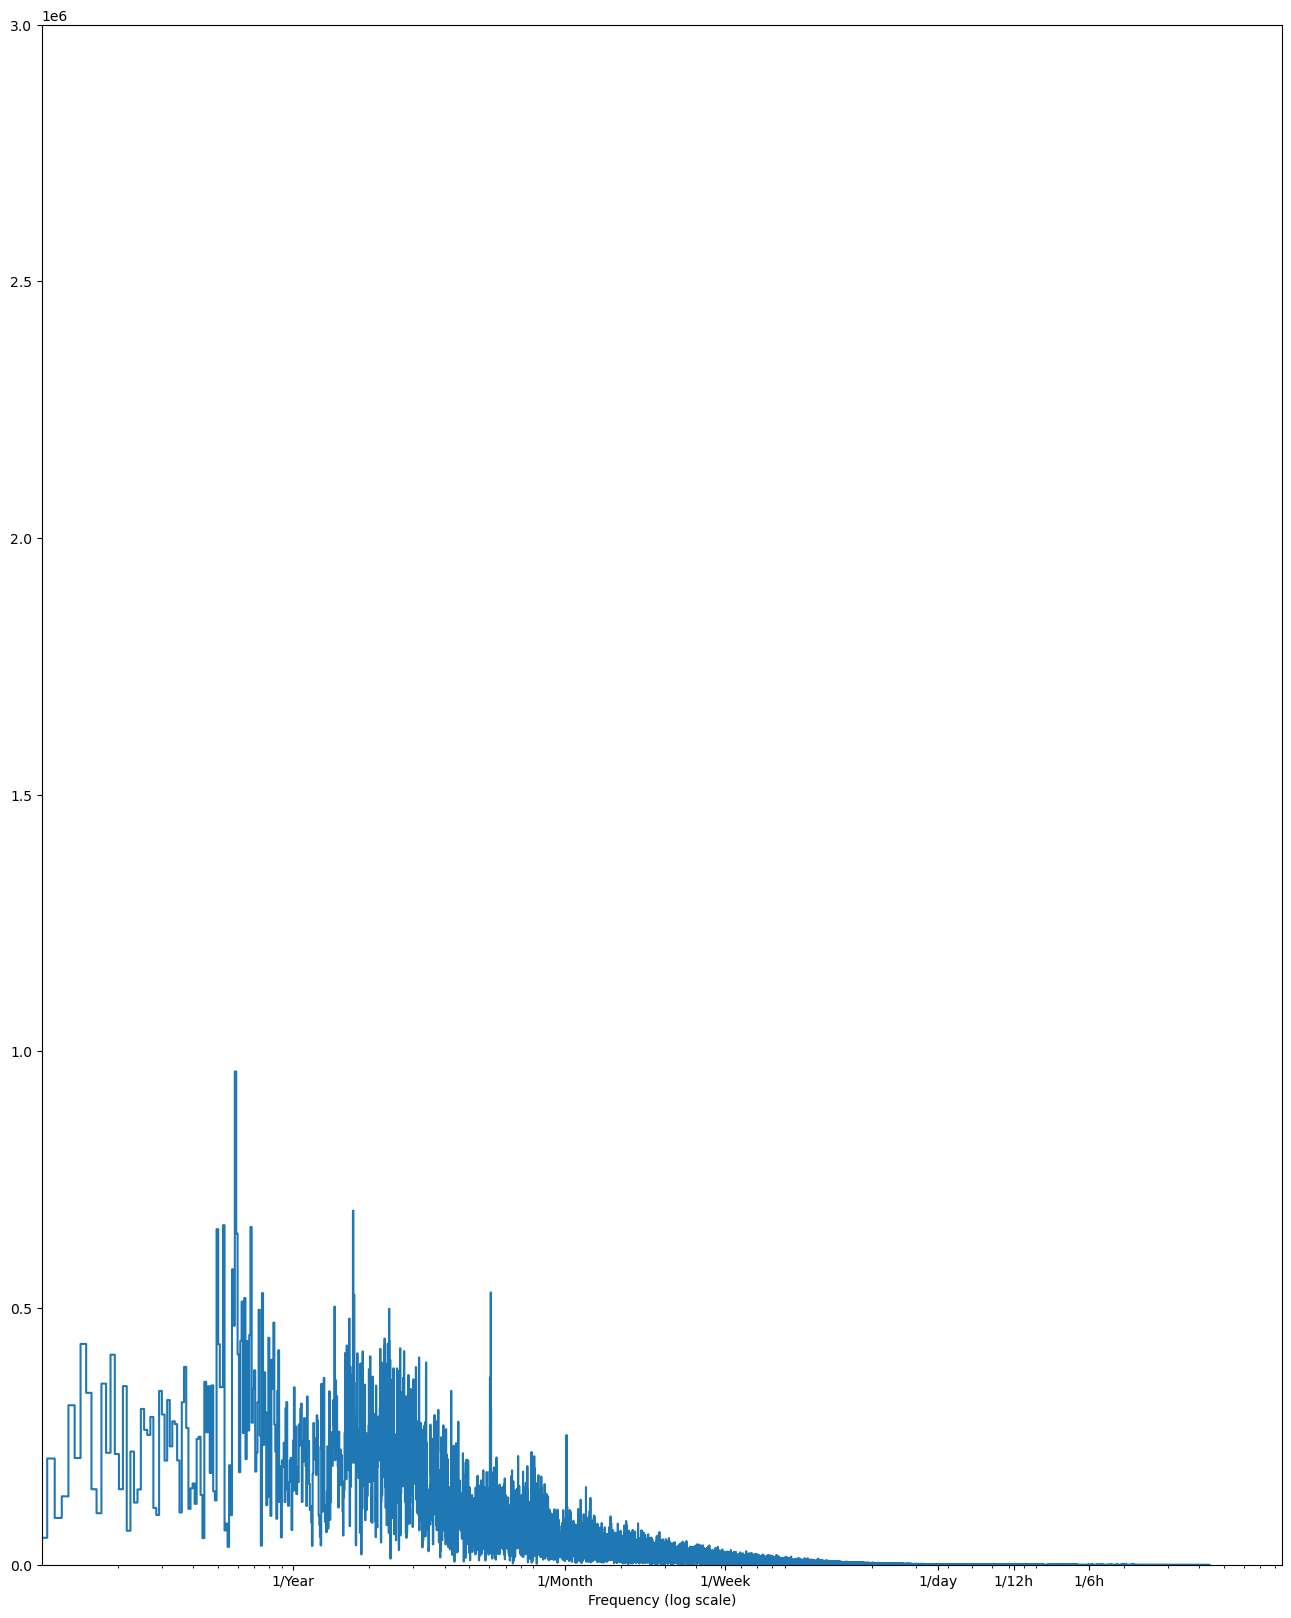

In [54]:
frequency_analysis(df.boiler_1)

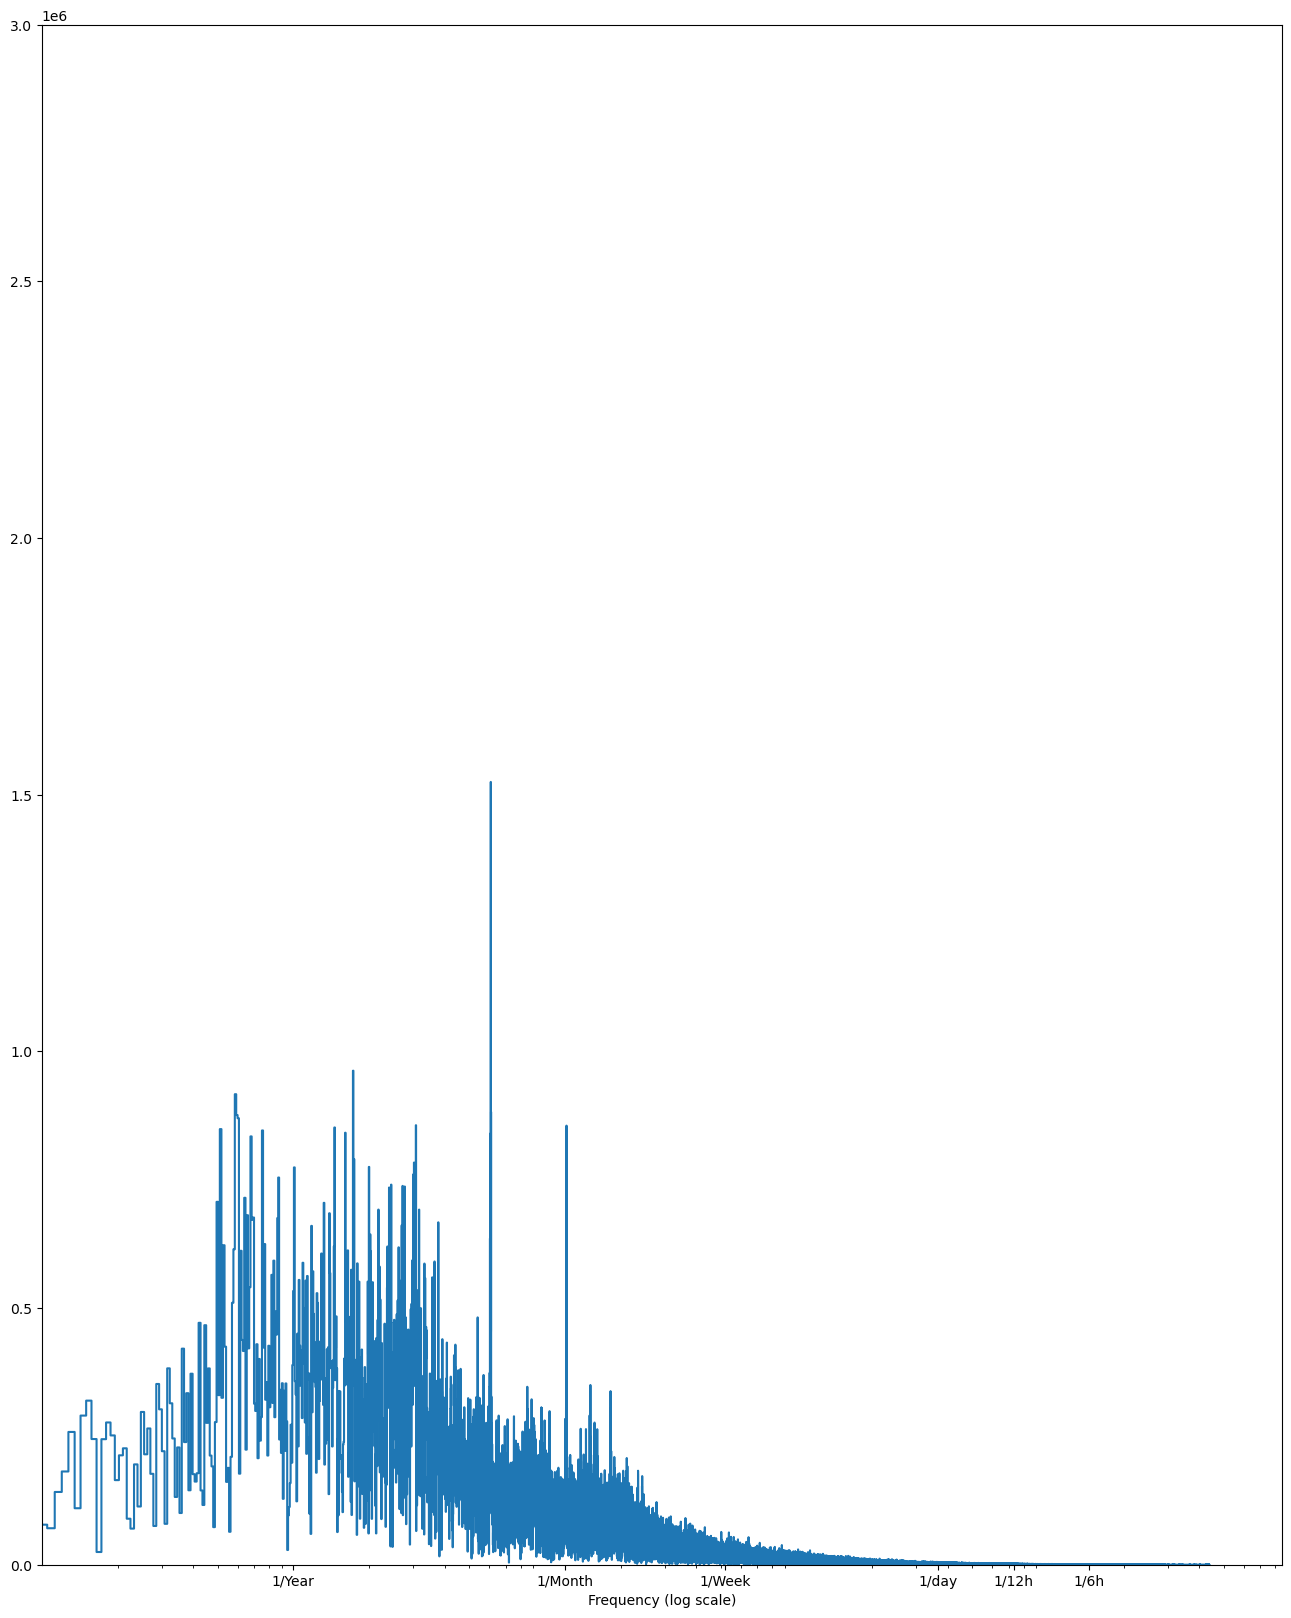

In [55]:
frequency_analysis(df.kessel)

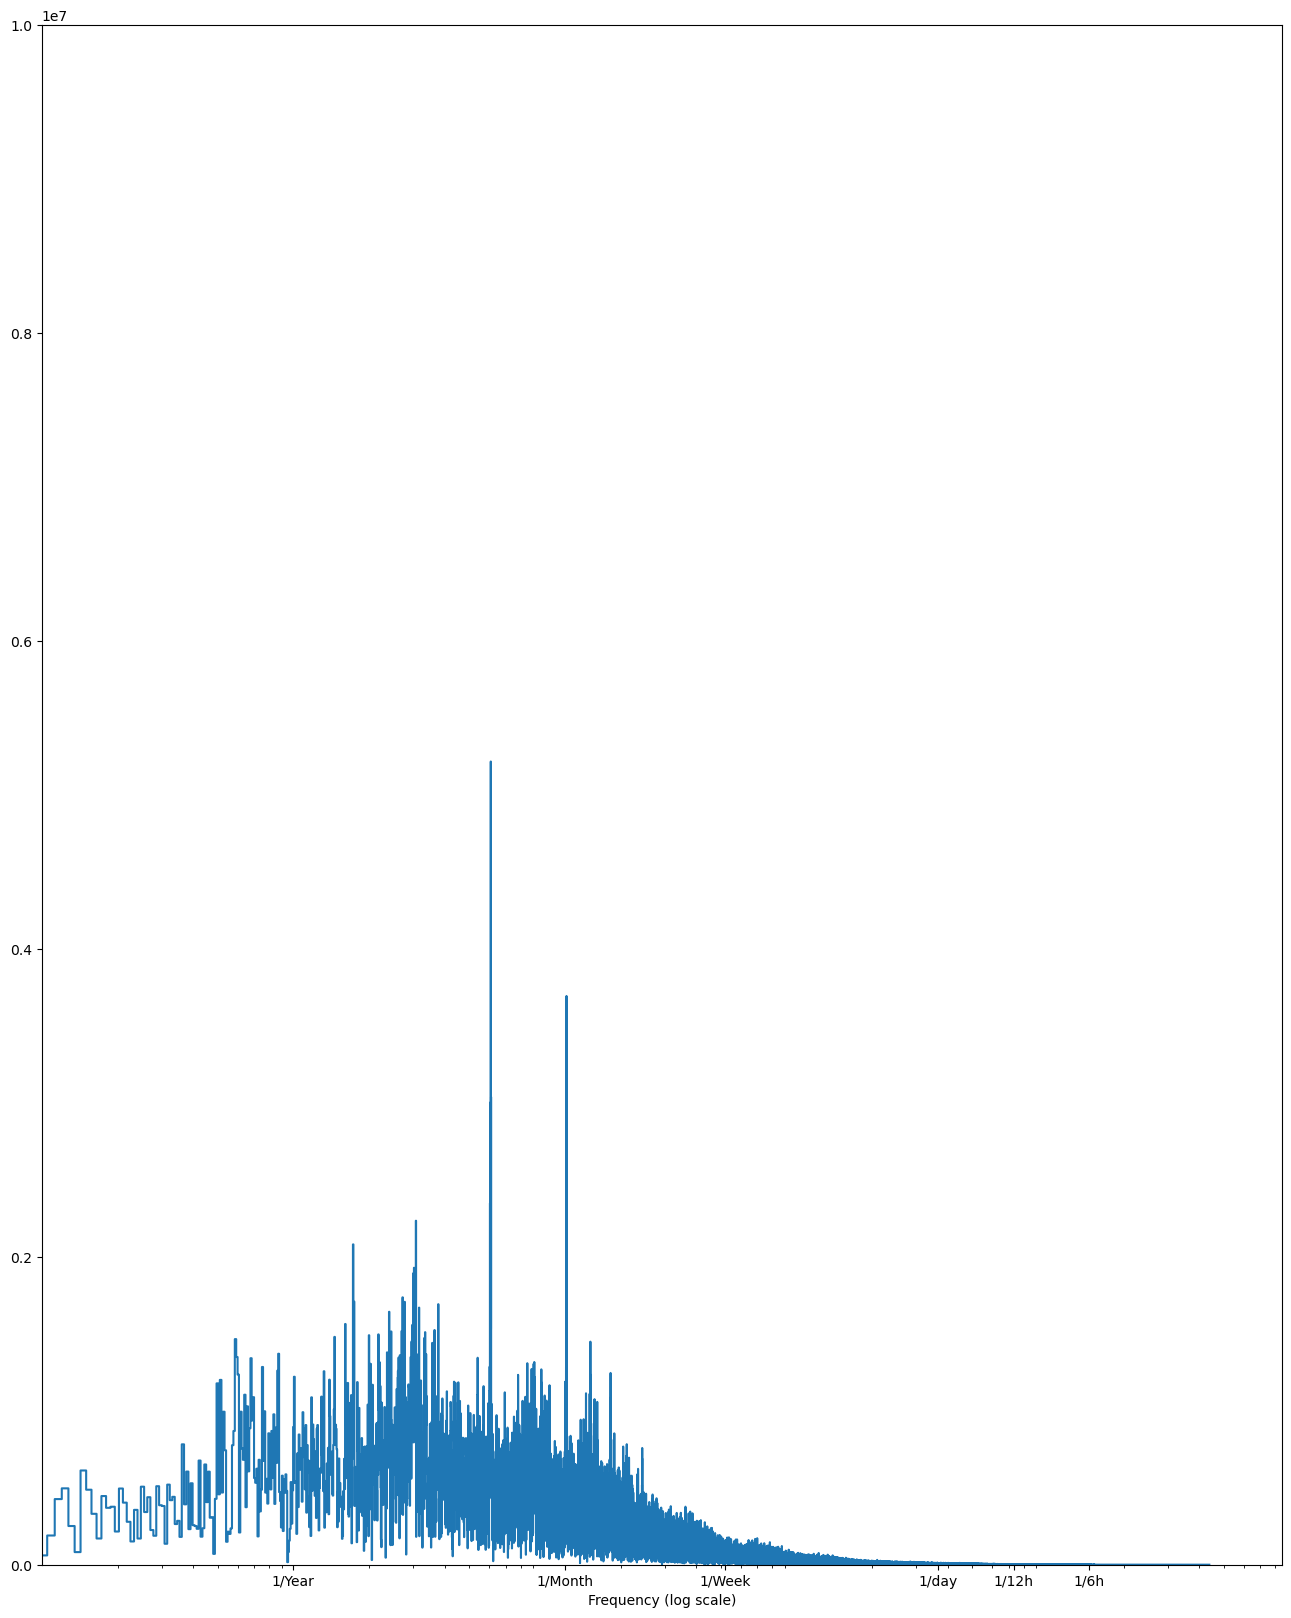

In [56]:
frequency_analysis(df.abgas, ylim=10000000)

In [57]:
import scipy

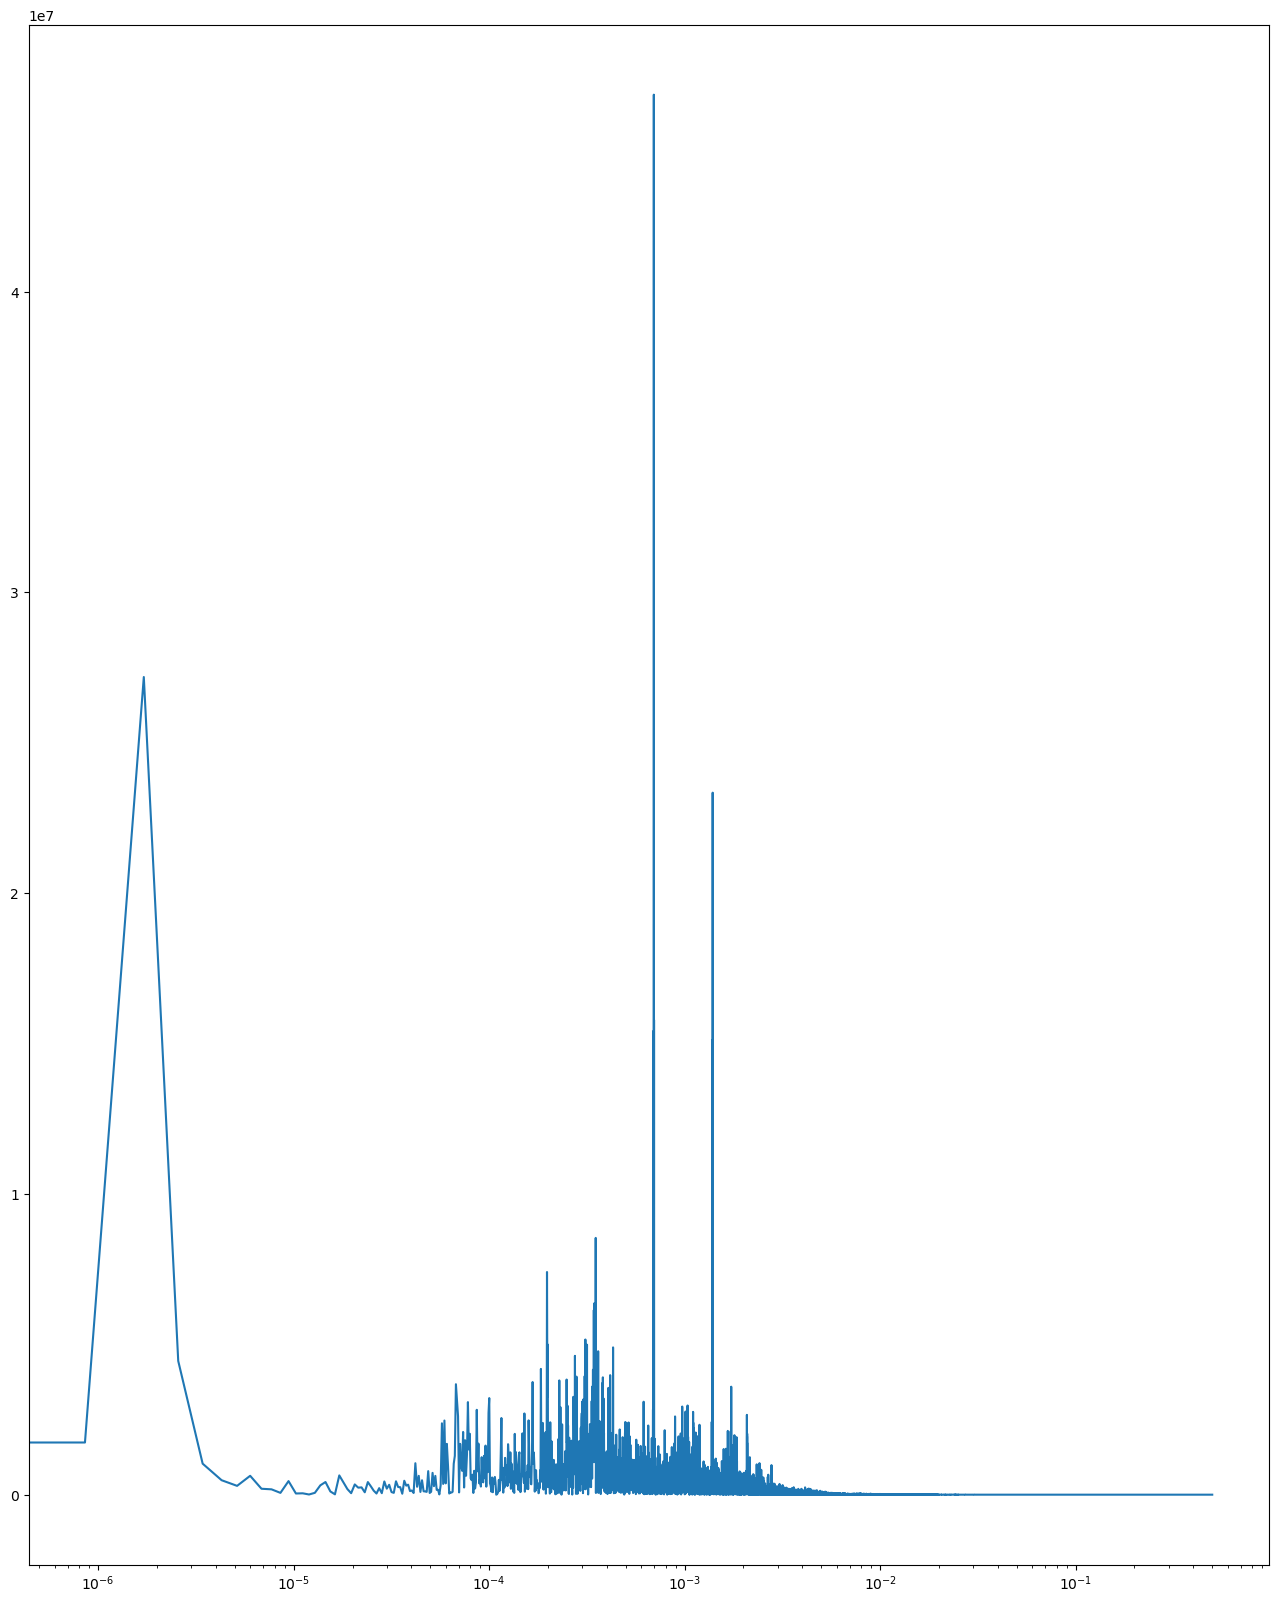

In [58]:
t=np.arange(df.abgas.size)
plt.figure()

mean = np.mean(df.abgas)
x = df.abgas - mean
windowed = x * scipy.signal.windows.hann(df.abgas.size)
f, p = scipy.signal.periodogram(x)
ft = tf.signal.rfft(x)
#plt.plot(f[:100], ft[:100])
#plt.plot(f, ft)
plt.semilogx(f, p)

Below is a query to detect whenever the phase of the kessel changed to Anheizen. These points in time are very interesting because they are "unpredictable" turning points and "manually" selected since they represent the times someone presses the "Händisch anfeuern" button aka manually fires up the heating unit, or when the heating unit has decided to start heating up if it's on automatic mode.

While these periods are insightful, they might not be great for training on because they always end with opening the door, just before the next period starts. The first observalbe thing that happens when a human decides to fire up the heating unit is the opening of the door. So maybe also take a look at the times when the door opened.

Then you could have a seconds_since_last_anfeuern and a seconds_since_last_door_opened column. I'm not sure if models are able to learn stuff like this by themselves because it's certainly redundant information but trying won't hurt.

In [86]:
firing_up = df[(df["betriebsphase_kessel"].shift(1) != df["betriebsphase_kessel"]) & (df.betriebsphase_kessel == 1)]
firing_up_times = firing_up.index
firing_up

kessel  ruecklauf  abgas  co2_soll  co2_ist  \
received_time                                                             
2020-06-13 19:43:30.118354    20.4       18.9    7.0      12.0      7.1   
2020-06-20 16:56:44.645265    20.1       18.9    7.0      12.0      0.0   
2020-06-28 14:22:42.974271    22.8       21.2   10.0      12.0      0.0   
2020-07-10 16:37:02.454232    21.5       20.6    9.0      12.0      6.8   
2020-07-20 18:06:21.859184    22.2       21.0   10.0      12.0      0.0   
...                            ...        ...    ...       ...      ...   
2022-07-14 15:26:22.914877    23.0       21.8   11.0      12.0      0.0   
2022-07-24 16:47:57.862150    23.9       22.5   12.0      12.0      0.0   
2022-08-03 11:57:16.743538    23.6       22.7   12.0      12.0      0.0   
2022-08-14 19:23:54.047223    24.0       23.0   12.0      12.0      0.0   
2022-08-26 17:28:09.904762    22.7       21.9   11.0      12.0      0.0   

                            saugzug_ist  puffer_oben  puffer_unten  platine  \
received_time                                                                 
2020-06-13 19:43:30.118354       1100.0         37.2          34.8     23.2   
2020-06-20 16:56:44.645265       1100.0         38.4          34.0     22.9   
2020-06-28 14:22:42.974271       1100.0         42.5          37.8     25.5   
2020-07-10 16:37:02.454232       1100.0         35.2          31.3     24.8   
2020-07-20 18:06:21.859184       1100.0         39.0          36.6     25.2   
...                                 ...          ...           ...      ...   
2022-07-14 15:26:22.914877       1100.0         35.2          32.2     26.0   
2022-07-24 16:47:57.862150       1100.0         33.3          30.0     27.8   
2022-08-03 11:57:16.743538       1100.0         36.9          33.6     26.8   
2022-08-14 19:23:54.047223       1100.0         37.8          34.9     26.8   
2022-08-26 17:28:09.904762       1100.0         34.2          29.6     26.1   

                           betriebsphase_kessel  ...  a_ea_2  a_ea_3  a_ea_4  \
received_time                                    ...                           
2020-06-13 19:43:30.118354                    1  ...    True    True   False   
2020-06-20 16:56:44.645265                    1  ...    True    True   False   
2020-06-28 14:22:42.974271                    1  ...    True    True   False   
2020-07-10 16:37:02.454232                    1  ...    True    True   False   
2020-07-20 18:06:21.859184                    1  ...    True    True   False   
...                                         ...  ...     ...     ...     ...   
2022-07-14 15:26:22.914877                    1  ...    True    True   False   
2022-07-24 16:47:57.862150                    1  ...    True    True   False   
2022-08-03 11:57:16.743538                    1  ...    True    True   False   
2022-08-14 19:23:54.047223                    1  ...    True    True   False   
2022-08-26 17:28:09.904762                    1  ...    True    True   False   

                           a_phase_0  a_phase_1  a_phase_2 a_phase_3  \
received_time                                                          
2020-06-13 19:43:30.118354      True      False      False     False   
2020-06-20 16:56:44.645265      True      False      False     False   
2020-06-28 14:22:42.974271      True      False      False     False   
2020-07-10 16:37:02.454232      True      False      False     False   
2020-07-20 18:06:21.859184      True      False      False     False   
...                              ...        ...        ...       ...   
2022-07-14 15:26:22.914877      True      False      False     False   
2022-07-24 16:47:57.862150      True      False      False     False   
2022-08-03 11:57:16.743538      True      False      False     False   
2022-08-14 19:23:54.047223      True      False      False     False   
2022-08-26 17:28:09.904762      True      False      False     False   

                            a_phase_4  asdf  b

In [90]:
def plot_heating_period(index):
    df.betriebsphase_kessel = df.betriebsphase_kessel.astype(int)
    df[(df.index >= firing_up_times[index]) & (df.index < firing_up_times[index+1])].plot(y=["kessel", "abgas", "di_2", "betriebsphase_kessel"], secondary_y=["di_2", "betriebsphase_kessel"], include_bool=True)
    df.betriebsphase_kessel = df.betriebsphase_kessel.astype('category')

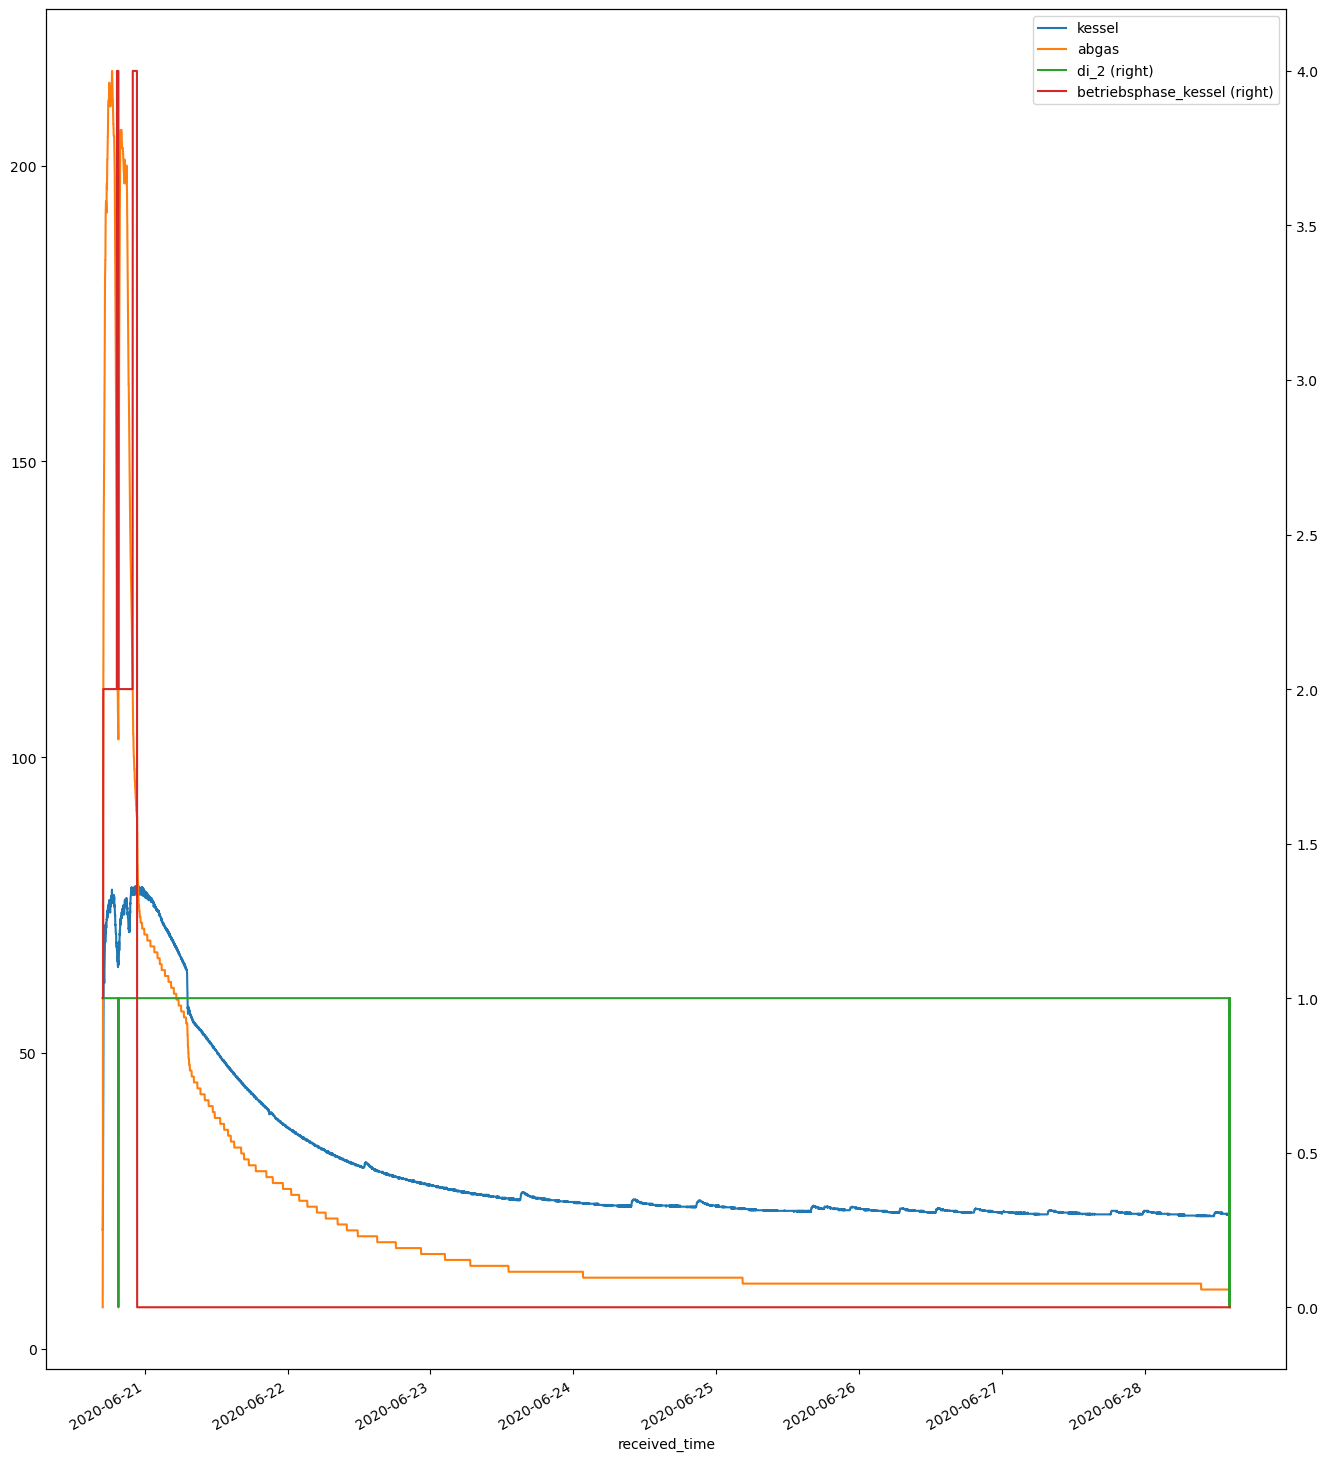

In [92]:
plot_heating_period(1)

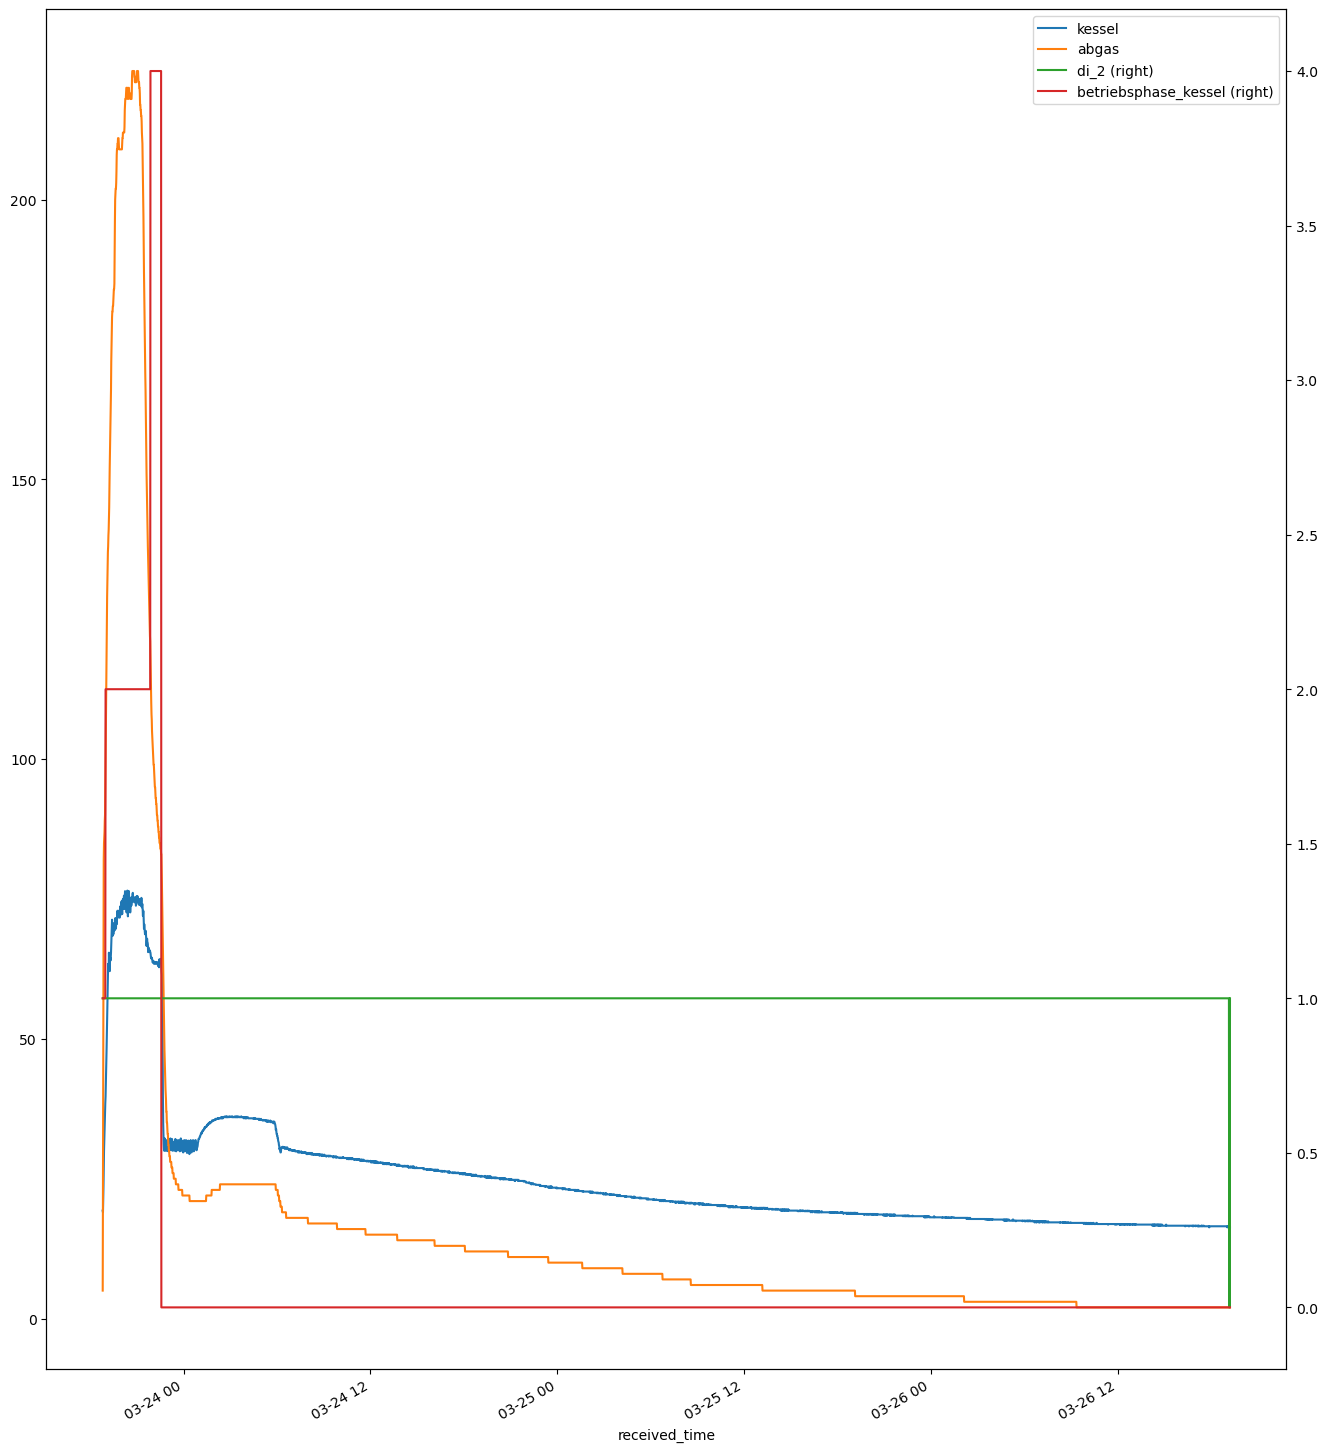

In [93]:
plot_heating_period(100)

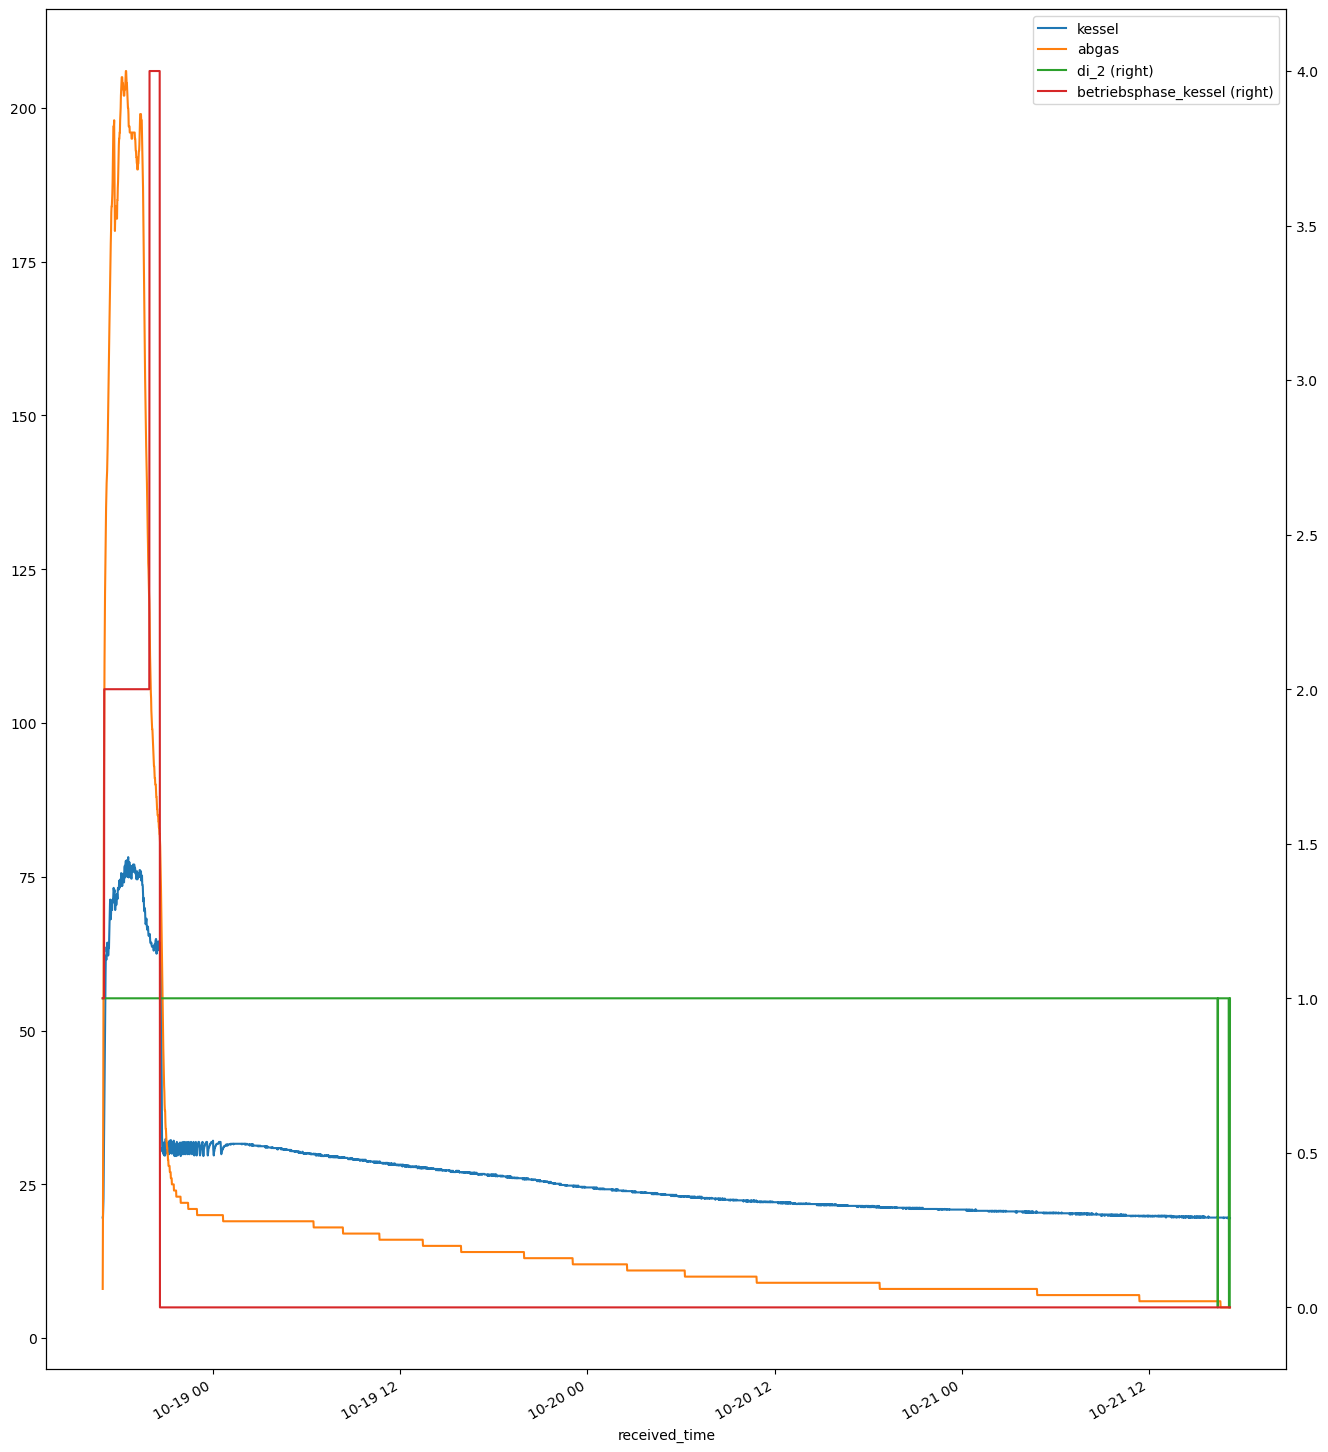

In [94]:
plot_heating_period(150)

In [ ]:
# somehow add a column seconds since last firing up